# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from prince import FAMD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Import Dataset - Credit Card Fraud Data (Transactional)

In [2]:
df_cc_trans = pd.read_csv('data/card_transdata.csv', header = 0)

In [3]:
df_cc_trans

distance_from_home  distance_from_last_transaction  \
0               57.877857                        0.311140   
1               10.829943                        0.175592   
2                5.091079                        0.805153   
3                2.247564                        5.600044   
4               44.190936                        0.566486   
...                   ...                             ...   
74420            2.285838                        0.272118   
74421           52.329549                        0.568009   
74422            1.929614                        1.633899   
74423           28.179360                        0.017210   
74424            3.310549                        0.016156   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            1.945940              1.0        1.0   
1                            1.294219              1.0        0.0   
2                            0.427715              1.0        0.0   
3                            0.362663              1.0        1.0   
4                            2.222767              1.0        1.0   
...                               ...              ...        ...   
74420                        1.776956              1.0        0.0   
74421                        1.389649              1.0        1.0   
74422                        1.260404              1.0        1.0   
74423                        1.578442              1.0        0.0   
74424                        1.874082              1.0        1.0   

       used_pin_number  online_order  fraud  
0                  0.0           0.0    0.0  
1                  0.0           0.0    0.0  
2                  0.0           1.0    0.0  
3                  0.0           1.0    0.0  
4                  0.0           1.0    0.0  
...                ...           ...    ...  
74420              0.0           1.0    0.0  
74421              0.0           1.0    0.0  
74422              0.0           1.0    0.0  
74423              0.0           1.0    0.0  
74424              0.0           1.0    0.0  

[74425 rows x 8 columns]

In [4]:
# separate predictor variable
series_cc_trans_pred = df_cc_trans['fraud']

In [5]:
series_cc_trans_pred

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
74420    0.0
74421    0.0
74422    0.0
74423    0.0
74424    0.0
Name: fraud, Length: 74425, dtype: float64

In [6]:
# create df without 'fraud' column
df_cc_trans_expl = df_cc_trans.drop('fraud', axis = 1)

In [7]:
df_cc_trans_expl

distance_from_home  distance_from_last_transaction  \
0               57.877857                        0.311140   
1               10.829943                        0.175592   
2                5.091079                        0.805153   
3                2.247564                        5.600044   
4               44.190936                        0.566486   
...                   ...                             ...   
74420            2.285838                        0.272118   
74421           52.329549                        0.568009   
74422            1.929614                        1.633899   
74423           28.179360                        0.017210   
74424            3.310549                        0.016156   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            1.945940              1.0        1.0   
1                            1.294219              1.0        0.0   
2                            0.427715              1.0        0.0   
3                            0.362663              1.0        1.0   
4                            2.222767              1.0        1.0   
...                               ...              ...        ...   
74420                        1.776956              1.0        0.0   
74421                        1.389649              1.0        1.0   
74422                        1.260404              1.0        1.0   
74423                        1.578442              1.0        0.0   
74424                        1.874082              1.0        1.0   

       used_pin_number  online_order  
0                  0.0           0.0  
1                  0.0           0.0  
2                  0.0           1.0  
3                  0.0           1.0  
4                  0.0           1.0  
...                ...           ...  
74420              0.0           1.0  
74421              0.0           1.0  
74422              0.0           1.0  
74423              0.0           1.0  
74424              0.0           1.0  

[74425 rows x 7 columns]

In [8]:
# convert categorical variable columns to 'bool' dtype
for col in df_cc_trans_expl[df_cc_trans_expl.columns.values[3:]]:
    df_cc_trans_expl[col] = df_cc_trans_expl[col].astype('bool')

# also...for predictor variable
series_cc_trans_pred = series_cc_trans_pred.astype('bool')

In [9]:
df_cc_trans_expl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74425 entries, 0 to 74424
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              74425 non-null  float64
 1   distance_from_last_transaction  74425 non-null  float64
 2   ratio_to_median_purchase_price  74425 non-null  float64
 3   repeat_retailer                 74425 non-null  bool   
 4   used_chip                       74425 non-null  bool   
 5   used_pin_number                 74425 non-null  bool   
 6   online_order                    74425 non-null  bool   
dtypes: bool(4), float64(3)
memory usage: 2.0 MB


In [10]:
series_cc_trans_pred.dtypes

dtype('bool')

# EDA

In [11]:
df_cc_trans_expl.describe()

distance_from_home  distance_from_last_transaction  \
count        74425.000000                    74425.000000   
mean            26.702669                        5.097545   
std             65.720490                       25.796076   
min              0.021322                        0.000488   
25%              3.881030                        0.295595   
50%              9.990709                        0.989597   
75%             25.802185                        3.328718   
max           4601.011222                     2160.499922   

       ratio_to_median_purchase_price  
count                    74425.000000  
mean                         1.807926  
std                          2.806127  
min                          0.011373  
25%                          0.475143  
50%                          0.995081  
75%                          2.078513  
max                        126.294930

In [12]:
series_cc_trans_pred.describe()

count     74425
unique        2
top       False
freq      68007
Name: fraud, dtype: object

## Correlation Analysis

In [13]:
corr_mat = df_cc_trans.corr()

In [14]:
corr_mat['fraud']

distance_from_home                0.186338
distance_from_last_transaction    0.095101
ratio_to_median_purchase_price    0.451454
repeat_retailer                  -0.002134
used_chip                        -0.063509
used_pin_number                  -0.100455
online_order                      0.191150
fraud                             1.000000
Name: fraud, dtype: float64

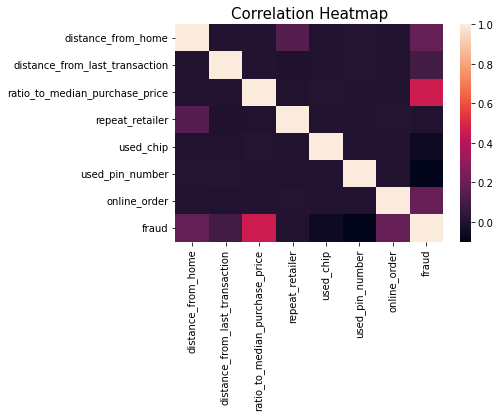

In [15]:
# correlation heatmap
ax = plt.axes()
sns.heatmap(corr_mat)
ax.set_title('Correlation Heatmap', fontsize = 15)
plt.show()

In [16]:
# normalize data to equally & visually compare potential explanatory variables
df_cc_trans_expl_norm = df_cc_trans_expl

min_max_scaler = MaxAbsScaler()

df_cc_trans_expl_norm[df_cc_trans_expl_norm.columns.values[:3]] = min_max_scaler.fit_transform(df_cc_trans_expl_norm[df_cc_trans_expl_norm.columns.values[:3]])

In [17]:
df_cc_trans_expl_norm.describe()

distance_from_home  distance_from_last_transaction  \
count        74425.000000                    7.442500e+04   
mean             0.005804                    2.359429e-03   
std              0.014284                    1.193986e-02   
min              0.000005                    2.257036e-07   
25%              0.000844                    1.368177e-04   
50%              0.002171                    4.580409e-04   
75%              0.005608                    1.540717e-03   
max              1.000000                    1.000000e+00   

       ratio_to_median_purchase_price  
count                    74425.000000  
mean                         0.014315  
std                          0.022219  
min                          0.000090  
25%                          0.003762  
50%                          0.007879  
75%                          0.016458  
max                          1.000000

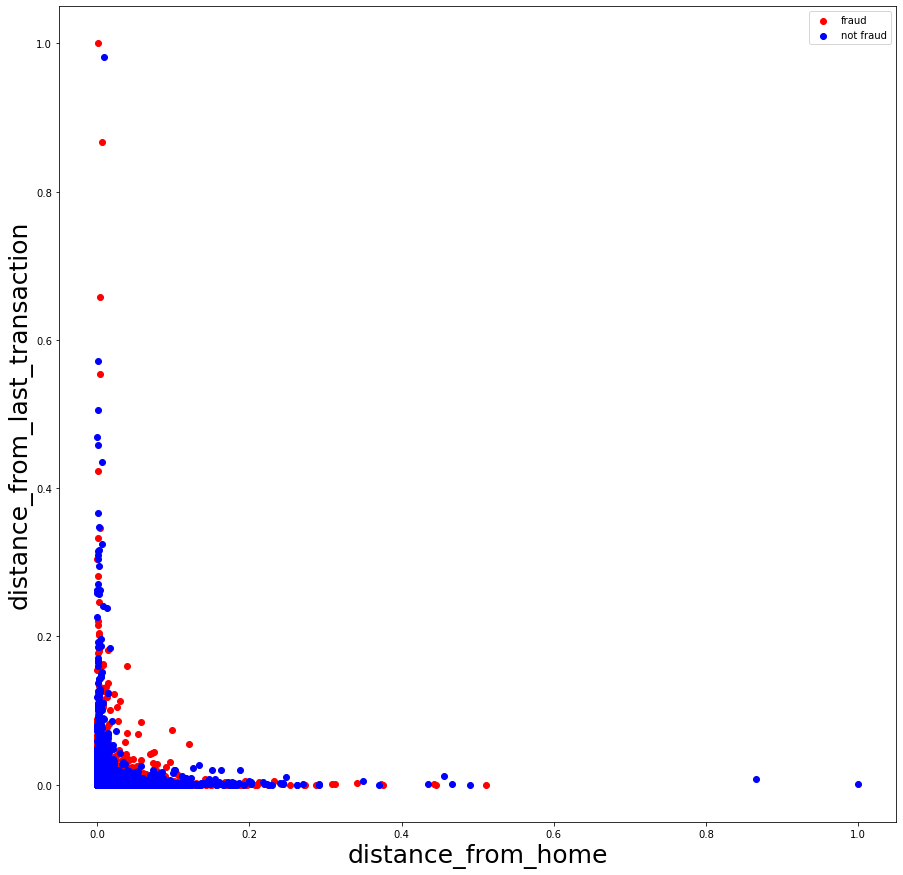

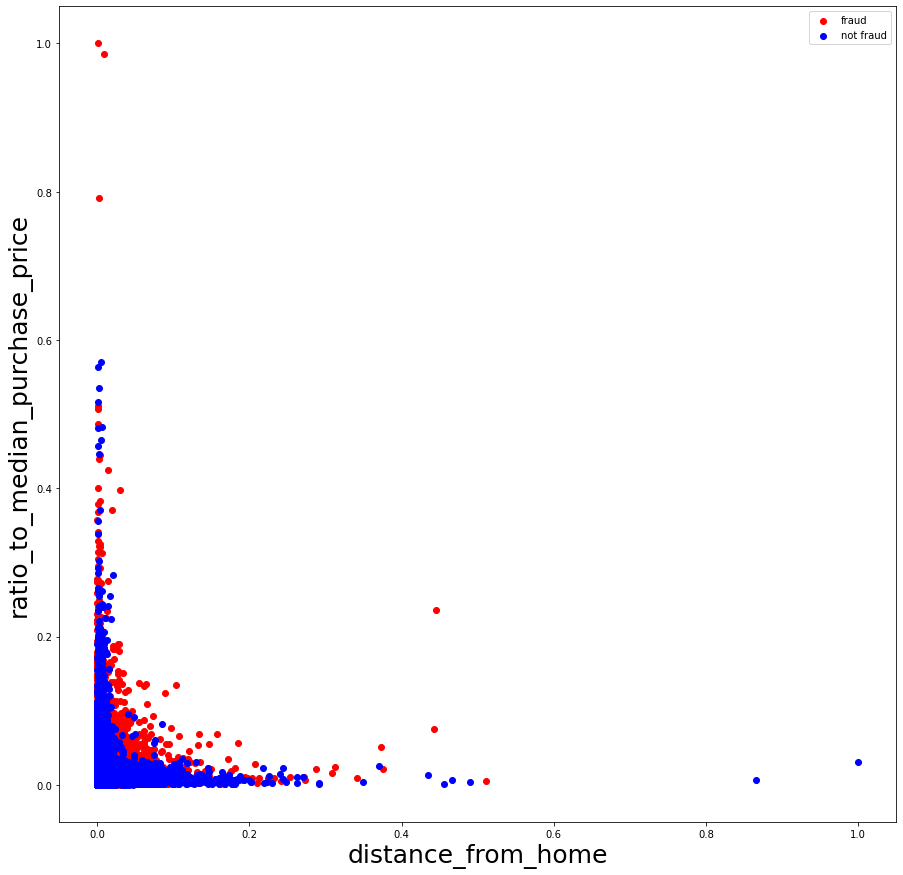

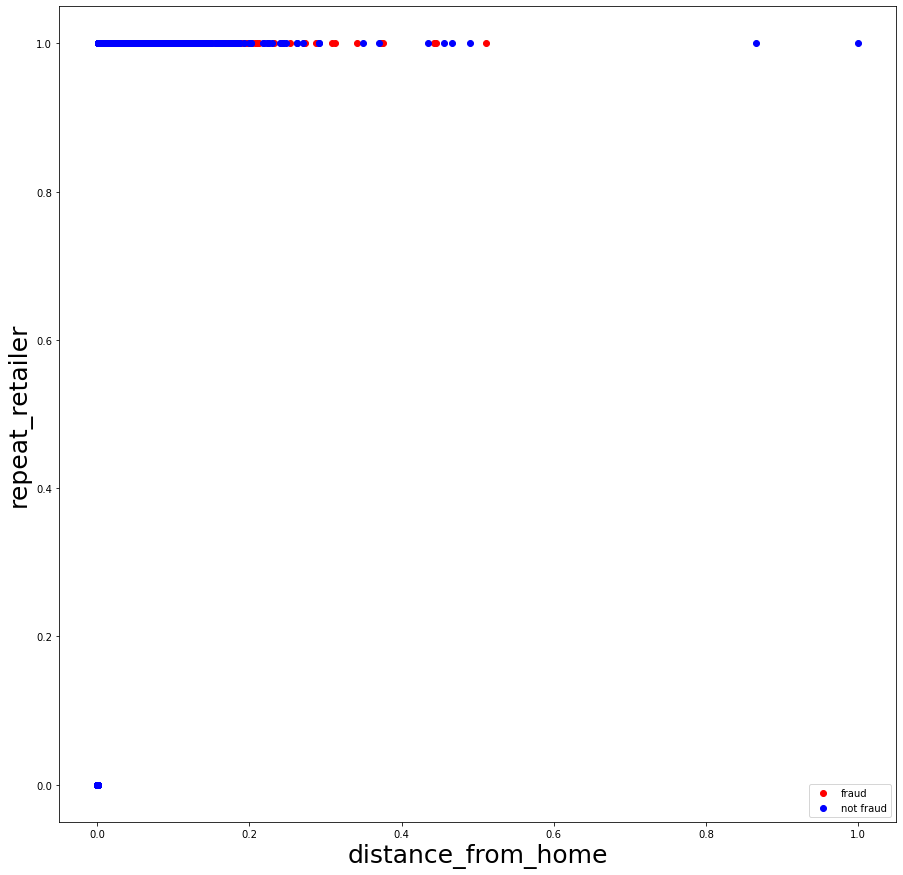

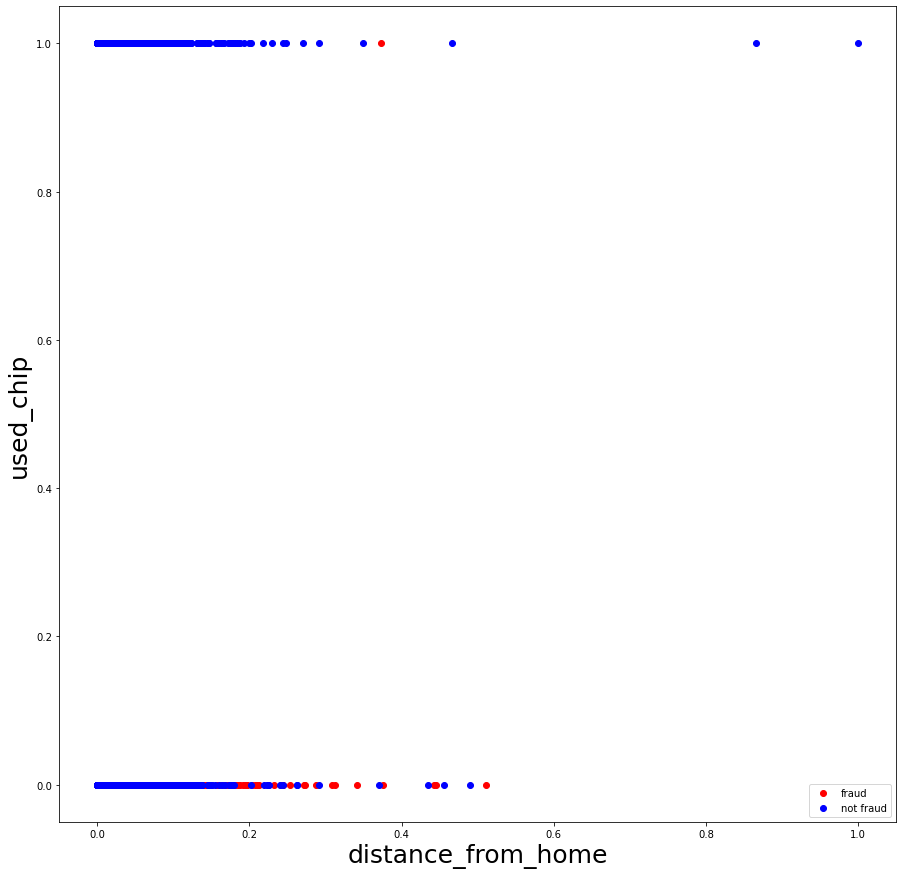

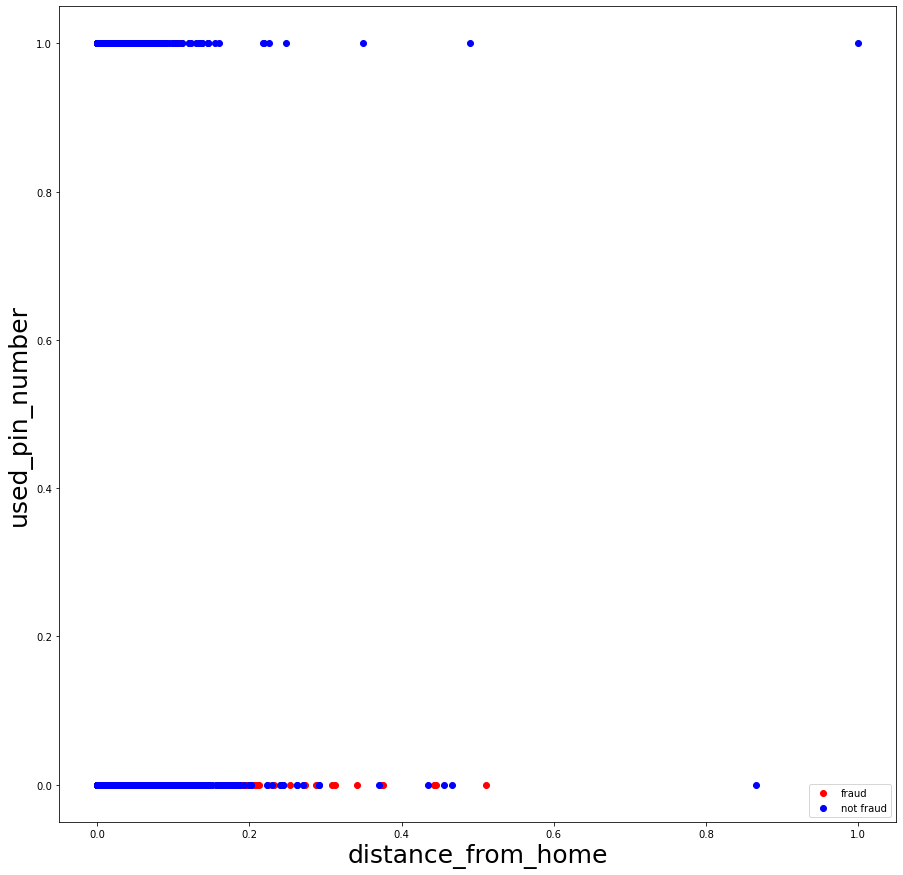

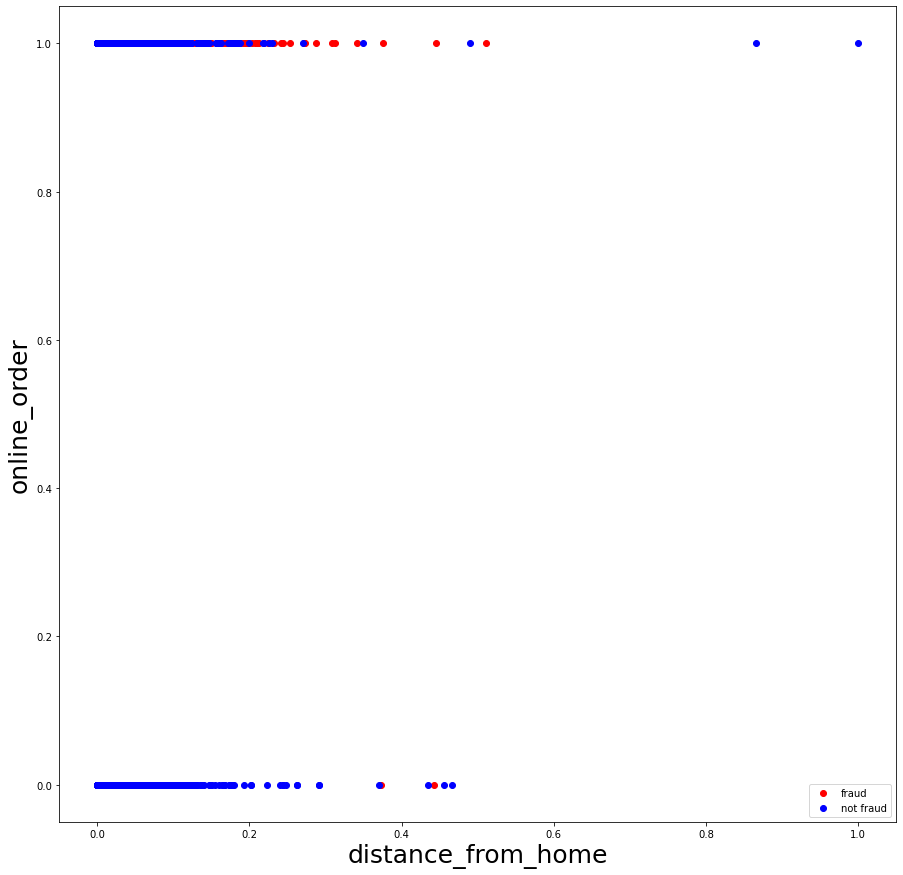

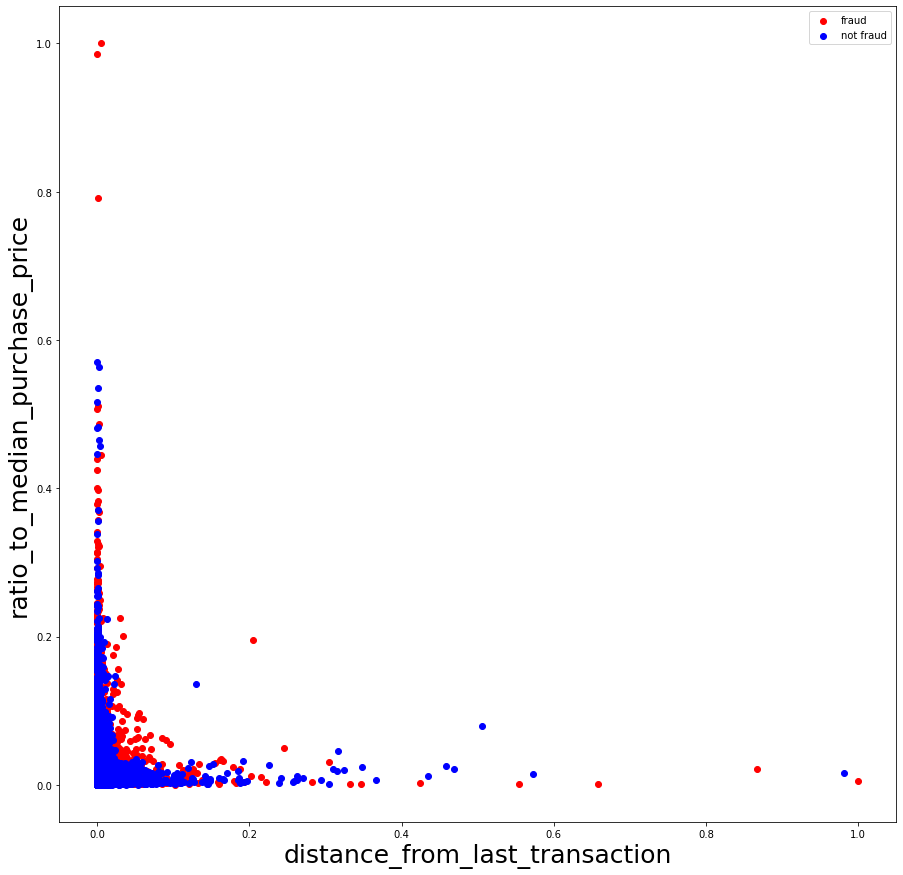

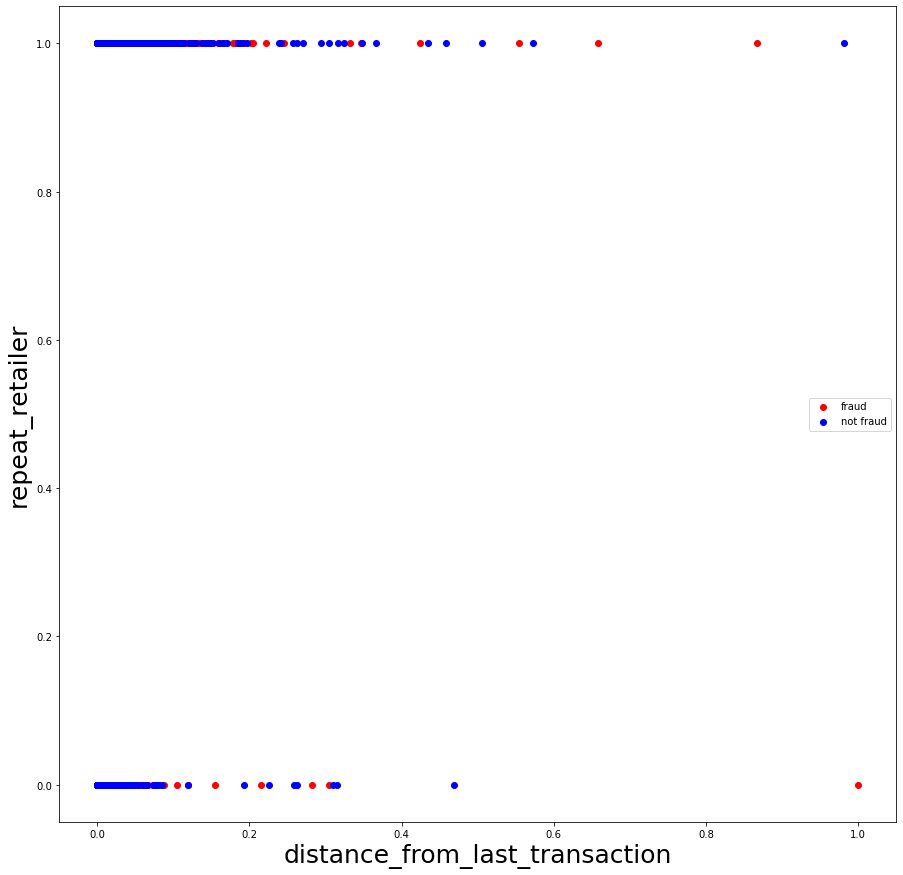

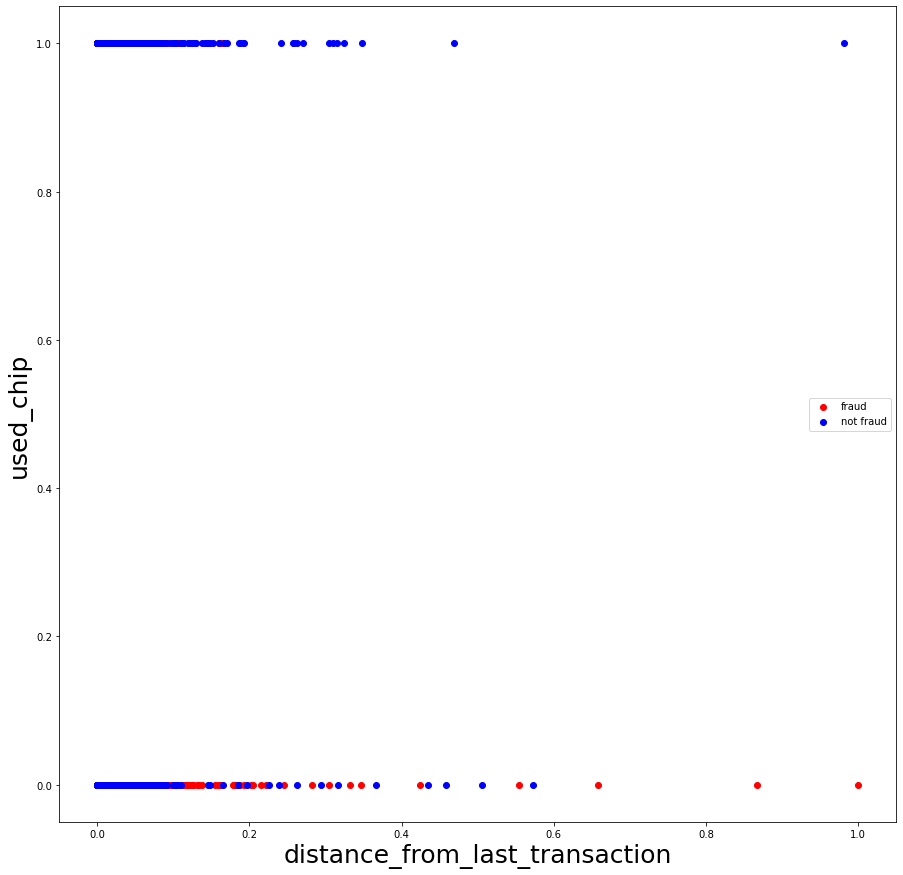

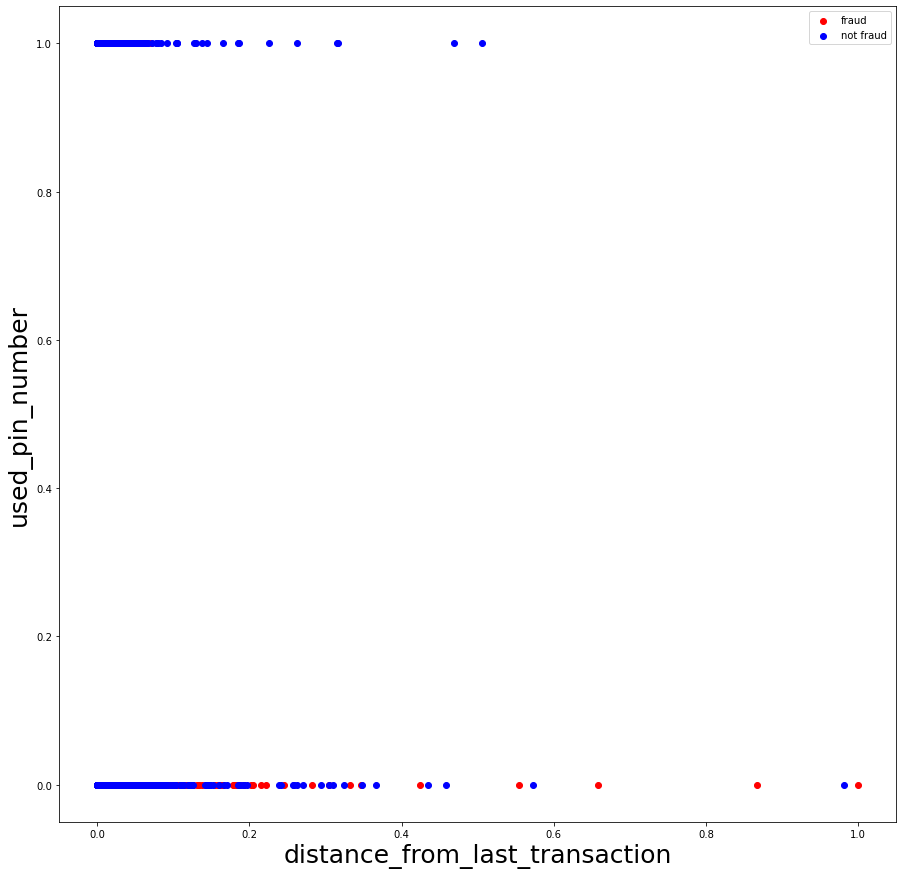

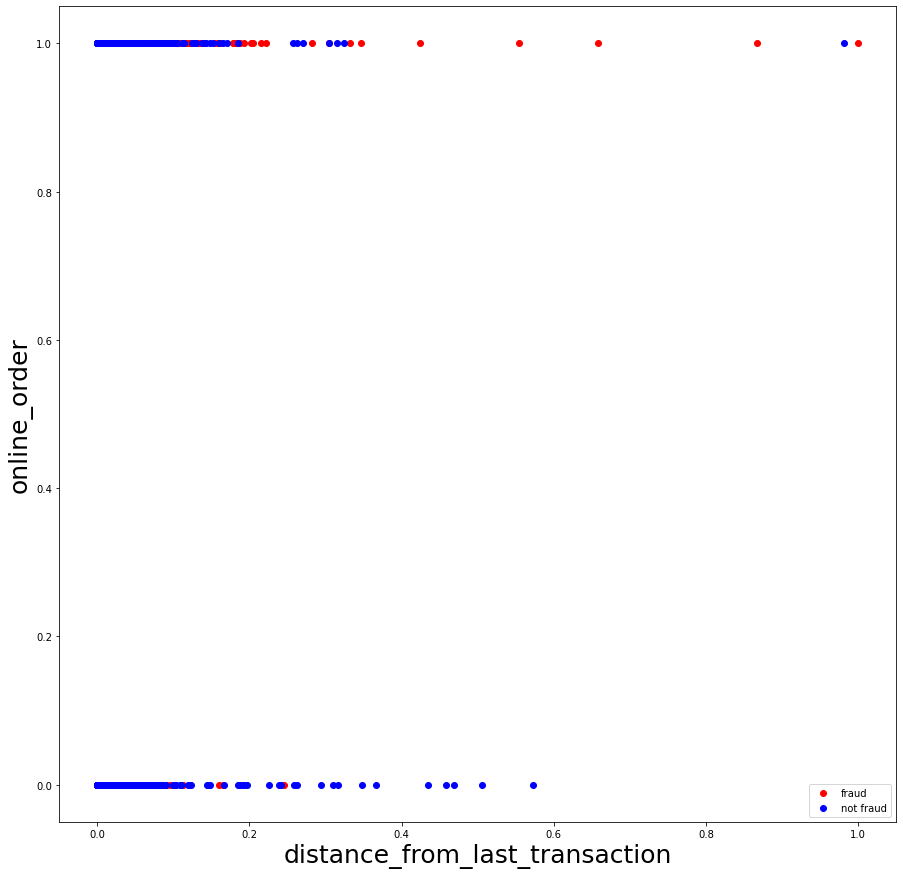

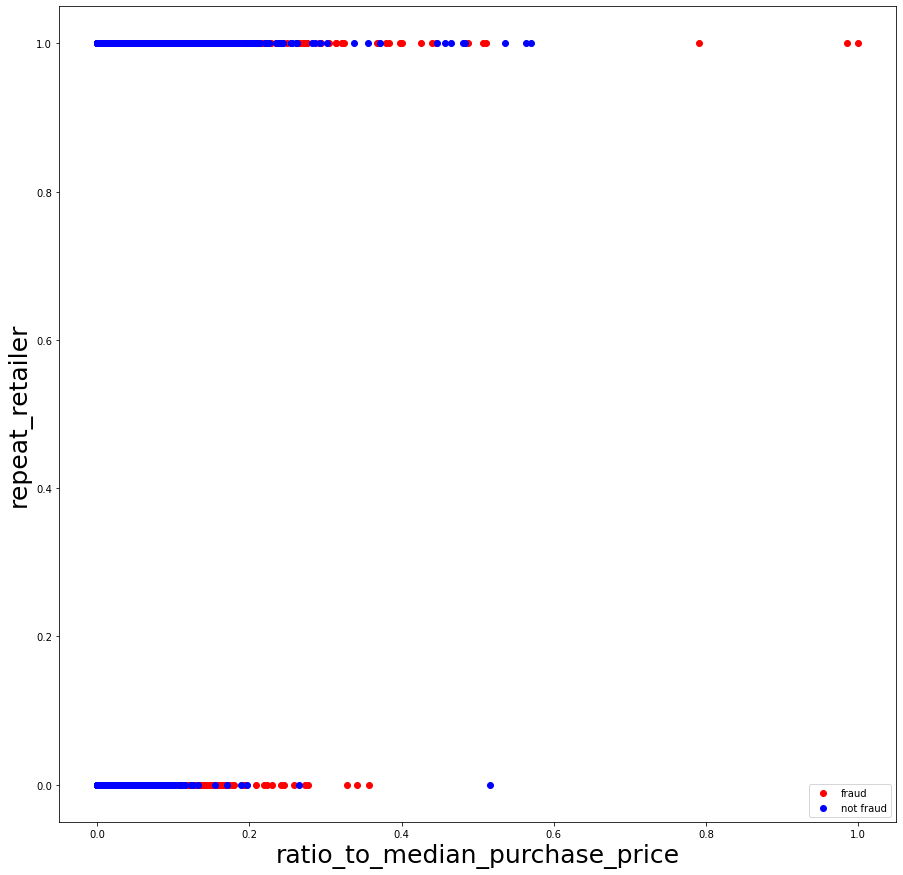

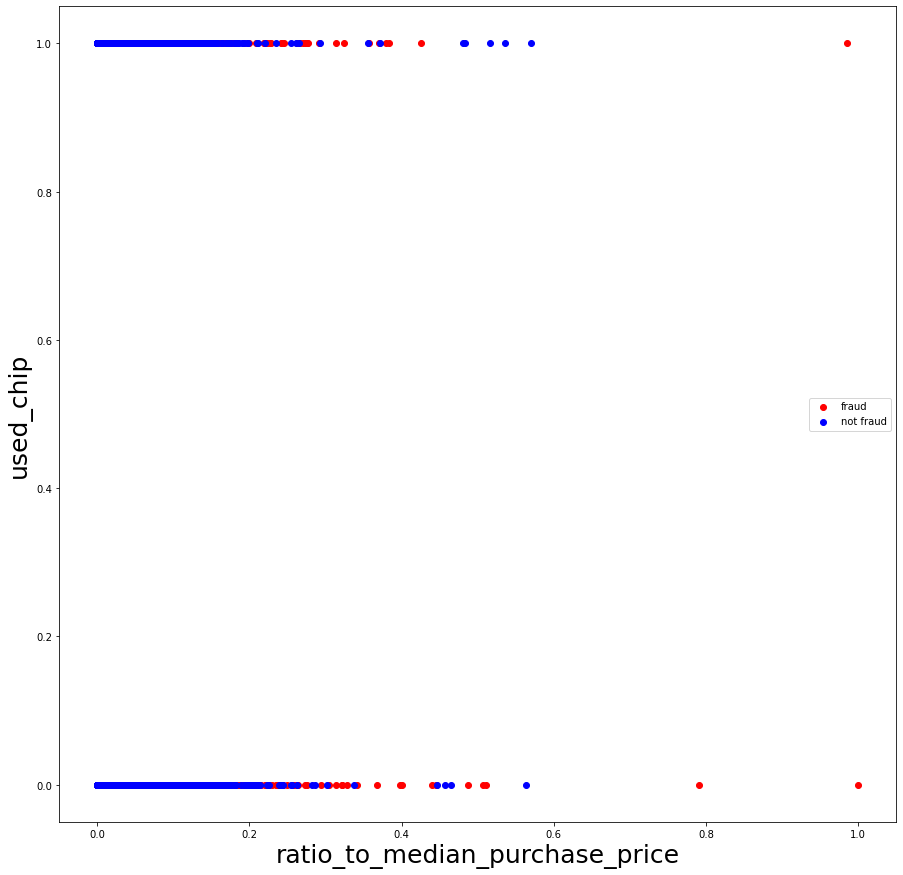

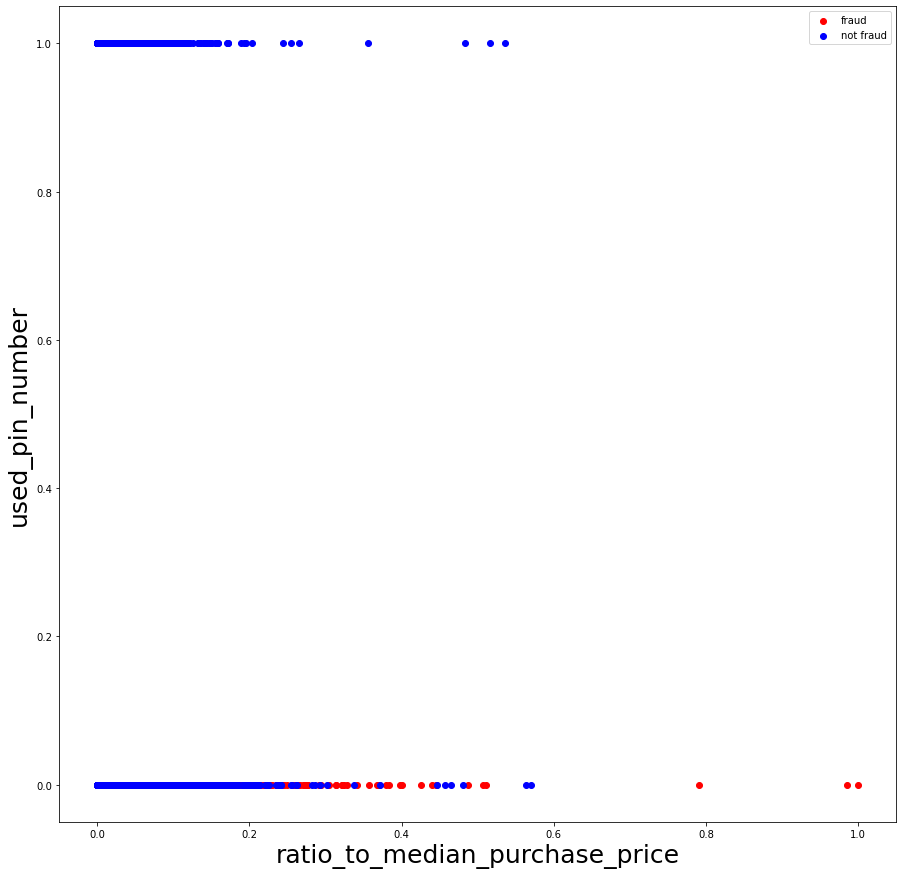

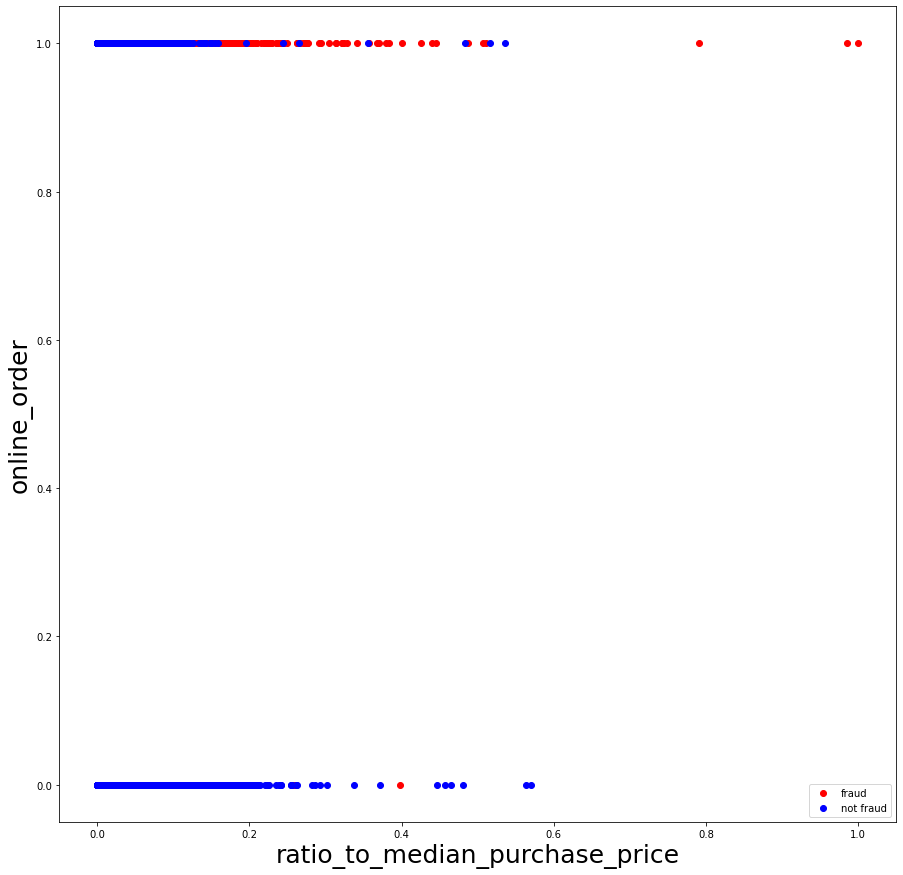

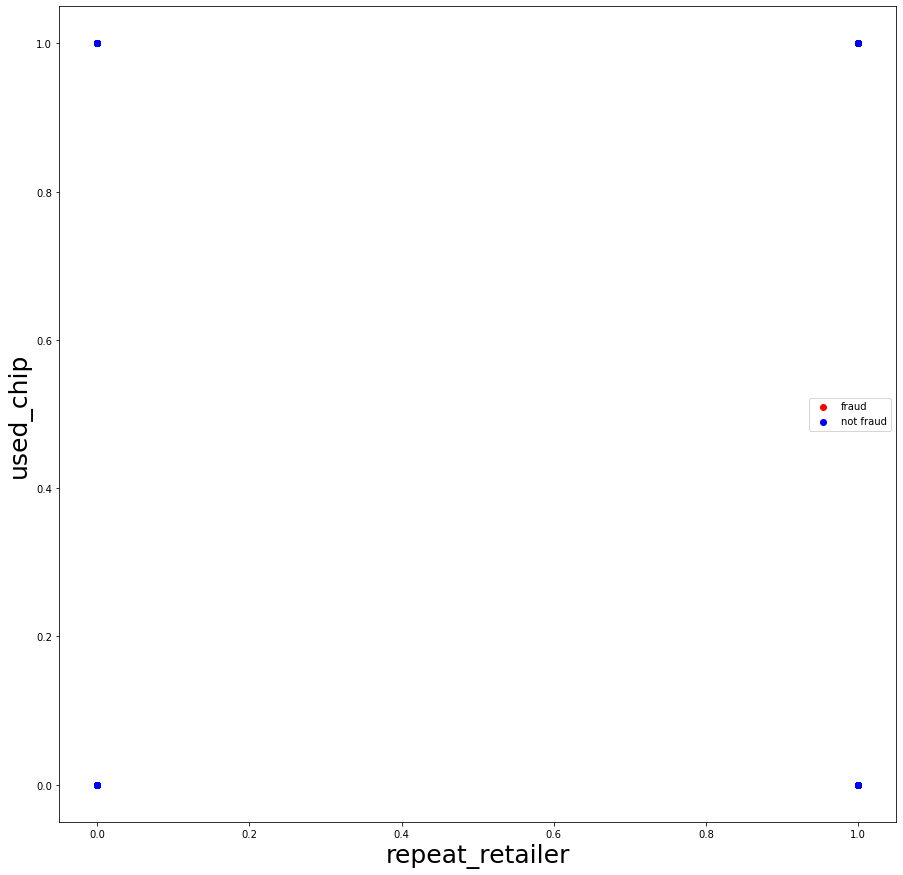

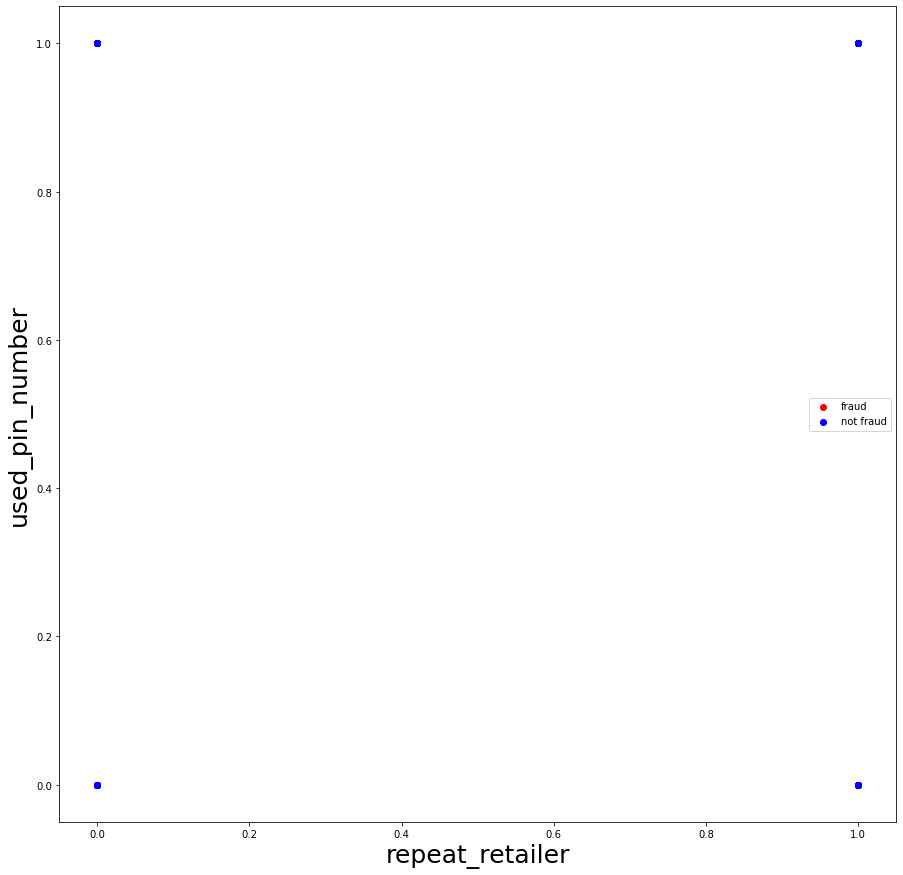

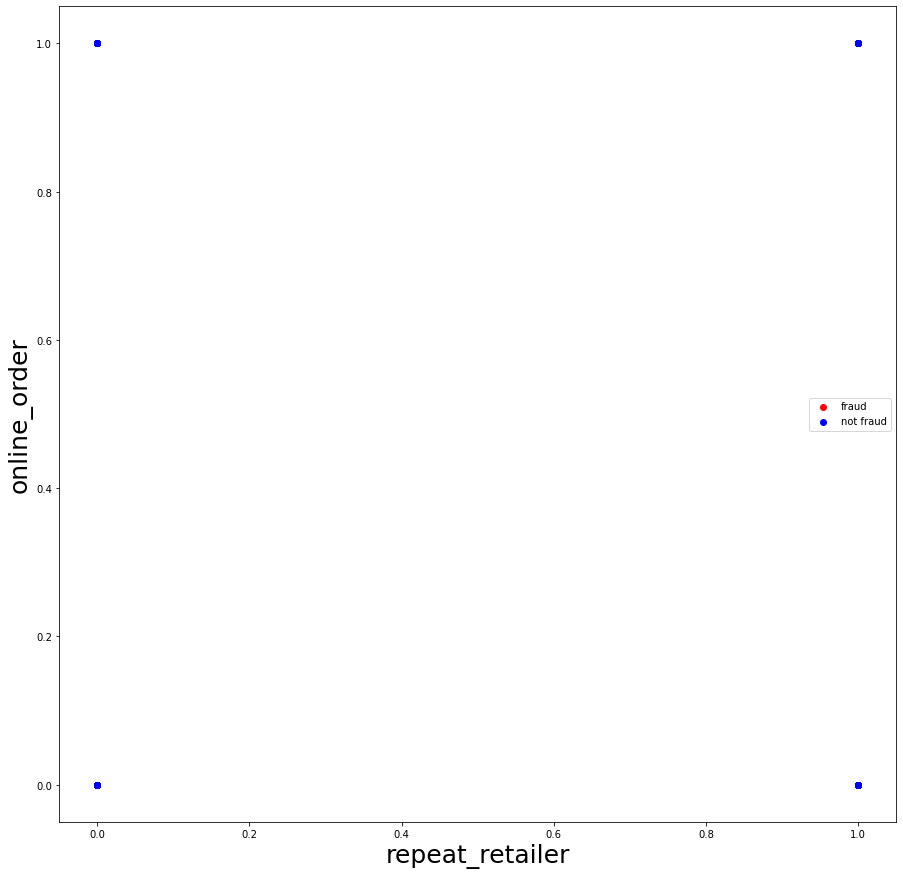

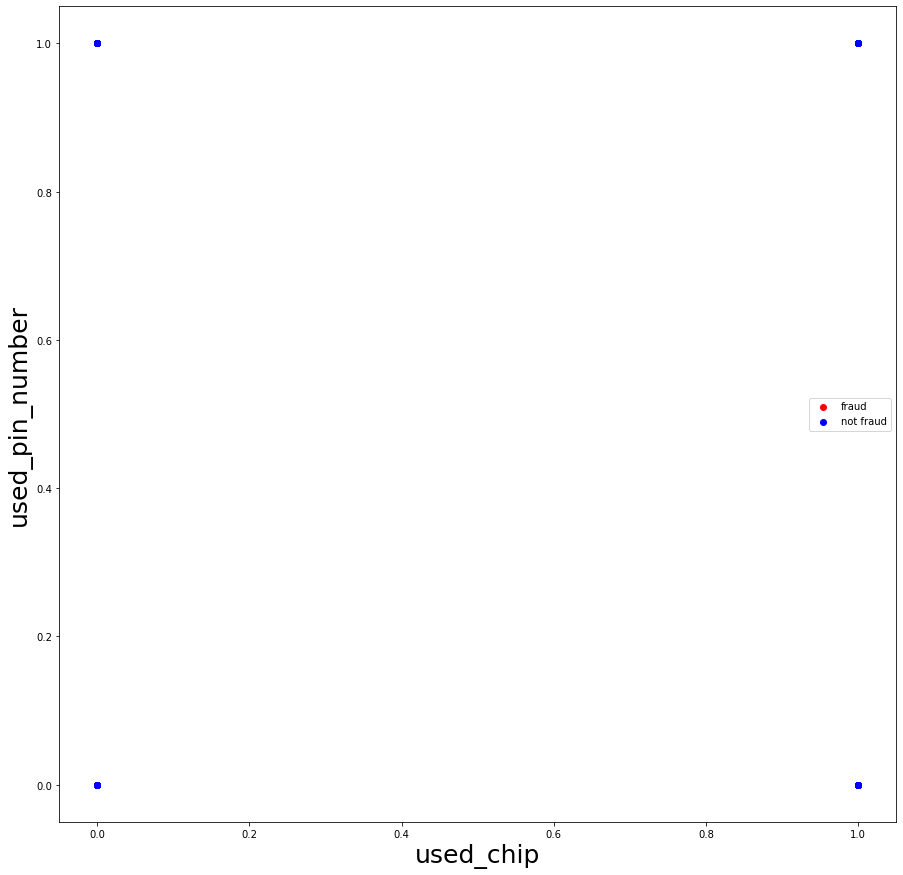

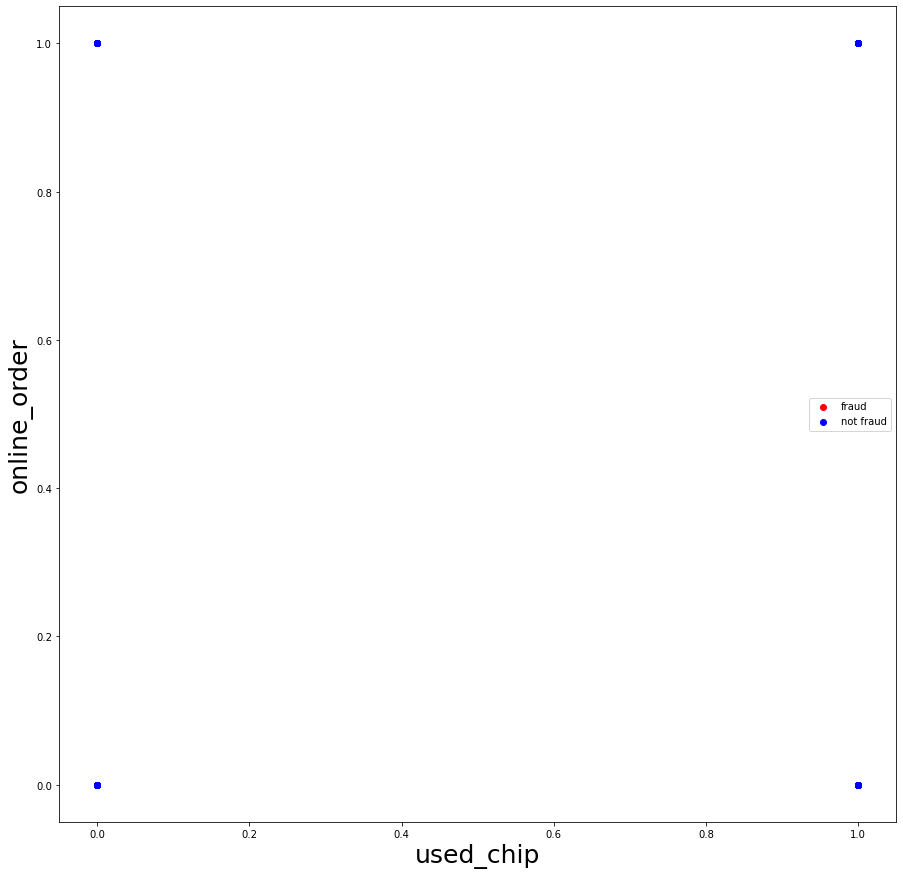

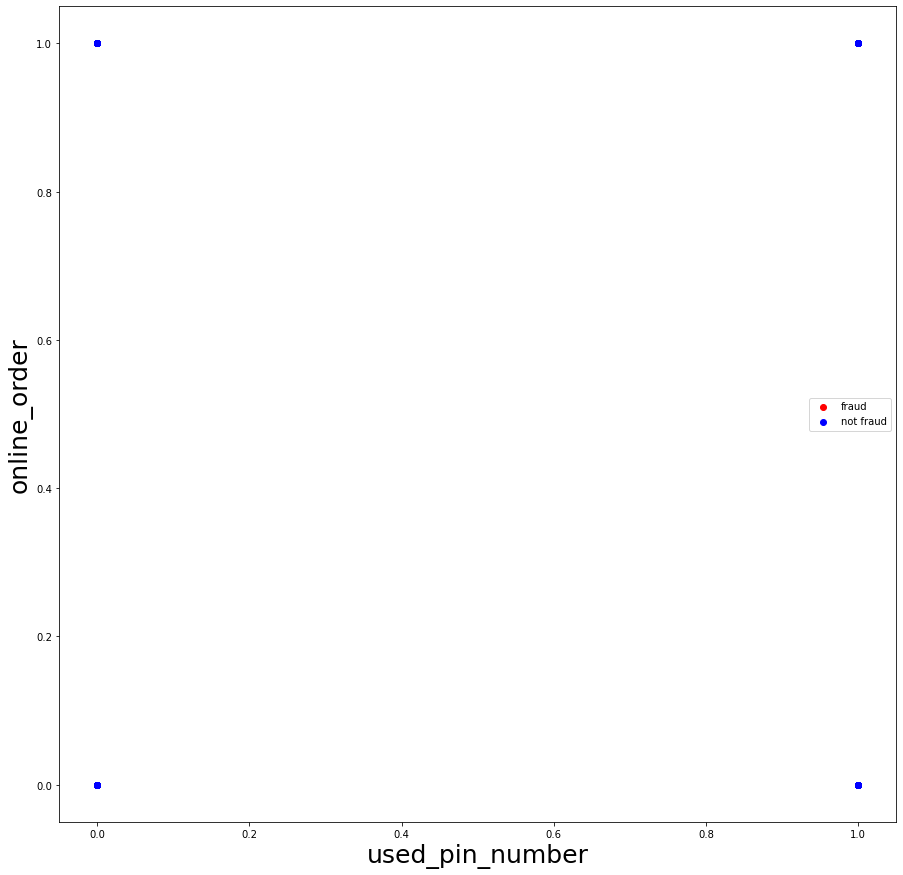

In [18]:
# compare potential explanatory variables against each other
columns = df_cc_trans_expl_norm.columns
index_fraud = df_cc_trans[df_cc_trans['fraud'] == 1.0].index.values
index_notfraud = df_cc_trans[df_cc_trans['fraud'] == 0.0].index.values

df_cc_trans_expl_norm_fraud = df_cc_trans_expl_norm.iloc[index_fraud]
df_cc_trans_expl_norm_notfraud = df_cc_trans_expl_norm.iloc[index_notfraud]

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
            # plot variables against one another (2-d scatterplots)
            column_1 = columns[i]
            column_2 = columns[j]
            
            fig, ax = plt.subplots(figsize = (15,15))
            plt.scatter(x = df_cc_trans_expl_norm_fraud[column_1], y = df_cc_trans_expl_norm_fraud[column_2], 
                        c = 'red')
            plt.scatter(x = df_cc_trans_expl_norm_notfraud[column_1], 
                        y = df_cc_trans_expl_norm_notfraud[column_2], 
                        c = 'blue')
            plt.legend(['fraud', 'not fraud'])
            ax.set_ylabel(f'{column_2}', fontsize = 25)
            ax.set_xlabel(f'{column_1}', fontsize = 25)
            plt.show()

# Model Pre-processing

## Check Imbalance of Classes

In [19]:
# first...check for imbalance of classes
dict_cc_fraud = {}

for i in range(len(df_cc_trans)):
    fraud = df_cc_trans['fraud'][i]
    if fraud not in dict_cc_fraud.keys():
        dict_cc_fraud[fraud] = 1
    else:
        dict_cc_fraud[fraud] += 1

In [20]:
dict_cc_fraud
# many more non-fraud cases than fraud cases

{0.0: 68007, 1.0: 6418}

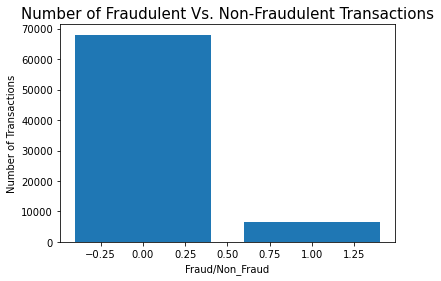

In [21]:
plt.bar(dict_cc_fraud.keys(), dict_cc_fraud.values())
plt.title('Number of Fraudulent Vs. Non-Fraudulent Transactions', fontsize = 15)
plt.xlabel('Fraud/Non_Fraud')
plt.ylabel('Number of Transactions')
plt.show()

In [22]:
# since we are developing fraud-detection model, will leave imbalance
# and use Recall as determinant of most viable model

## Train-Test Split (80/20)

In [23]:
X, y = df_cc_trans_expl_norm[df_cc_trans_expl_norm.columns], series_cc_trans_pred

In [24]:
# now...train/test split (80/20)
# utilizing stratify option on y (predictor variable) to maintain same distribution between train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify = y)

In [25]:
# reset indices
X_train.reset_index(inplace = True, drop = False)
X_test.reset_index(inplace = True, drop = False)

df_y_train = y_train.reset_index(drop = False)
df_y_test = y_test.reset_index(drop = False)

y_train.reset_index(inplace = True, drop = True)
y_test.reset_index(inplace = True, drop = True)

In [26]:
# do not include 'index'
X_train_model, X_test_model = X_train[X_train.columns.values[1:]], X_test[X_test.columns.values[1:]]

In [27]:
y.count()

74425

In [28]:
y_train.count()

59540

In [29]:
y_test.count()

14885

## Compare Distributions of y, y_train, y_test

In [30]:
# counts of fraudulent/non-fraudulent transactions in y, y_train, & y_test
y_dict = {False: 0, True: 0}
y_train_dict = {False: 0, True: 0}
y_test_dict = {False: 0, True: 0}

for actual in y:
    if actual == False:
        y_dict[False] += 1
    elif actual == True:
        y_dict[True] += 1
        
for actual in y_train:
    if actual == False:
        y_train_dict[False] += 1
    elif actual == True:
        y_train_dict[True] += 1
        
for actual in y_test:
    if actual == False:
        y_test_dict[False] += 1
    elif actual == True:
        y_test_dict[True] += 1

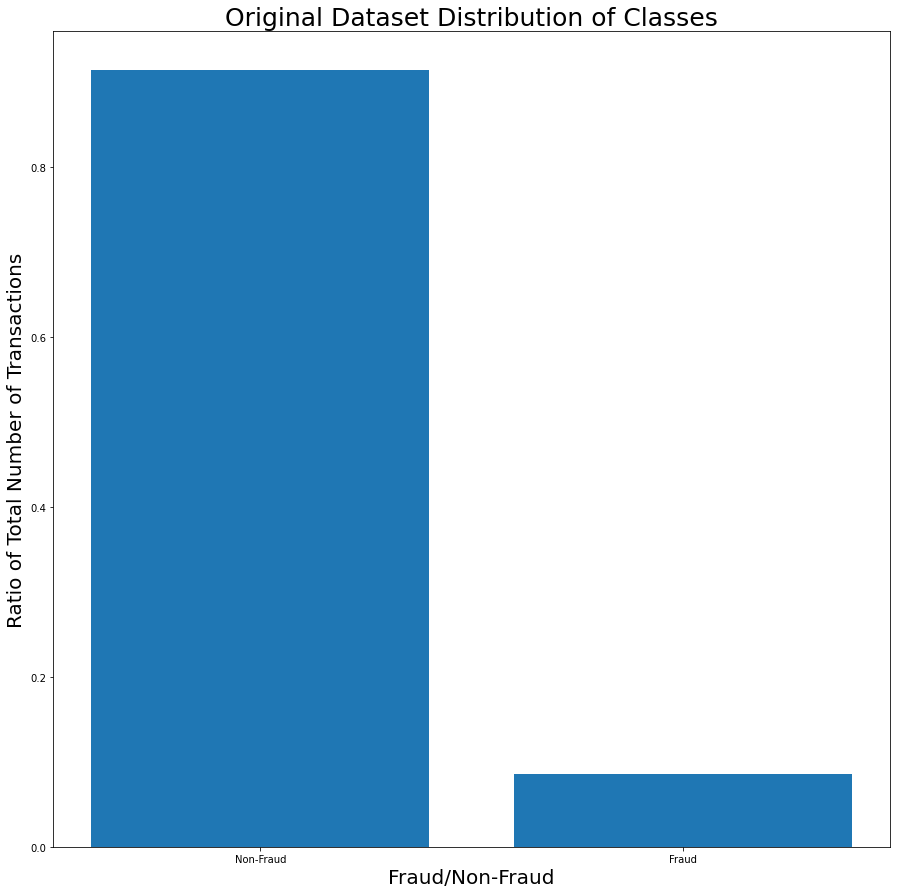

In [31]:
# bar graph comparisons of original dataset to train/test datasets (just y)

# original dataset
total_ct = sum(list(y_dict.values()))
y_ct = np.array(list(y_dict.values()))
fig, ax = plt.subplots(figsize = (15,15))
plt.bar(['Non-Fraud', 'Fraud'], height = y_ct/total_ct)
ax.set_ylabel('Ratio of Total Number of Transactions', fontsize = 20)
ax.set_xlabel('Fraud/Non-Fraud', fontsize = 20)
ax.set_title('Original Dataset Distribution of Classes', fontsize = 25)
plt.show()

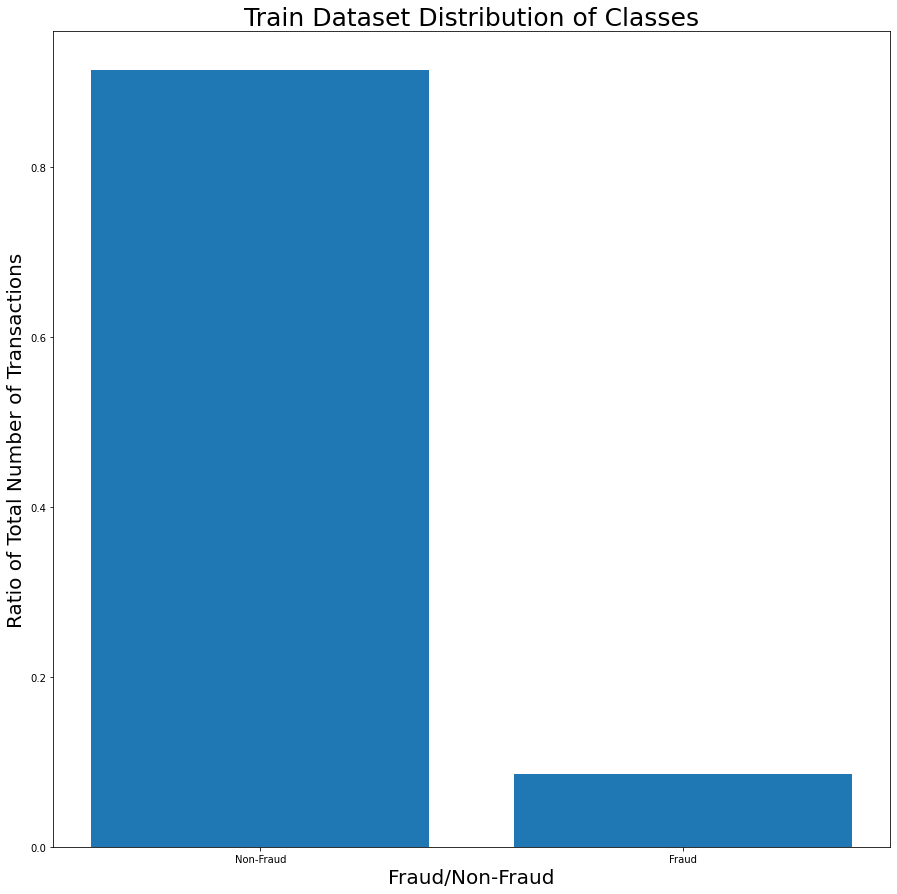

In [32]:
# y_train dataset
total_ct = sum(list(y_train_dict.values()))
y_ct = np.array(list(y_train_dict.values()))
fig, ax = plt.subplots(figsize = (15,15))
plt.bar(['Non-Fraud', 'Fraud'], height = y_ct/total_ct)
ax.set_ylabel('Ratio of Total Number of Transactions', fontsize = 20)
ax.set_xlabel('Fraud/Non-Fraud', fontsize = 20)
ax.set_title('Train Dataset Distribution of Classes', fontsize = 25)
plt.show()

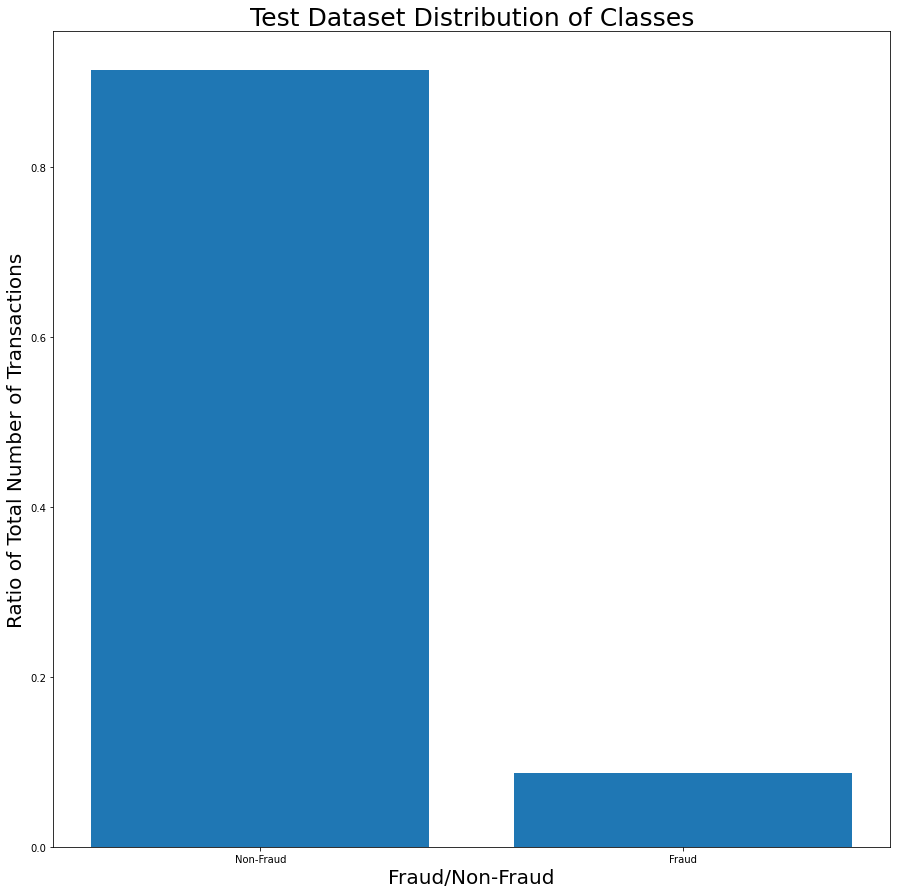

In [33]:
# y_test dataset
total_ct = sum(list(y_test_dict.values()))
y_ct = np.array(list(y_test_dict.values()))
fig, ax = plt.subplots(figsize = (15,15))
plt.bar(['Non-Fraud', 'Fraud'], height = y_ct/total_ct)
ax.set_ylabel('Ratio of Total Number of Transactions', fontsize = 20)
ax.set_xlabel('Fraud/Non-Fraud', fontsize = 20)
ax.set_title('Test Dataset Distribution of Classes', fontsize = 25)
plt.show()

In [34]:
X

distance_from_home  distance_from_last_transaction  \
0                0.012579                        0.000144   
1                0.002354                        0.000081   
2                0.001107                        0.000373   
3                0.000488                        0.002592   
4                0.009605                        0.000262   
...                   ...                             ...   
74420            0.000497                        0.000126   
74421            0.011373                        0.000263   
74422            0.000419                        0.000756   
74423            0.006125                        0.000008   
74424            0.000720                        0.000007   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            0.015408             True       True   
1                            0.010248             True      False   
2                            0.003387             True      False   
3                            0.002872             True       True   
4                            0.017600             True       True   
...                               ...              ...        ...   
74420                        0.014070             True      False   
74421                        0.011003             True       True   
74422                        0.009980             True       True   
74423                        0.012498             True      False   
74424                        0.014839             True       True   

       used_pin_number  online_order  
0                False         False  
1                False         False  
2                False          True  
3                False          True  
4                False          True  
...                ...           ...  
74420            False          True  
74421            False          True  
74422            False          True  
74423            False          True  
74424            False          True  

[74425 rows x 7 columns]

## Compare Distributions of X, X_train, X_test

In [35]:
# store original, train, and test datasets in dictionary

dict_data = {'X': X, 'X_train': X_train, 'X_test': X_test}

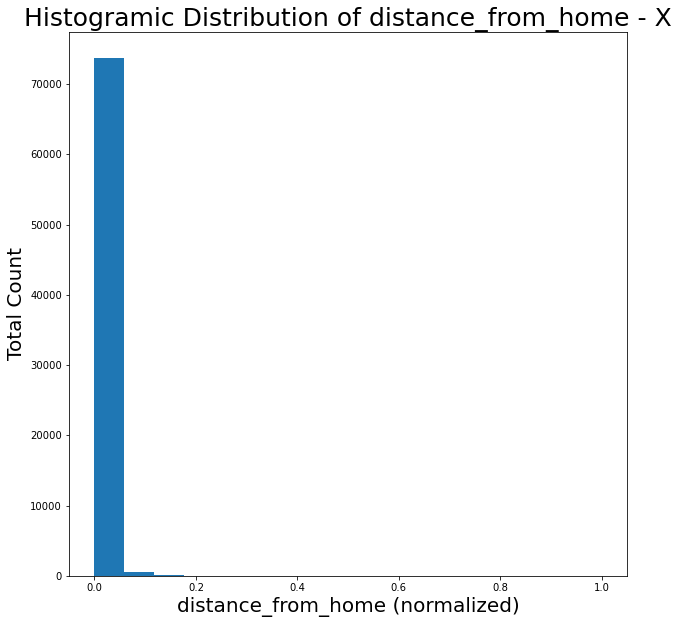

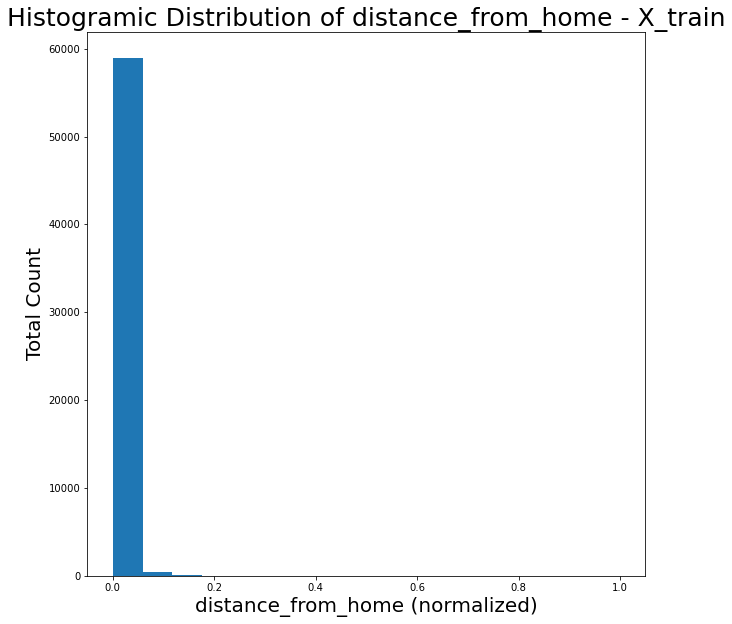

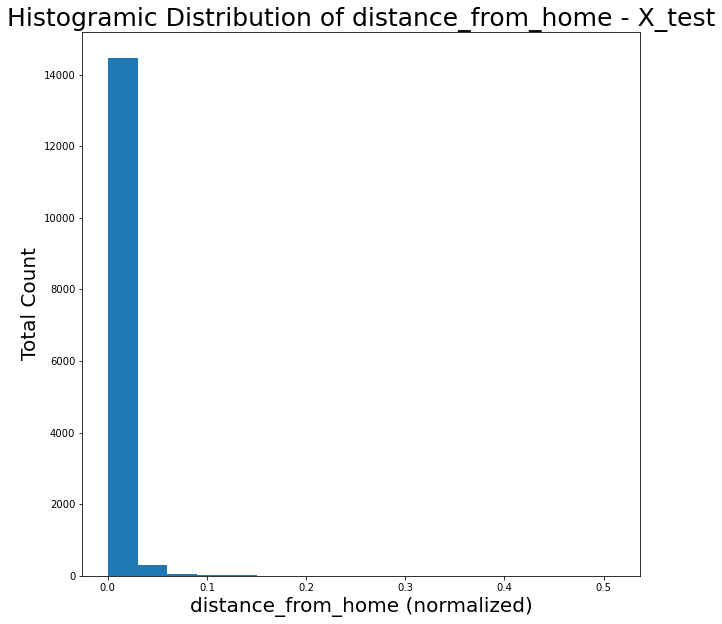

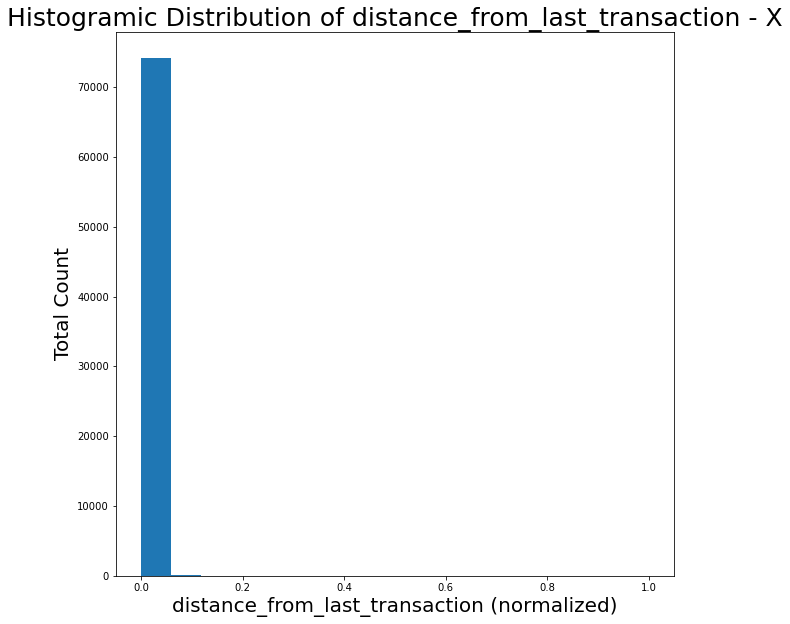

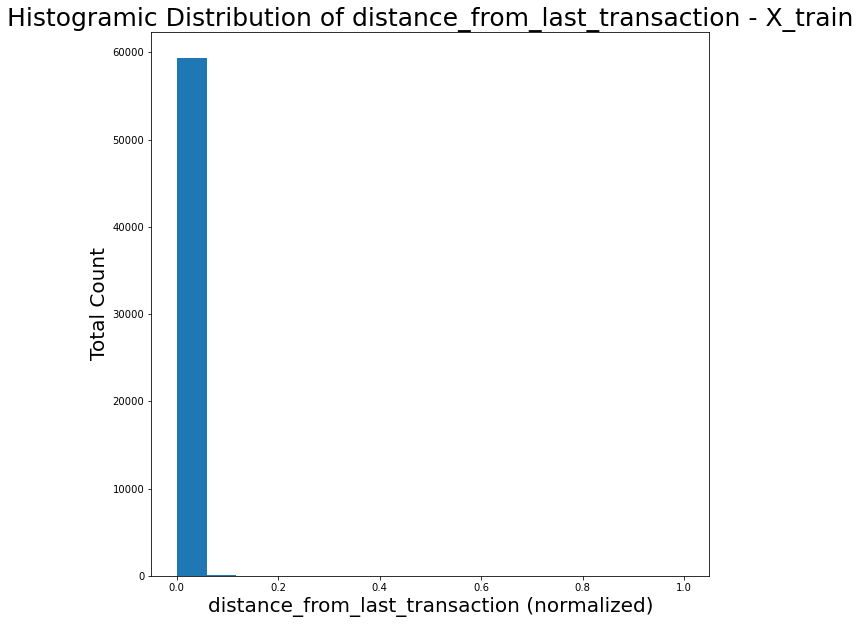

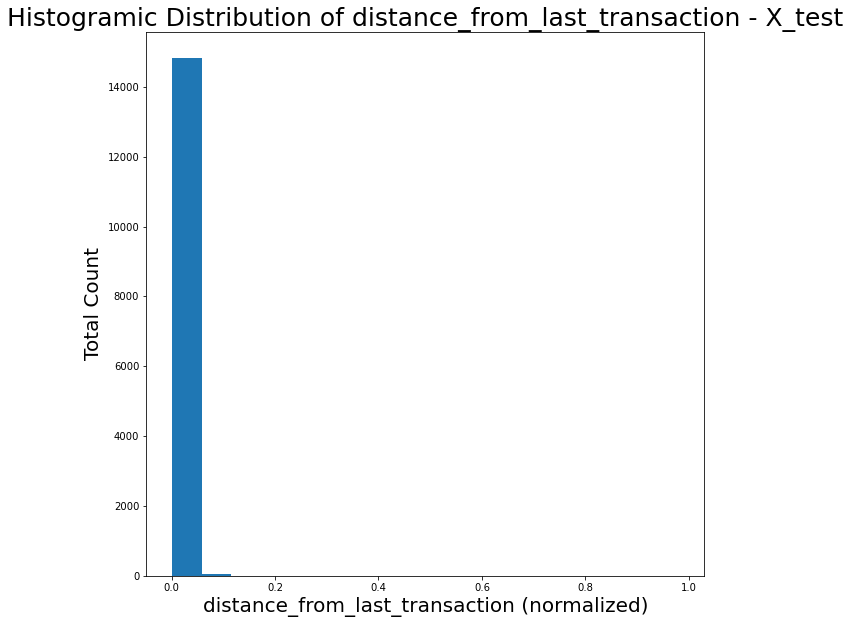

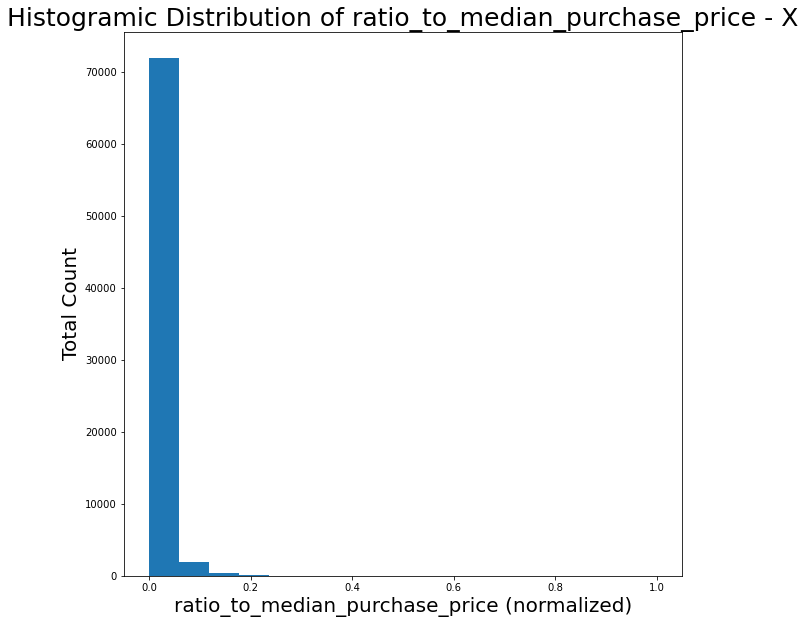

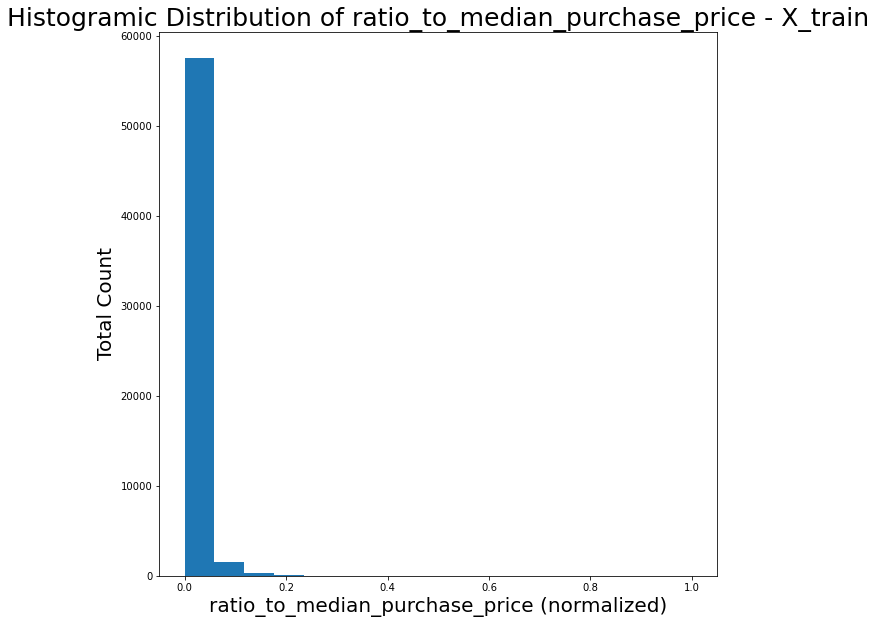

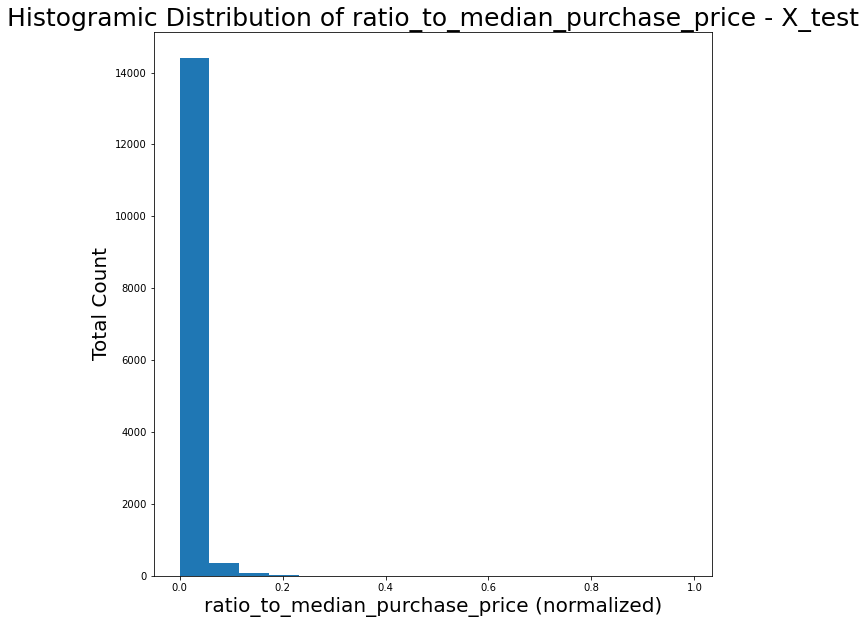

In [36]:
# now plot histogramic distributions of potential explanatory variables

# original dataset 
# continuous explanatory variables
cols_continuous = X.columns.values[:3]
cols_categorical = X.columns.values[3:]
num_bins = int(round(1 + 3.3 * np.log10(len(X)), 0))

for col in cols_continuous:
    for name, data in dict_data.items():
        fig, ax = plt.subplots(figsize = (10,10))
        plt.hist(data[col], bins = num_bins)
        ax.set_ylabel('Total Count', fontsize = 20)
        ax.set_xlabel(f'{col} (normalized)', fontsize = 20)
        ax.set_title(f'Histogramic Distribution of {col} - {name}', fontsize = 25)
        plt.show()

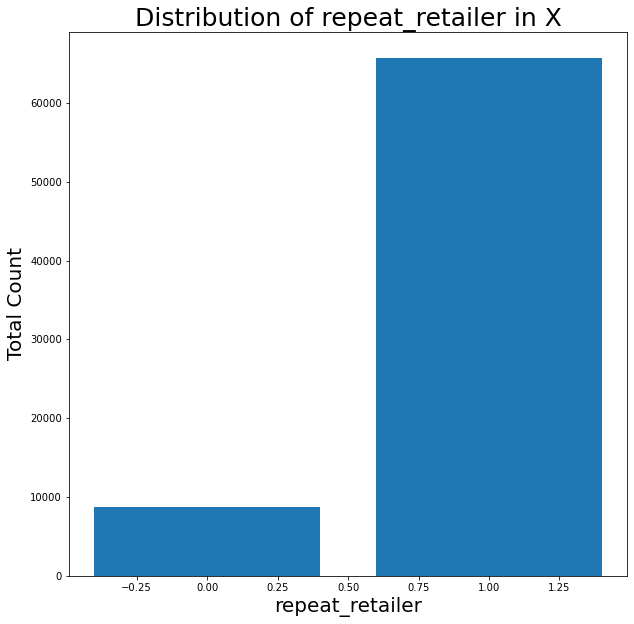

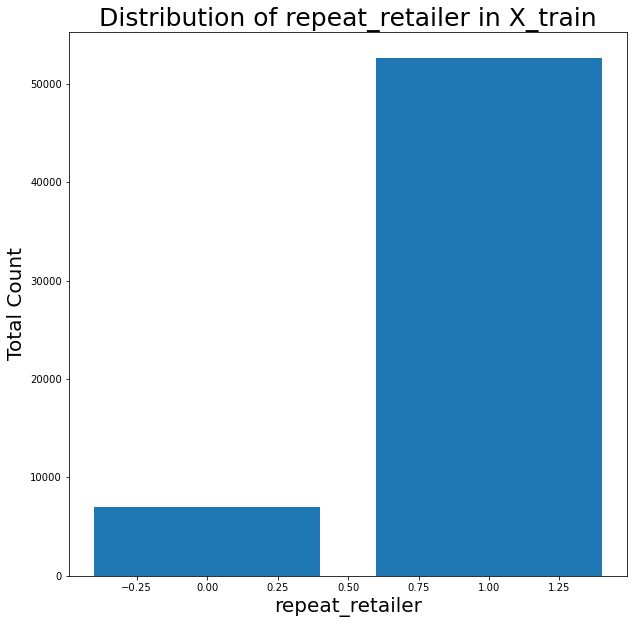

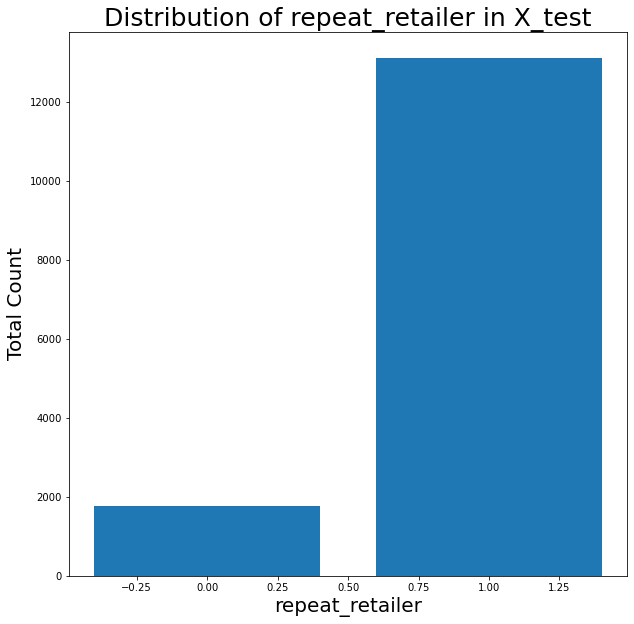

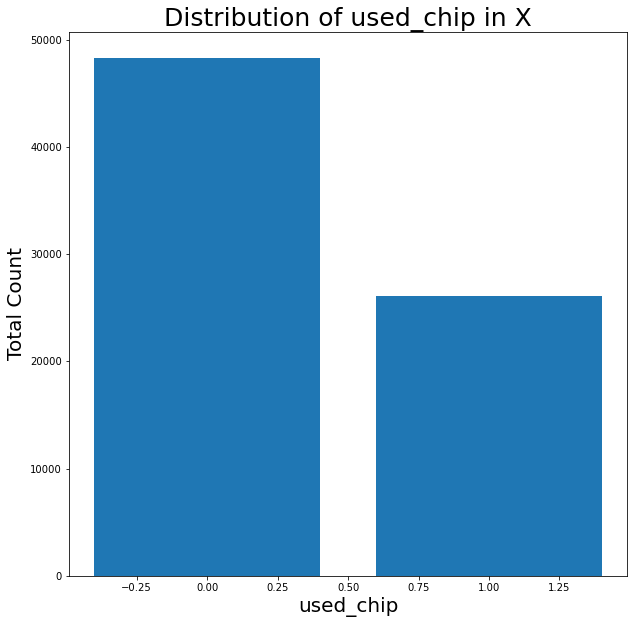

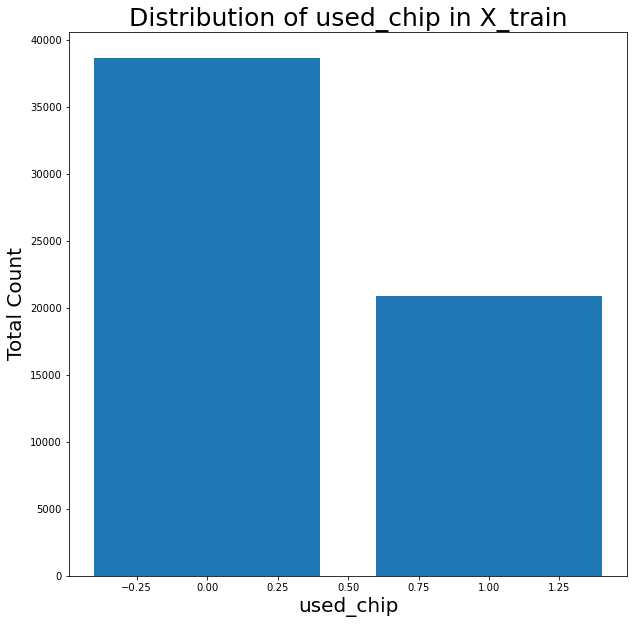

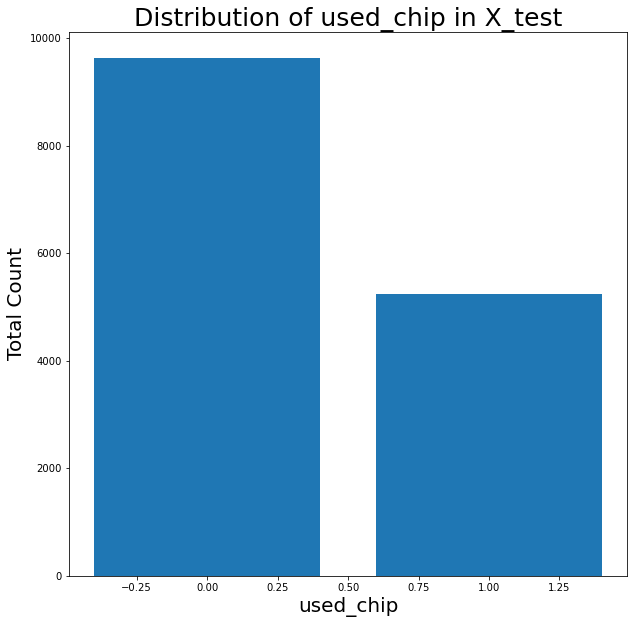

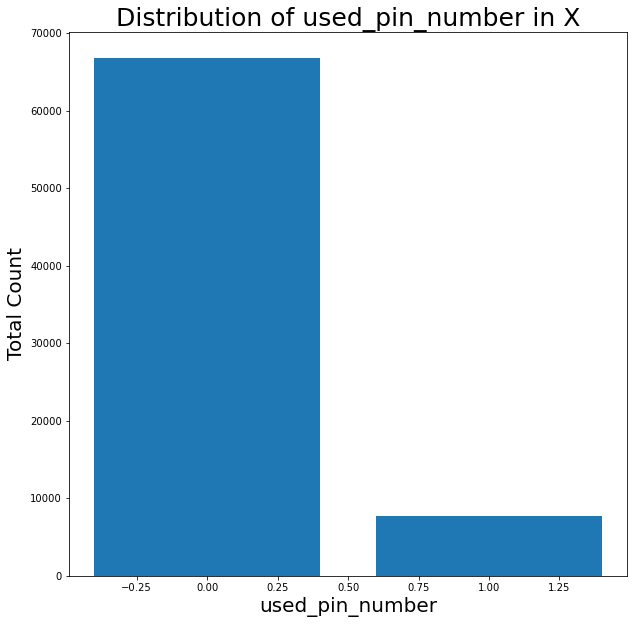

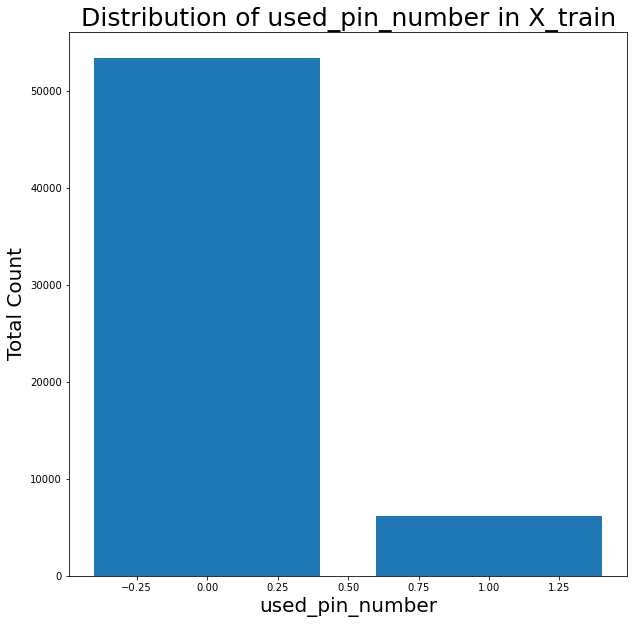

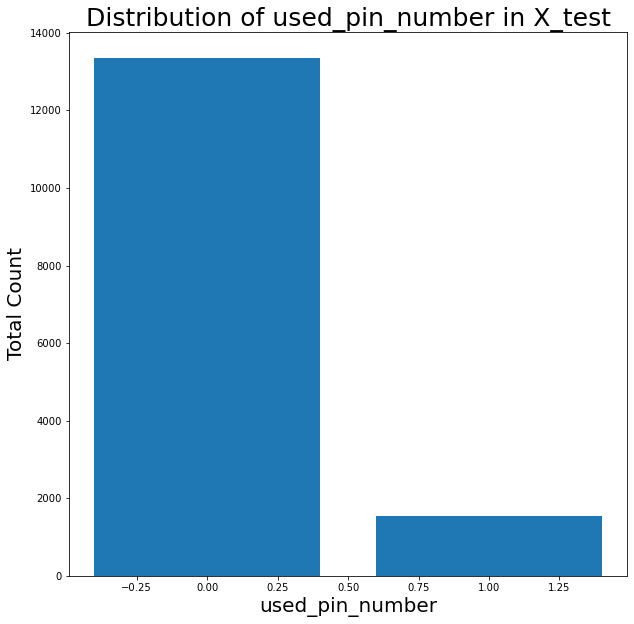

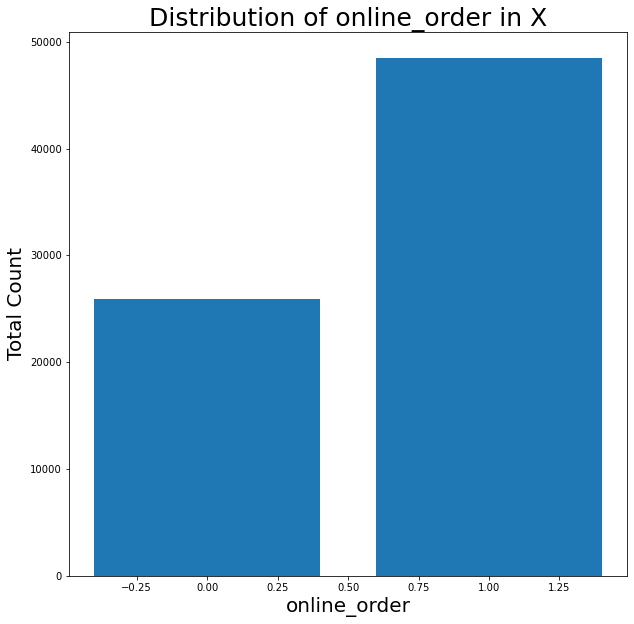

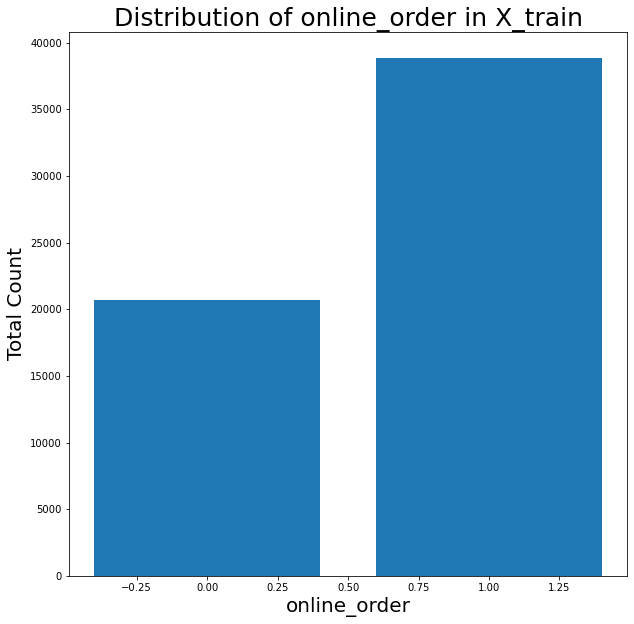

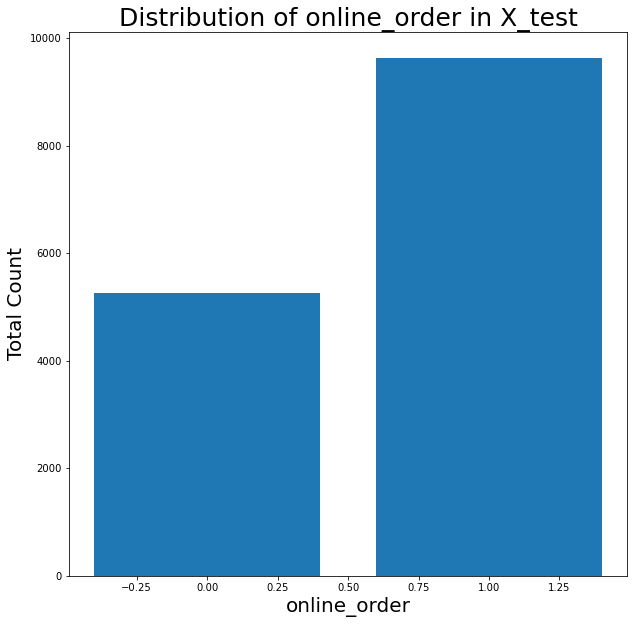

In [37]:
# categorical explanatory variables
for col in cols_categorical:
    for name, data in dict_data.items():
        fig, ax = plt.subplots(figsize = (10,10))
        true_ct = list(data[col]).count(True)
        false_ct = list(data[col]).count(False)
        plt.bar([True, False], height = [true_ct, false_ct])
        ax.set_ylabel('Total Count', fontsize = 20)
        ax.set_xlabel(f'{col}', fontsize = 20)
        ax.set_title(f'Distribution of {col} in {name}', fontsize = 25)
        plt.show()

## PCA Fit/Transformation of Continuous Data (all potential explanatory variables)

In [38]:
pca_train_data = X_train_model[cols_continuous]

In [39]:
# for baseline logistic regression model ONLY
pca_cc_trans_expl_norm = PCA(n_components = 3)

In [40]:
pca_vars = pca_cc_trans_expl_norm.fit_transform(pca_train_data)

In [41]:
# 2 components does not capture 95+% of the variation, 
# therefore keep all 3 continuous explanatory variables (no PCA fit/transformation req'd)
pca_cc_trans_expl_norm.explained_variance_ratio_

array([0.58043226, 0.25588829, 0.16367946])

In [42]:
# check for multicollinearity of continuous explanatory variables (since non-PCA will be utilized for modeling)
corr_mat[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']]
# no multicollinearity!

distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction           -0.003268   
ratio_to_median_purchase_price           -0.002571   
repeat_retailer                           0.141725   
used_chip                                -0.004805   
used_pin_number                           0.004309   
online_order                             -0.000338   
fraud                                     0.186338   

                                distance_from_last_transaction  \
distance_from_home                                   -0.003268   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                       -0.000245   
repeat_retailer                                      -0.006252   
used_chip                                            -0.001789   
used_pin_number                                       0.004330   
online_order                                         -0.001822   
fraud                                                 0.095101   

                                ratio_to_median_purchase_price  
distance_from_home                                   -0.002571  
distance_from_last_transaction                       -0.000245  
ratio_to_median_purchase_price                        1.000000  
repeat_retailer                                      -0.002201  
used_chip                                             0.002879  
used_pin_number                                       0.000756  
online_order                                          0.000882  
fraud                                                 0.451454

# Logistic Regression Modeling (Baseline)

## Non-PCA continuous explanatory variables

In [43]:
lrm_expl_vars_train = X_train_model[cols_continuous]

In [44]:
lrm = LogisticRegression(random_state = 0).fit(lrm_expl_vars_train, y_train)

In [45]:
lrm_expl_vars_test = X_test_model[cols_continuous]

In [46]:
y_pred_test = lrm.predict(lrm_expl_vars_test)

In [47]:
y_pred_train = lrm.predict(lrm_expl_vars_train)

In [48]:
# scores for train dataset
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96     54406
        True       0.63      0.14      0.22      5134

    accuracy                           0.92     59540
   macro avg       0.78      0.56      0.59     59540
weighted avg       0.90      0.92      0.89     59540



In [49]:
print(recall_score(y_train, y_pred_train))

0.13517724970783015


In [50]:
# scores for test dataset
print(classification_report(y_test, y_pred_test))
# recall for 'True' class is 13%, i.e., 13% of TPs are predicted correctly with respect to TPs & FNs (aggregate)
# this recall score is unacceptable for a fraud detection model (due to high cost of FNs)
# further modeling is needed

              precision    recall  f1-score   support

       False       0.92      0.99      0.96     13601
        True       0.60      0.13      0.21      1284

    accuracy                           0.92     14885
   macro avg       0.76      0.56      0.58     14885
weighted avg       0.90      0.92      0.89     14885



In [51]:
print(recall_score(y_test, y_pred_test))

0.1292834890965732


## PCA continuous explanatory variables

In [52]:
pca_test_data = X_test_model[cols_continuous]

In [53]:
# transform test dataset to PCA space of train dataset
pca_vars_test = pca_cc_trans_expl_norm.transform(pca_test_data)

In [54]:
lrm_pca = LogisticRegression(random_state = 0).fit(pca_vars, y_train)

In [55]:
y_pred_pca_train = lrm_pca.predict(pca_vars)

In [56]:
y_pred_pca_test = lrm_pca.predict(pca_vars_test)

In [57]:
# scores for train dataset
print(classification_report(y_train, y_pred_pca_train))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96     54406
        True       0.63      0.14      0.22      5134

    accuracy                           0.92     59540
   macro avg       0.78      0.56      0.59     59540
weighted avg       0.90      0.92      0.89     59540



In [58]:
print(recall_score(y_train, y_pred_pca_train))

0.13517724970783015


In [59]:
# scores for test dataset
print(classification_report(y_test, y_pred_pca_test))
# recall for 'True' class is still 14% (with PCA applied), i.e., 14% of TPs are predicted correctly 
# with respect to TPs & FNs (aggregate) this recall score is unacceptable for a fraud detection 
# model (due to high cost of FNs), further modeling is needed

              precision    recall  f1-score   support

       False       0.92      0.99      0.96     13601
        True       0.60      0.13      0.21      1284

    accuracy                           0.92     14885
   macro avg       0.76      0.56      0.58     14885
weighted avg       0.90      0.92      0.89     14885



In [60]:
print(recall_score(y_test, y_pred_pca_test))

0.1292834890965732


In [61]:
# save model
pickle.dump(lrm_pca, open('models/logisticregression_cc_trans.pkl', 'wb'))

## FAMD Fit/Transformation of Data (all potential explanatory variables) - in preparation for additional classification modeling

In [62]:
# perform FAMD on given explanatory data
famd_cc_trans = FAMD(n_components = 7, n_iter = 10, random_state = 101)

In [63]:
X_train_famd = X_train_model

In [64]:
# fit train dataset
famd_cc_trans.fit(X_train_famd)

FAMD(n_components=7, n_iter=10, random_state=101)

In [65]:
# transform train dataset
X_train_famd_transformed = famd_cc_trans.transform(X_train_famd)
X_train_famd_transformed

0         1         2         3         4         5         6
0      0.807083 -0.024868  0.053706 -1.120975  0.334602  0.254798 -0.097941
1      0.661756  0.373758 -0.397737 -0.191467 -0.004326 -0.540006 -0.085161
2      0.629673  0.305009  0.186840 -0.866336 -0.387295 -0.020268 -0.094143
3      0.583597  0.259911 -0.339319 -1.000861 -0.387538 -0.023514 -0.093983
4      0.339857 -0.863479  0.724669 -0.510554 -0.008900 -0.556956 -0.086900
...         ...       ...       ...       ...       ...       ...       ...
59535  0.681127  0.266505 -0.184069 -0.150555 -0.004569 -0.539278 -0.085206
59536  0.354465  0.280495 -0.436720 -0.539254 -0.005630 -0.553214 -0.086283
59537  0.801769  0.293990 -0.326251 -1.147607  0.335485  0.255334 -0.097770
59538  3.097800  0.473972 -0.368148  2.449852  0.004281 -0.439037 -0.076003
59539  0.281715 -0.194249  0.017908 -0.705787 -0.007949 -0.611920  0.725753

[59540 rows x 7 columns]

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (23.77% inertia)', ylabel='Component 1 (23.15% inertia)'>

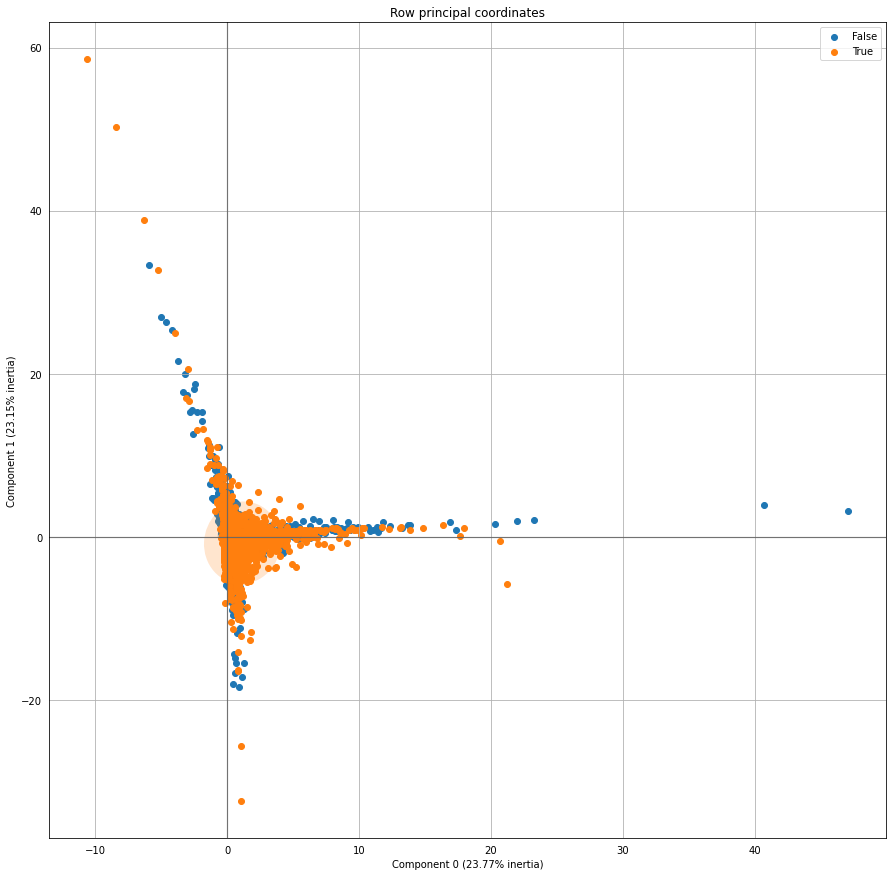

In [66]:
# 46.83% of variation explained...use more components to describe 90%+ of total variation
famd_cc_trans.plot_row_coordinates(X_train_famd, figsize = (15, 15), color_labels = y_train)

In [67]:
# 4 FAMD components explain 90+% of the variation 
famd_cc_trans.explained_inertia_

array([0.2377075 , 0.23150946, 0.22968691, 0.22499153, 0.03516112,
       0.02661337, 0.01433012])

In [68]:
# perform FAMD on given explanatory data (4 components only)
famd_cc_trans = FAMD(n_components = 4, n_iter = 10, random_state = 101)

In [69]:
# fit train dataset
famd_cc_trans.fit(X_train_famd)

FAMD(n_components=4, n_iter=10, random_state=101)

In [70]:
# transform train dataset
X_train_famd_transformed = famd_cc_trans.transform(X_train_famd)
X_train_famd_transformed

0         1         2         3
0      0.807083 -0.024868  0.053706 -1.120975
1      0.661756  0.373758 -0.397737 -0.191467
2      0.629673  0.305009  0.186840 -0.866336
3      0.583597  0.259911 -0.339319 -1.000861
4      0.339857 -0.863479  0.724669 -0.510554
...         ...       ...       ...       ...
59535  0.681127  0.266505 -0.184069 -0.150555
59536  0.354465  0.280495 -0.436720 -0.539254
59537  0.801769  0.293990 -0.326251 -1.147607
59538  3.097800  0.473972 -0.368148  2.449852
59539  0.281715 -0.194249  0.017908 -0.705787

[59540 rows x 4 columns]

In [71]:
X_test_famd = X_test_model

In [72]:
# transform test dataset
X_test_famd_transformed = famd_cc_trans.transform(X_test_famd)
X_test_famd_transformed

0         1         2         3
0      0.184591  0.124876 -0.309313 -0.277238
1      0.446959  0.324723 -0.387994 -0.343901
2     -0.179064  0.331472 -0.468887 -0.419785
3      0.106201  0.297649 -0.452005 -0.363477
4      0.361508  0.038527 -0.193585 -0.439433
...         ...       ...       ...       ...
14880  0.198892 -1.713285  1.525726 -0.555586
14881  0.486380  0.107055  0.059119 -0.258713
14882  0.138808  0.214098 -0.050701 -0.637623
14883  0.432305  0.119544 -0.252922 -0.362813
14884  0.178750 -2.764508  2.781775 -0.147393

[14885 rows x 4 columns]

# Classification Modeling (Other)

## KNN

In [73]:
n = round(len(X_train_famd_transformed)**(1/2))
n

244

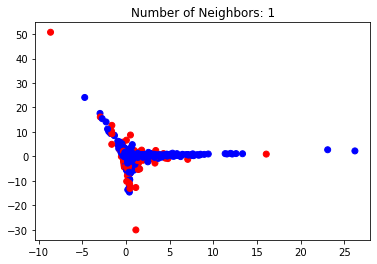

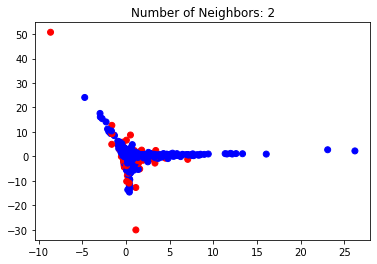

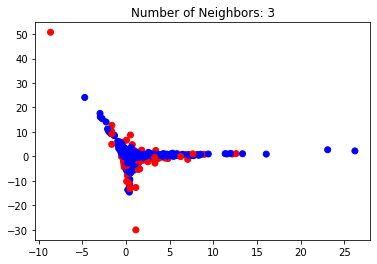

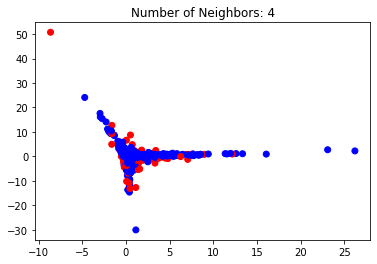

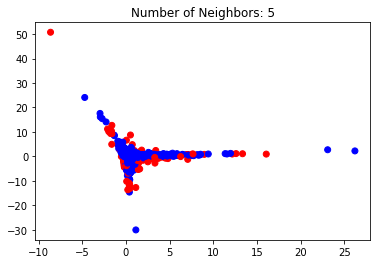

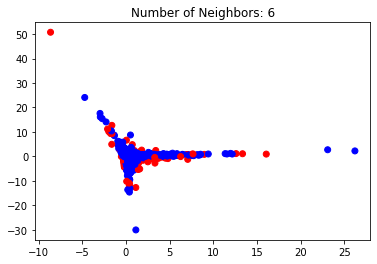

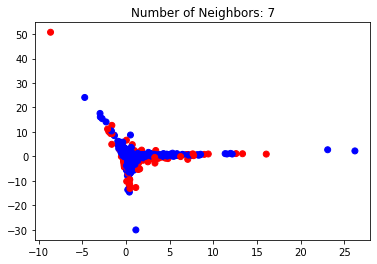

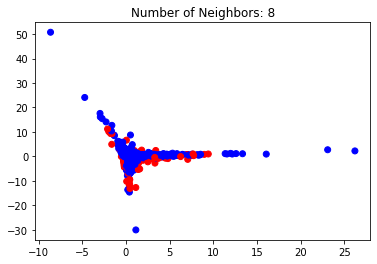

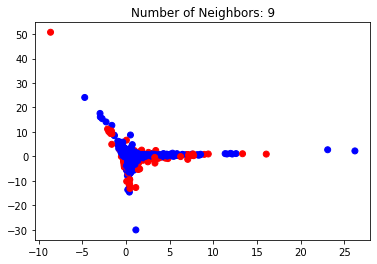

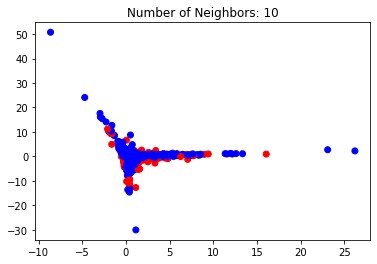

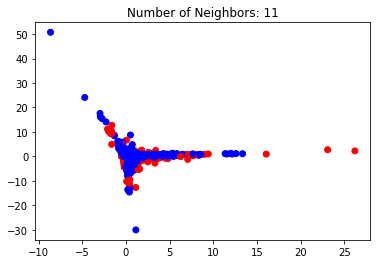

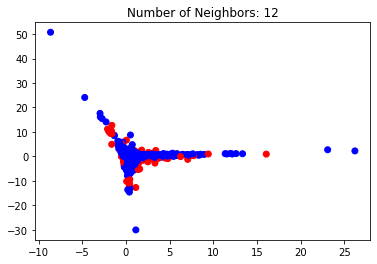

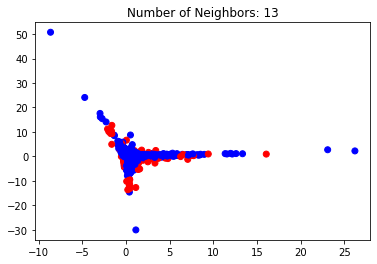

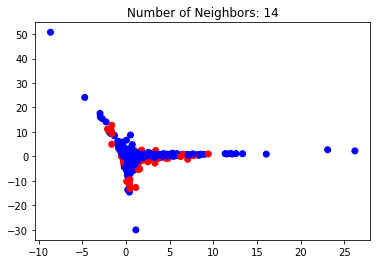

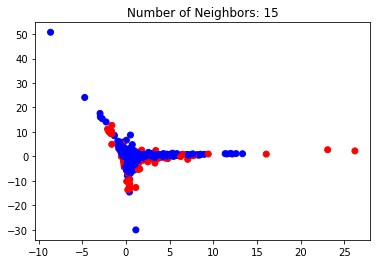

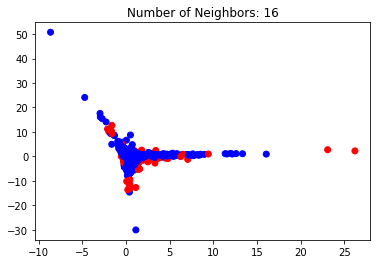

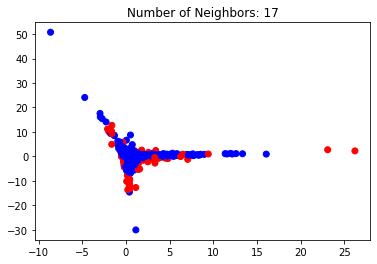

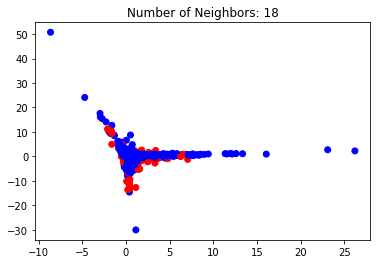

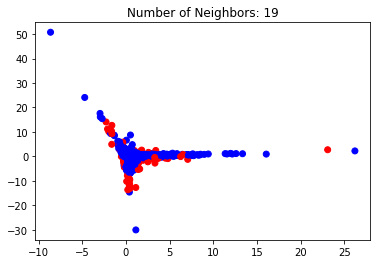

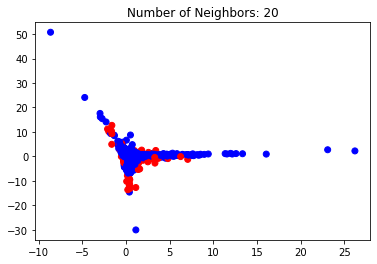

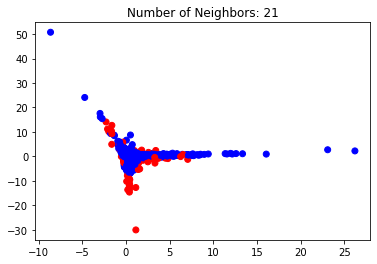

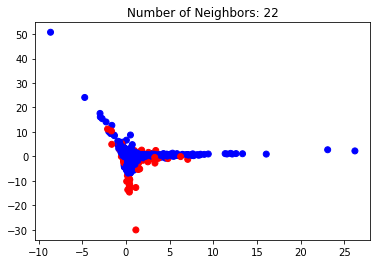

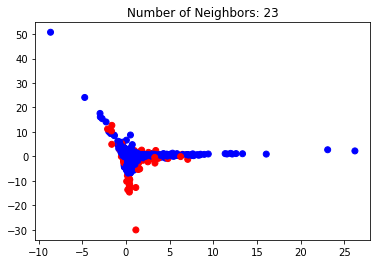

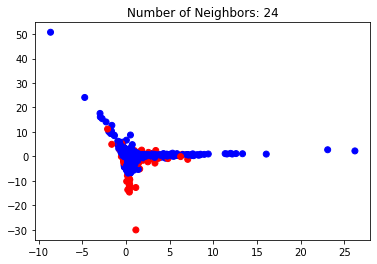

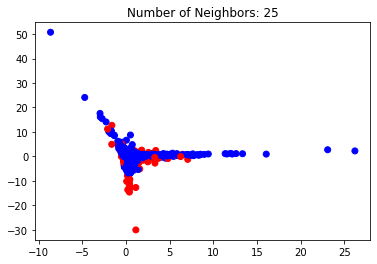

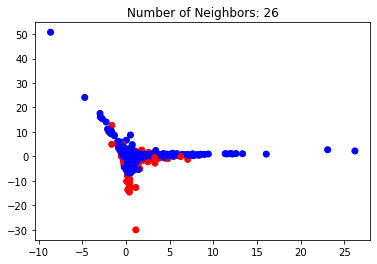

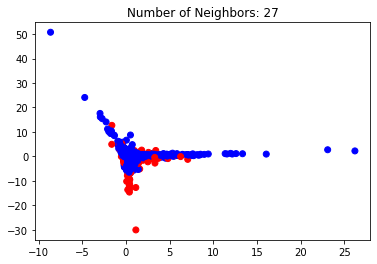

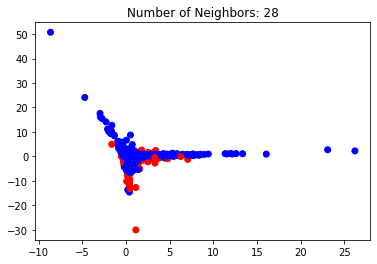

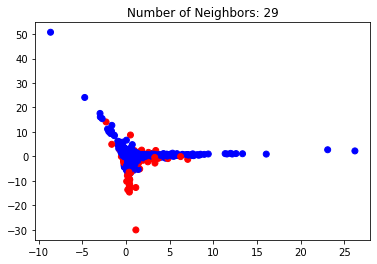

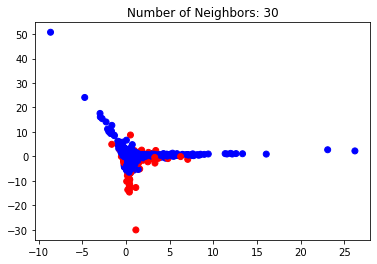

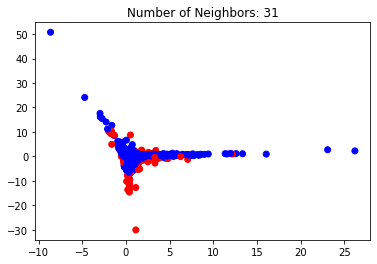

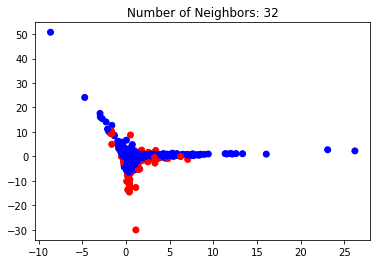

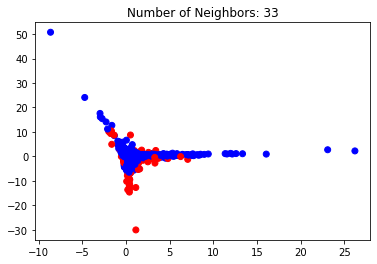

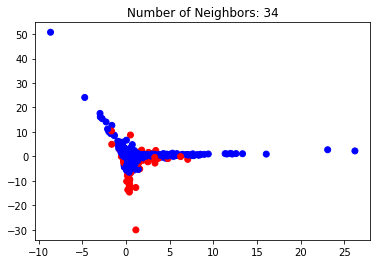

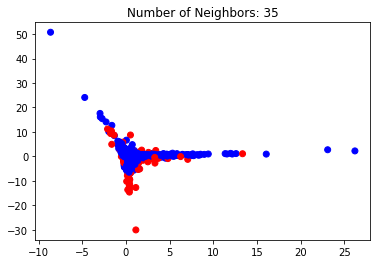

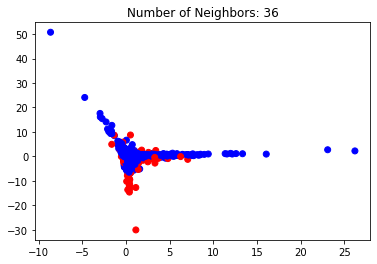

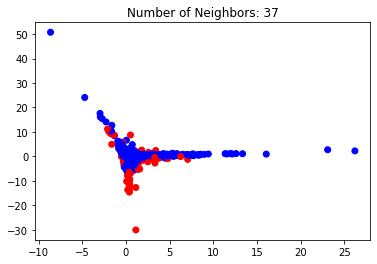

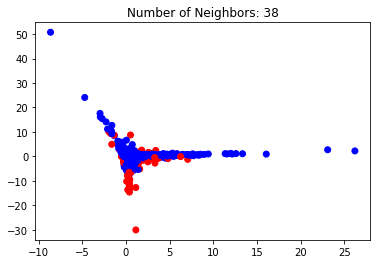

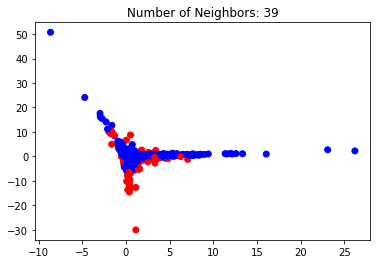

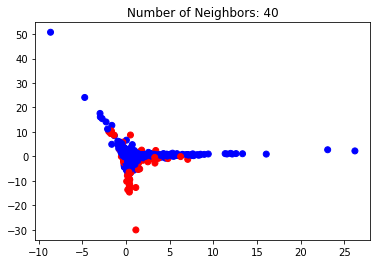

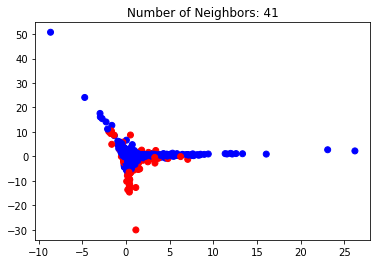

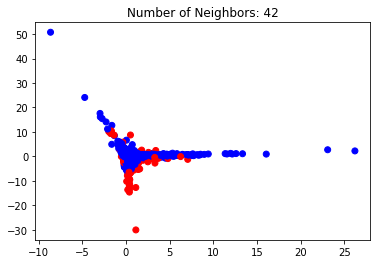

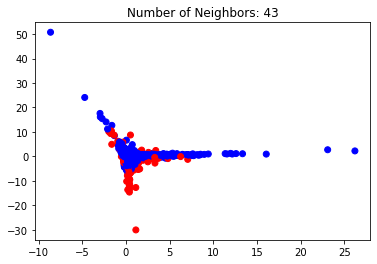

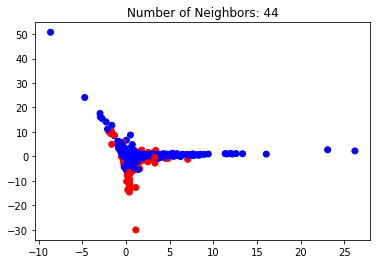

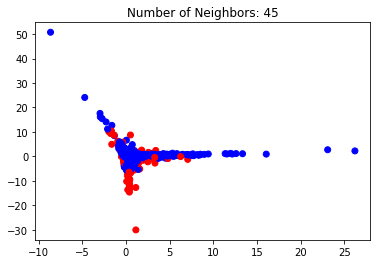

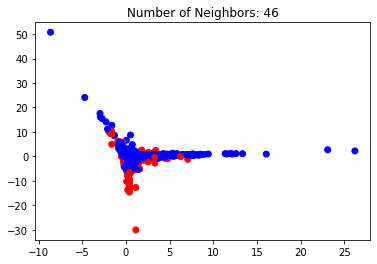

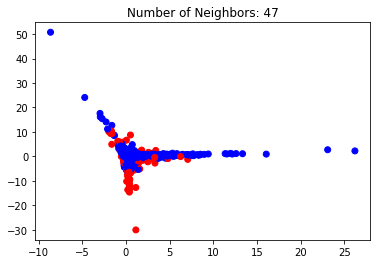

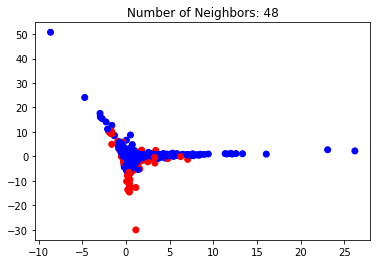

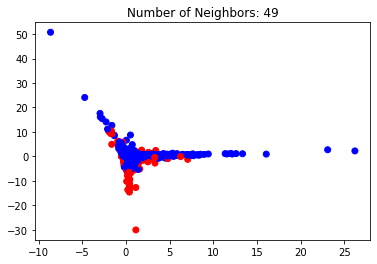

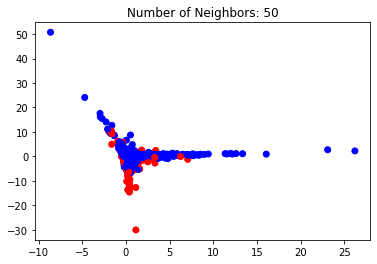

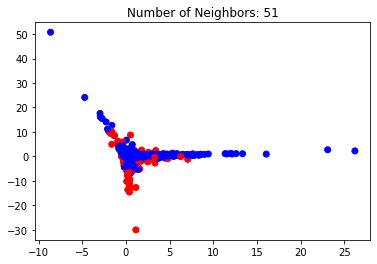

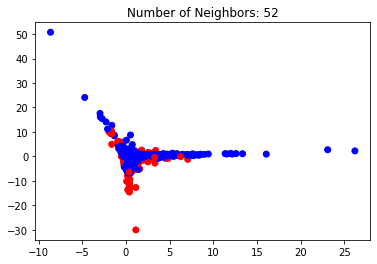

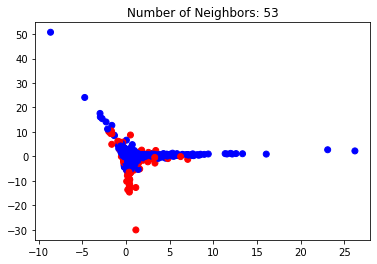

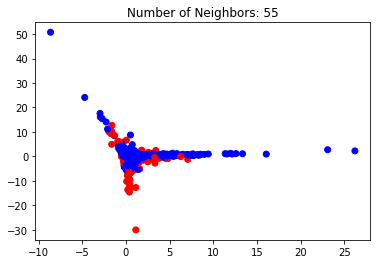

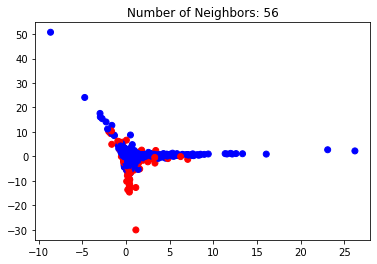

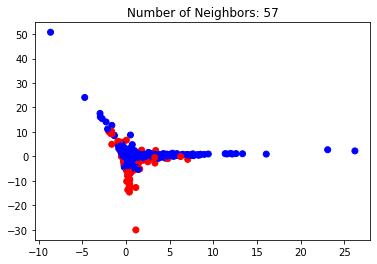

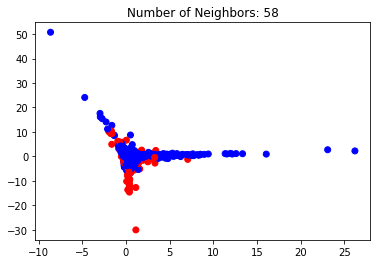

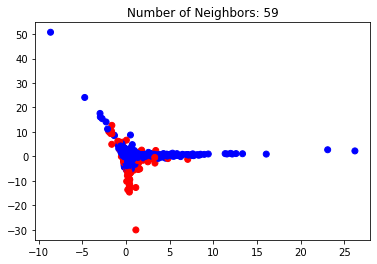

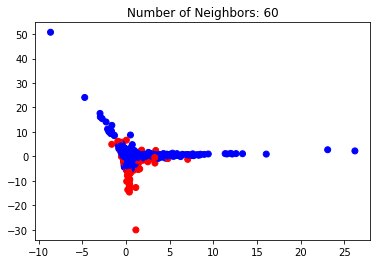

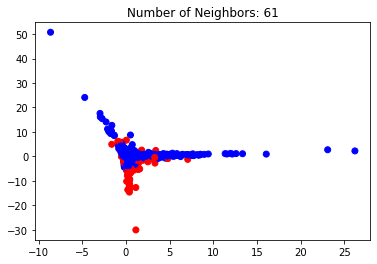

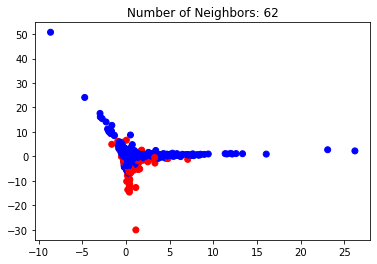

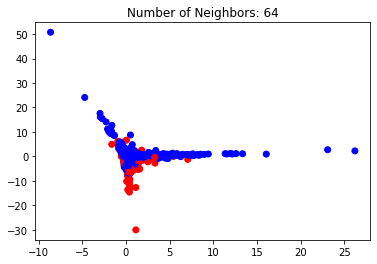

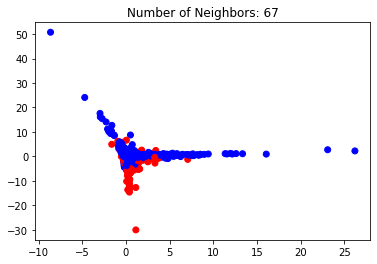

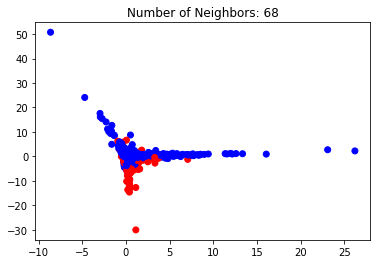

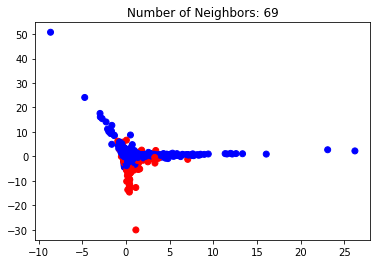

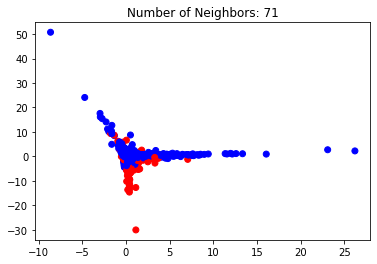

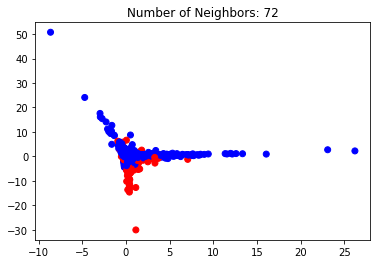

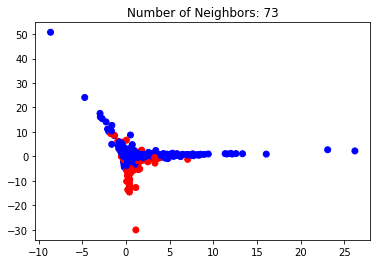

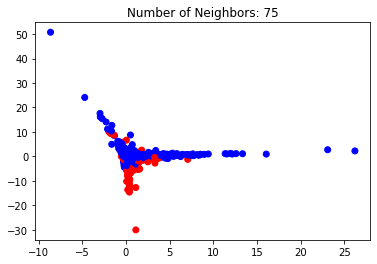

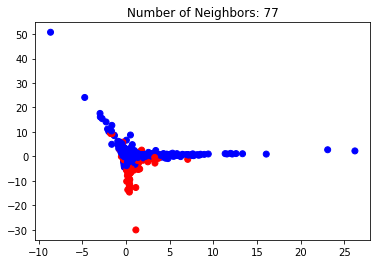

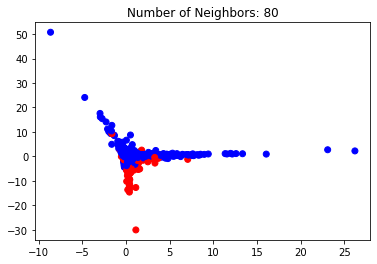

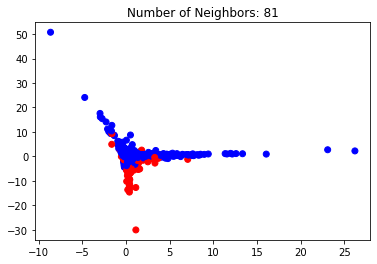

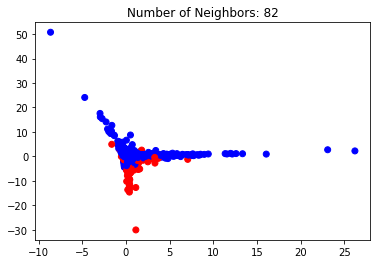

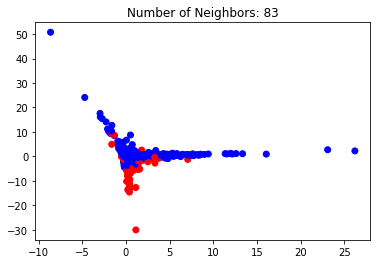

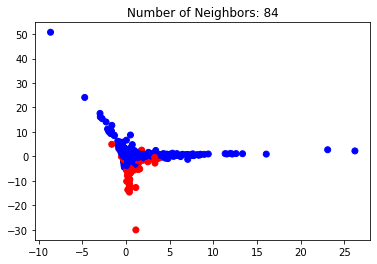

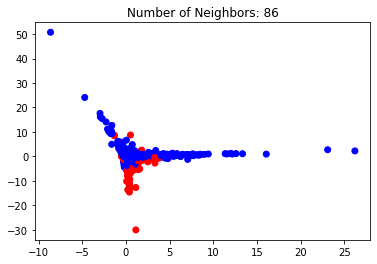

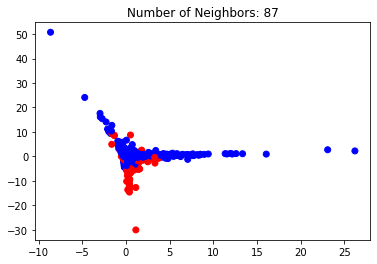

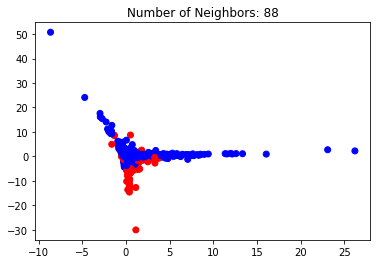

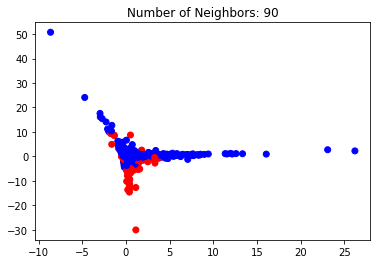

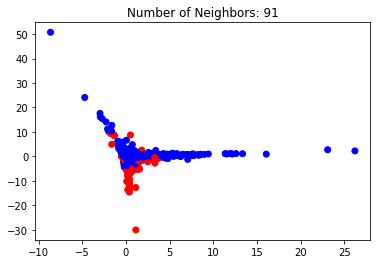

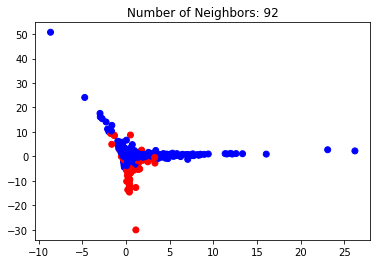

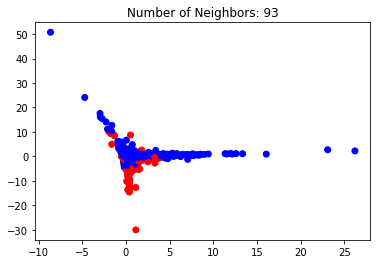

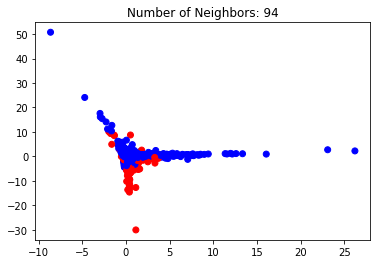

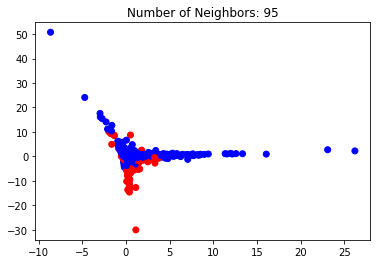

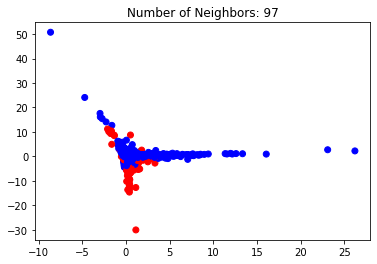

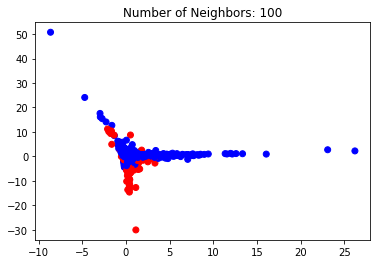

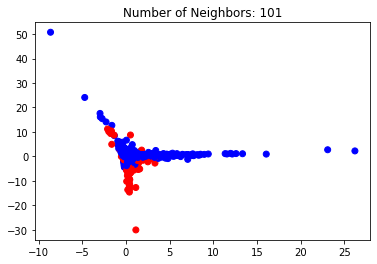

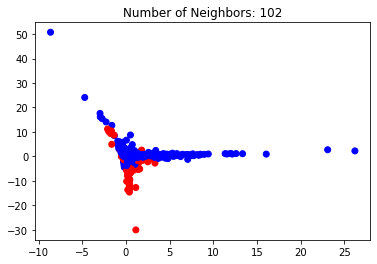

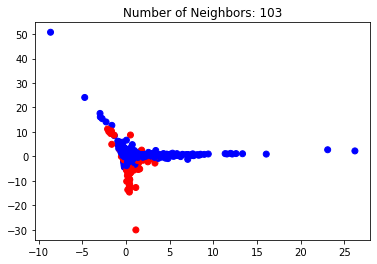

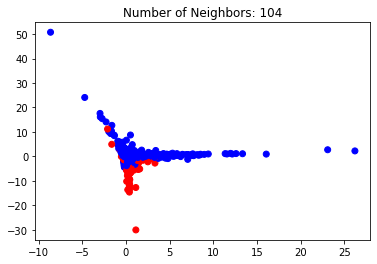

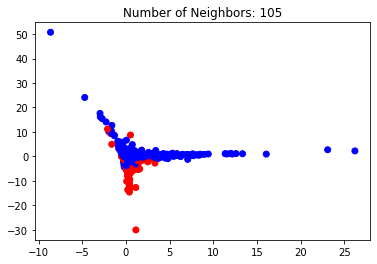

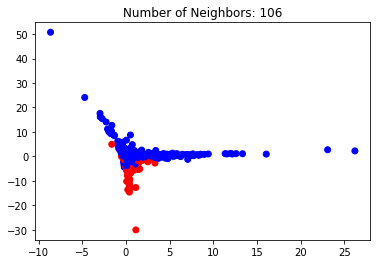

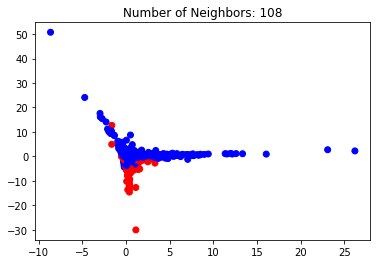

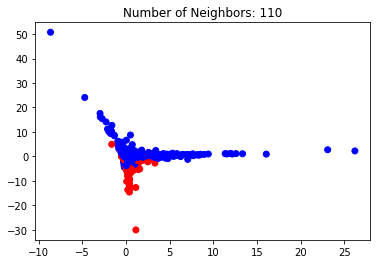

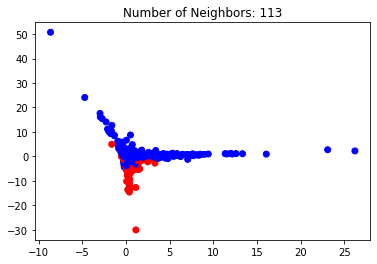

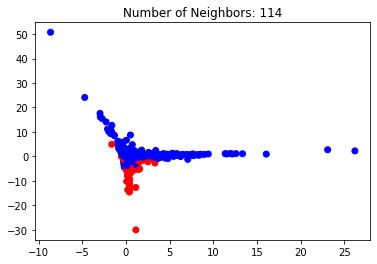

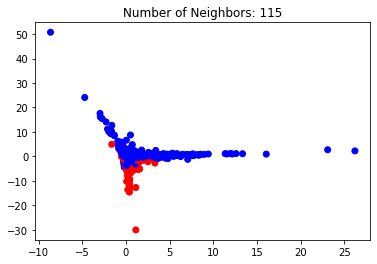

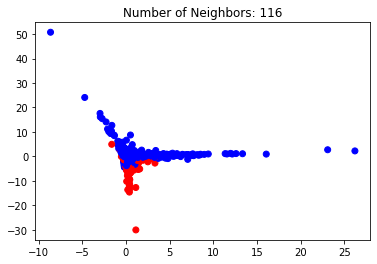

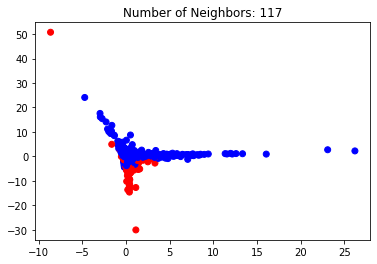

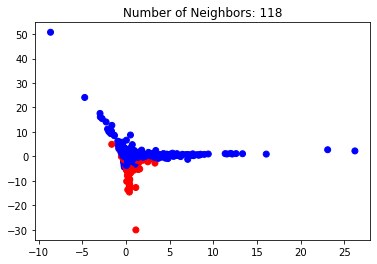

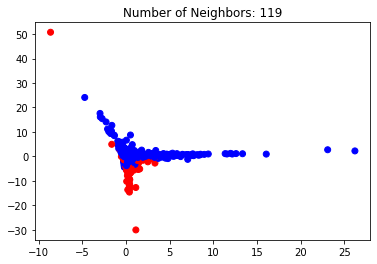

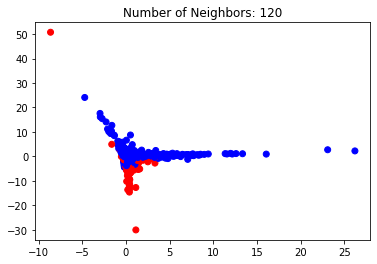

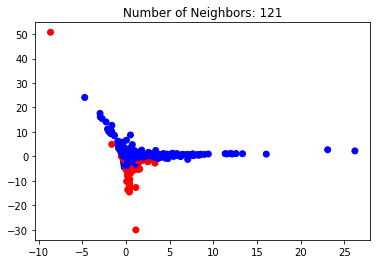

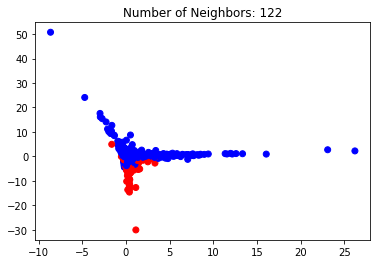

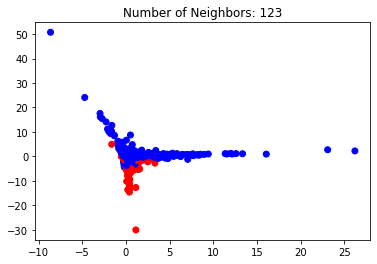

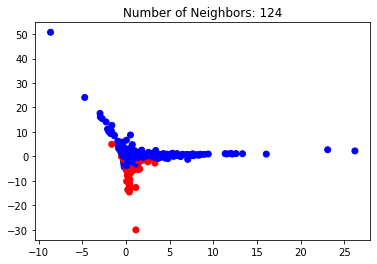

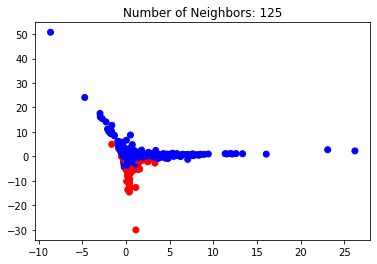

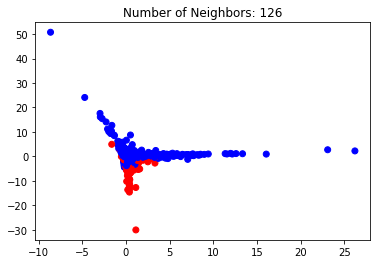

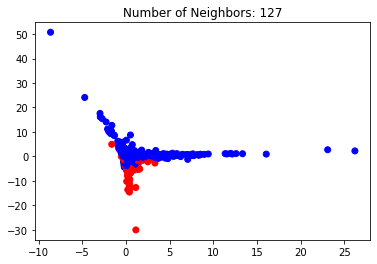

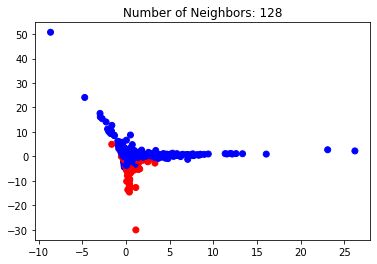

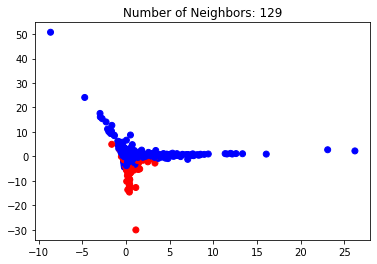

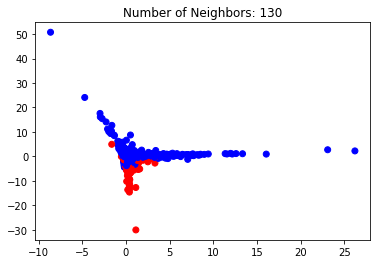

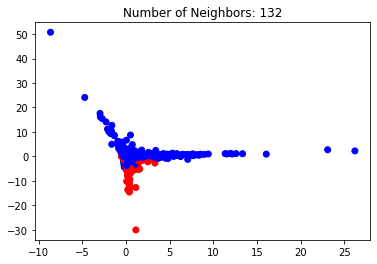

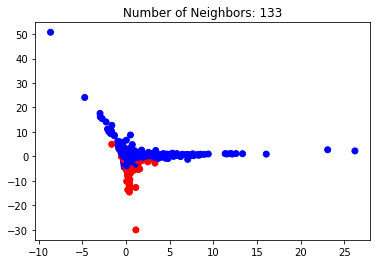

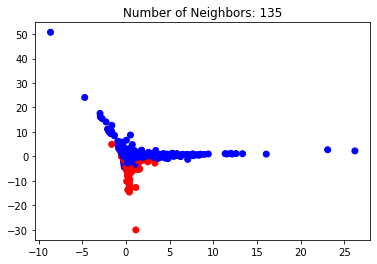

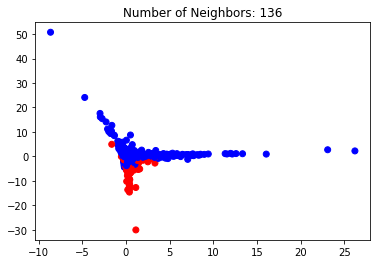

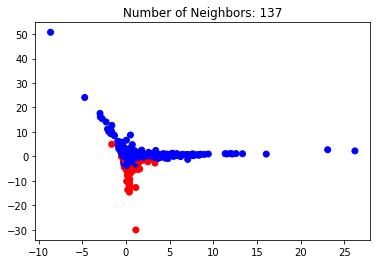

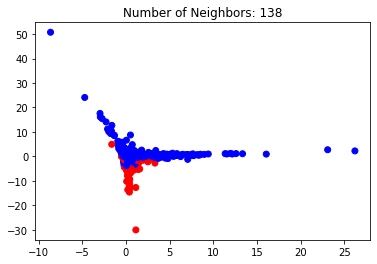

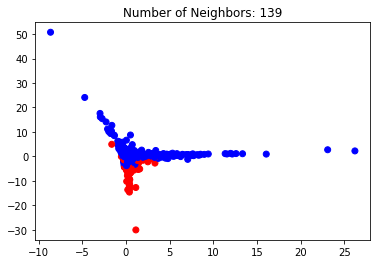

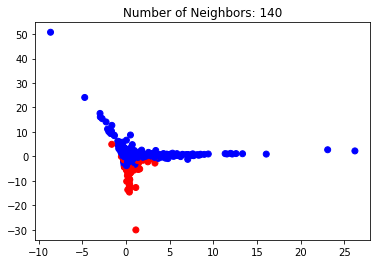

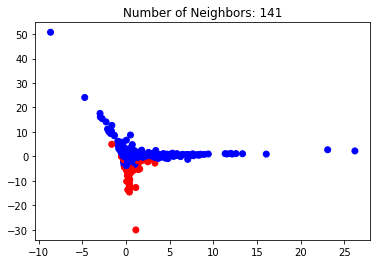

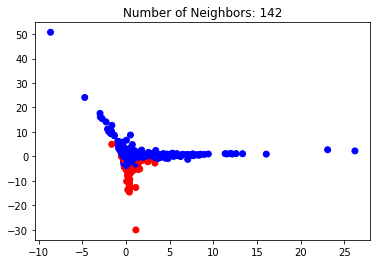

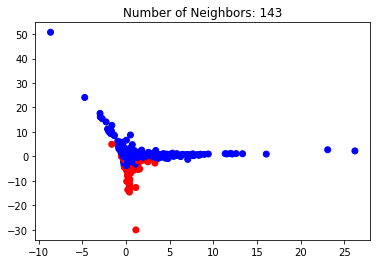

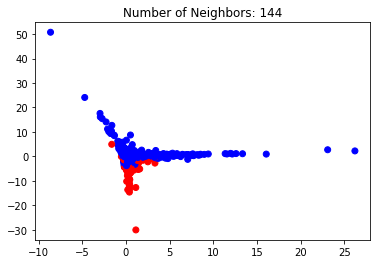

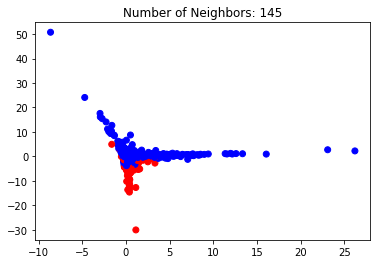

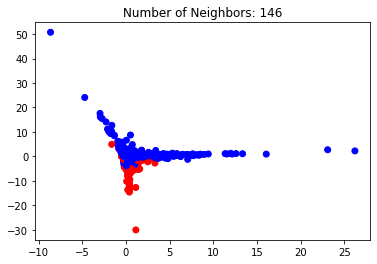

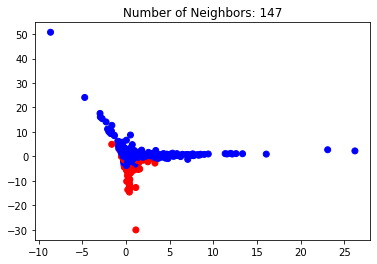

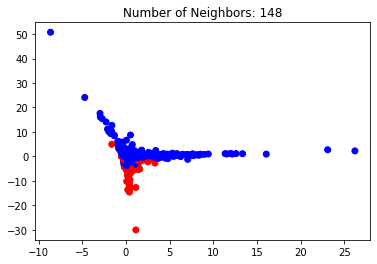

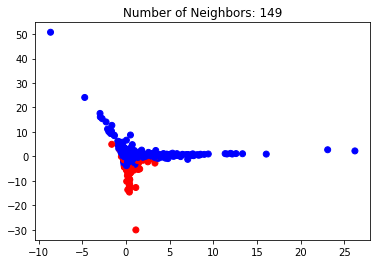

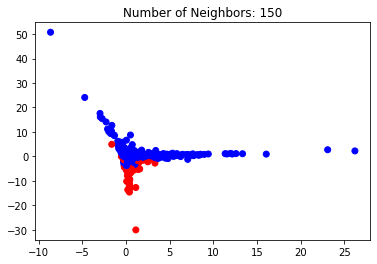

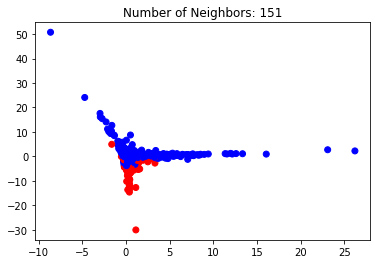

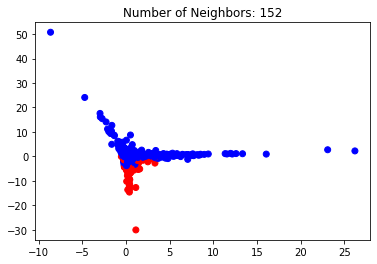

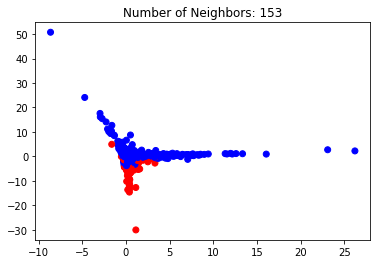

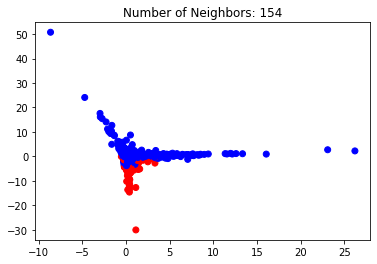

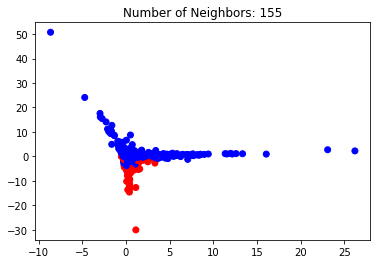

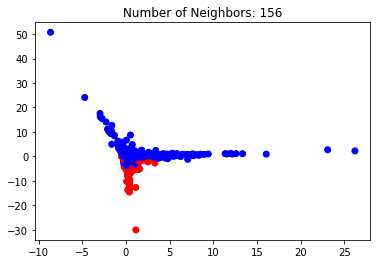

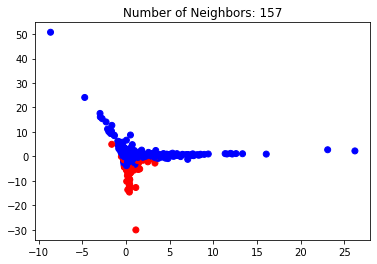

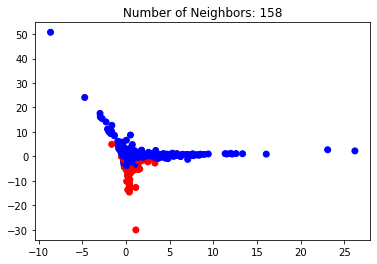

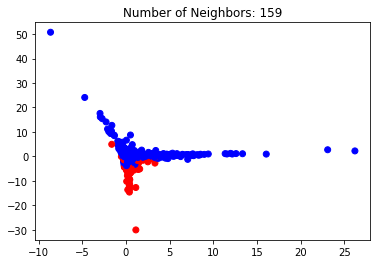

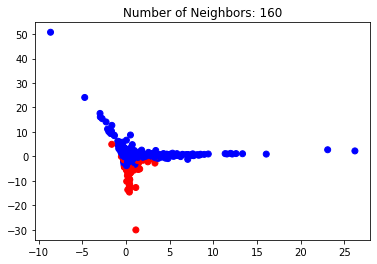

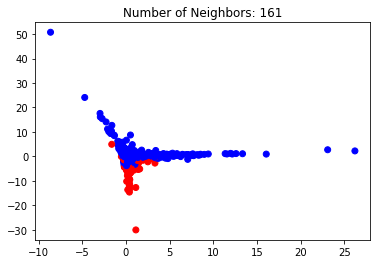

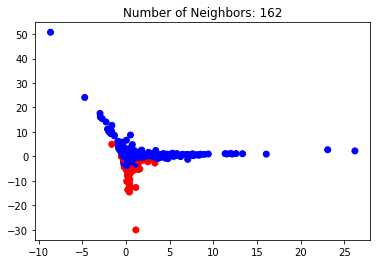

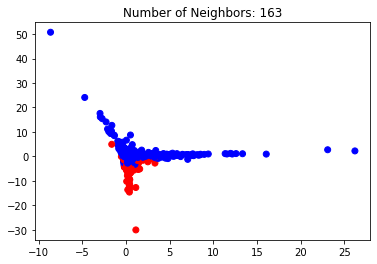

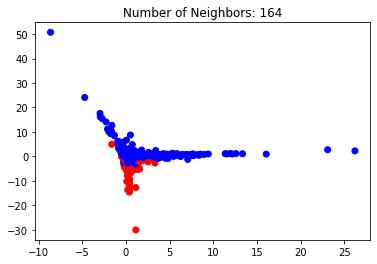

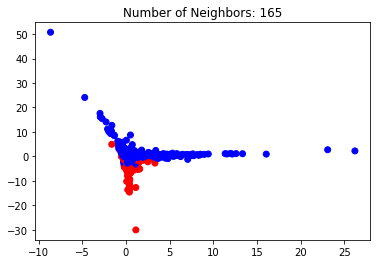

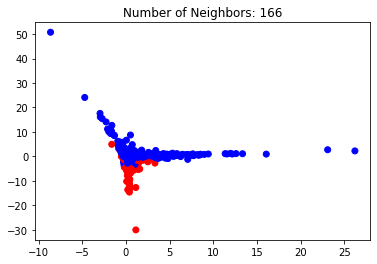

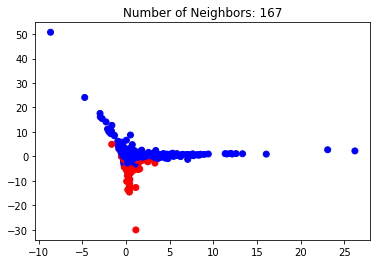

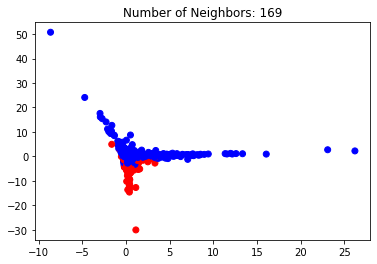

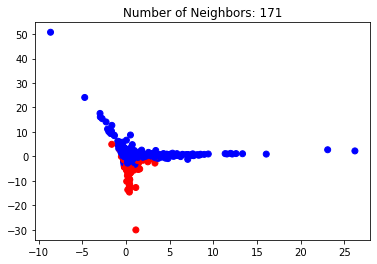

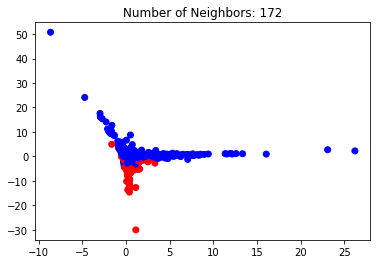

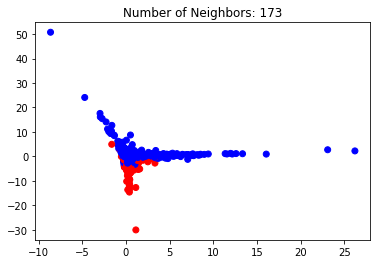

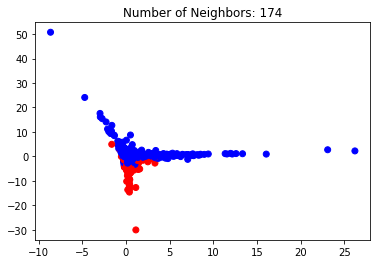

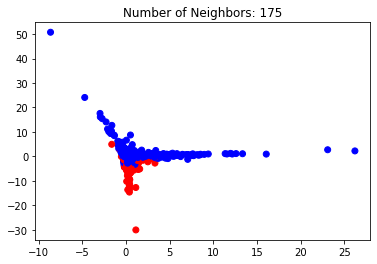

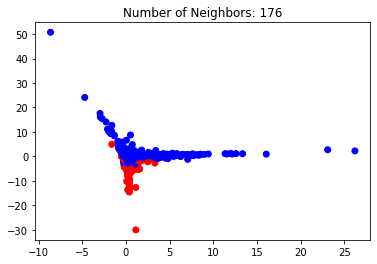

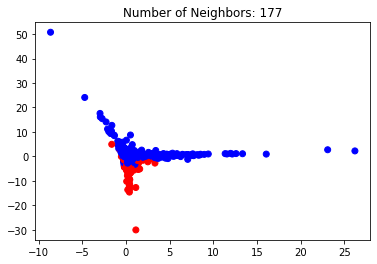

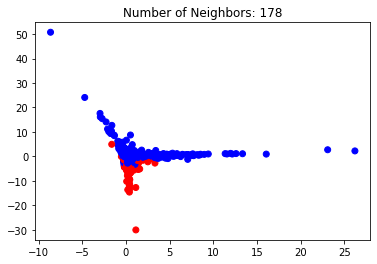

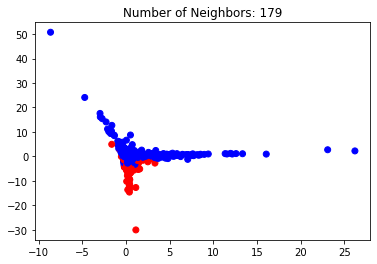

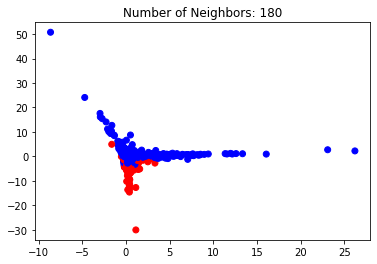

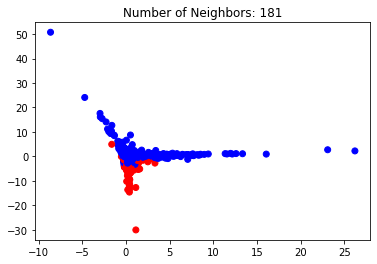

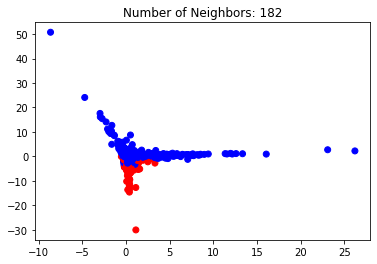

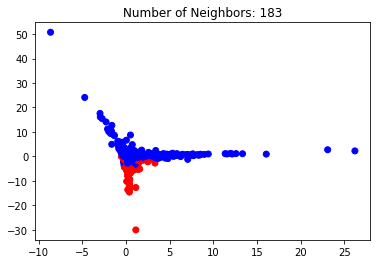

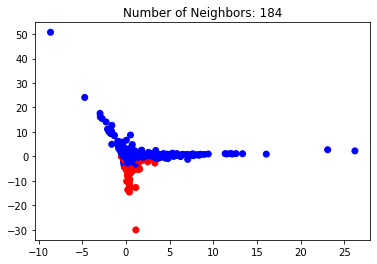

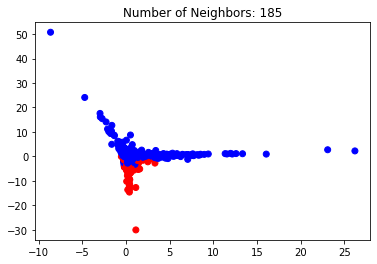

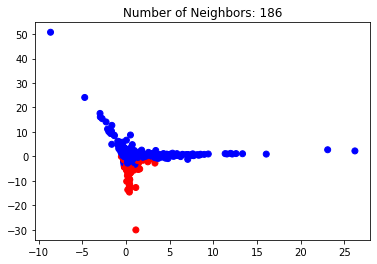

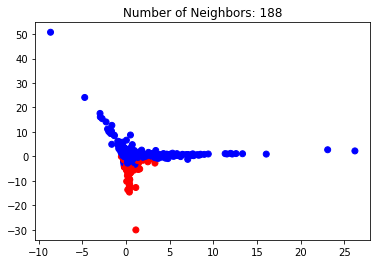

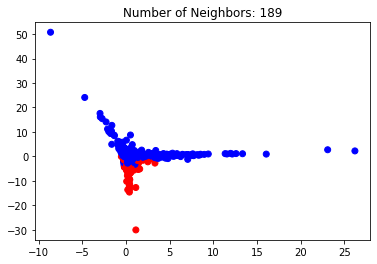

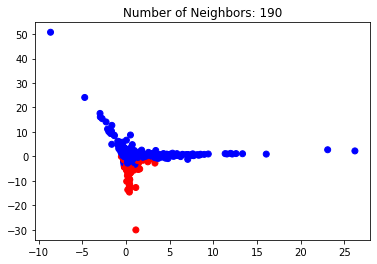

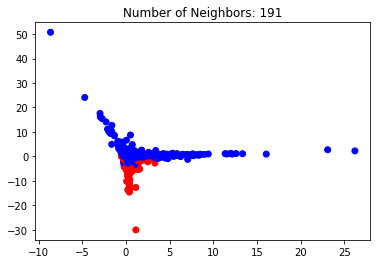

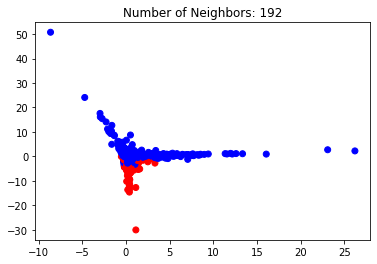

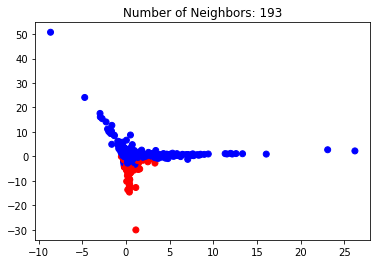

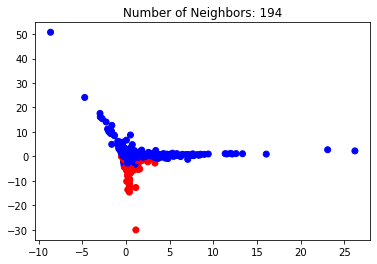

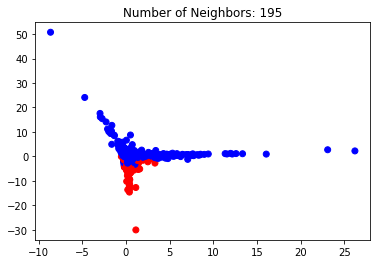

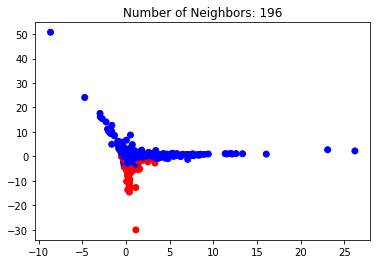

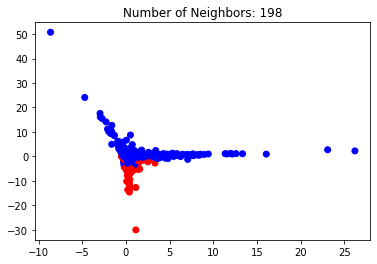

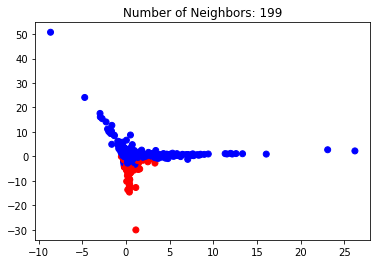

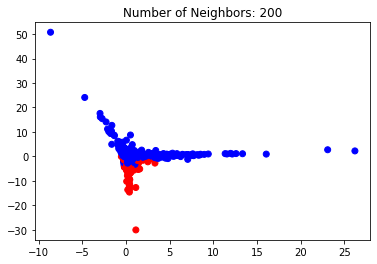

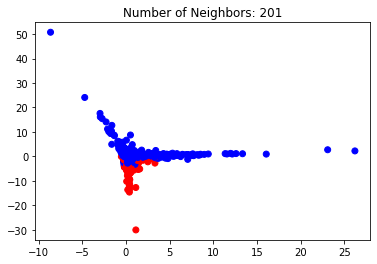

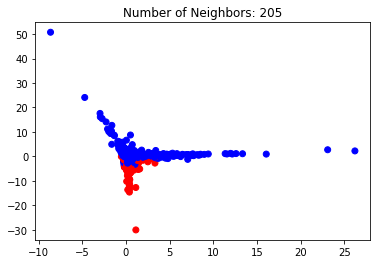

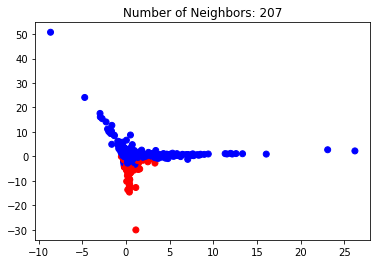

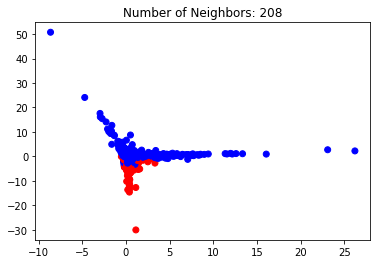

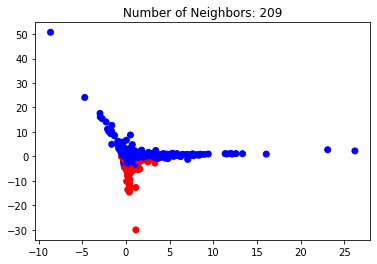

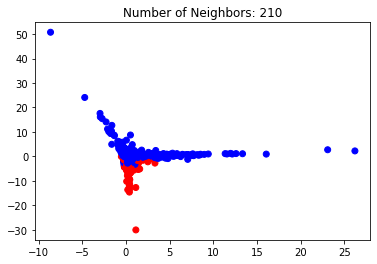

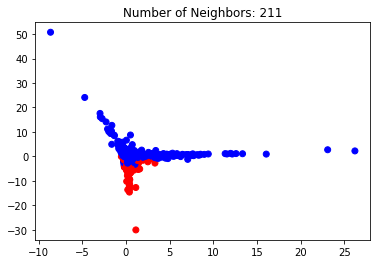

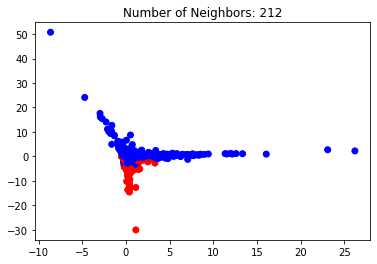

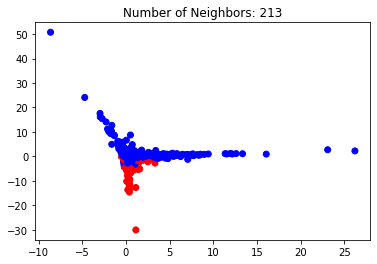

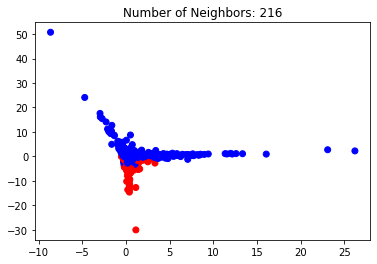

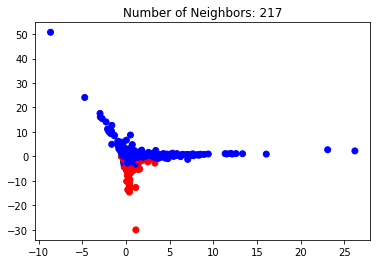

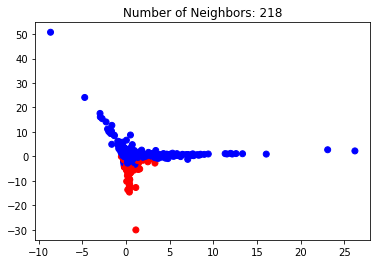

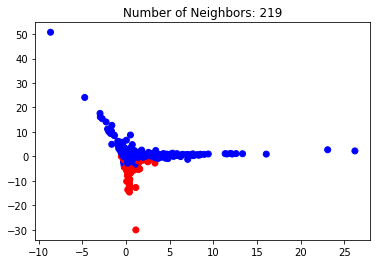

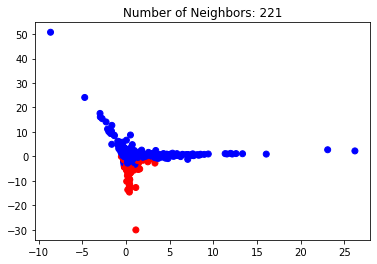

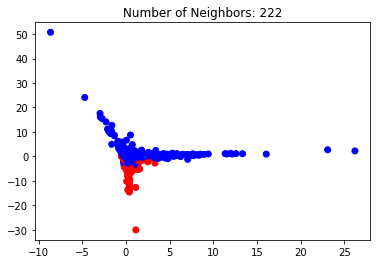

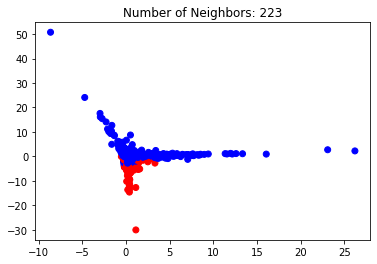

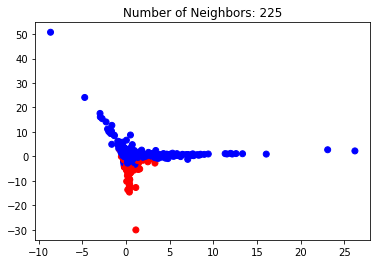

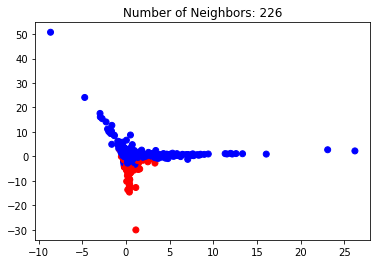

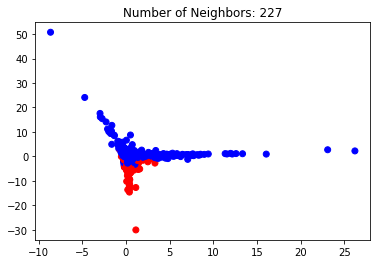

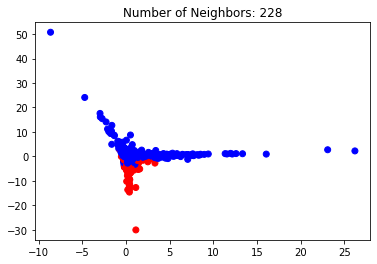

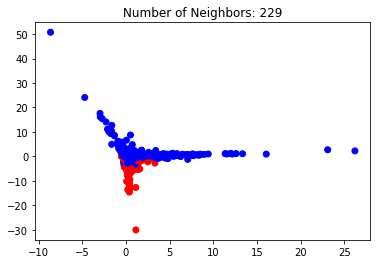

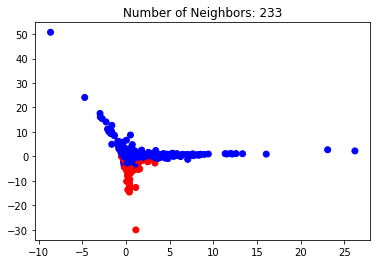

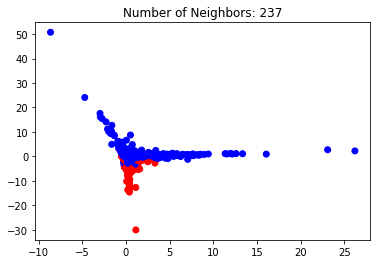

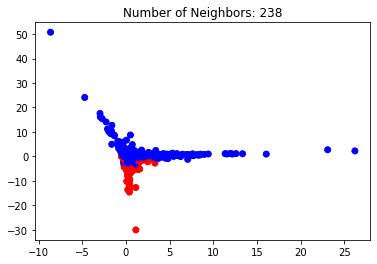

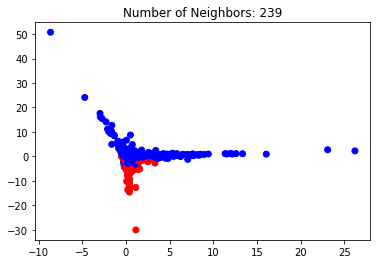

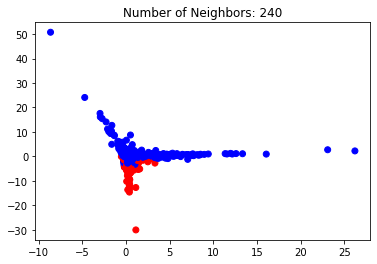

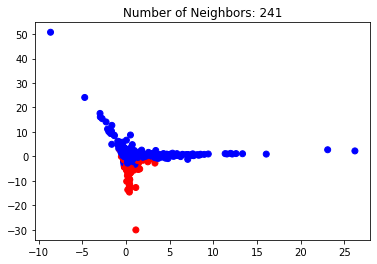

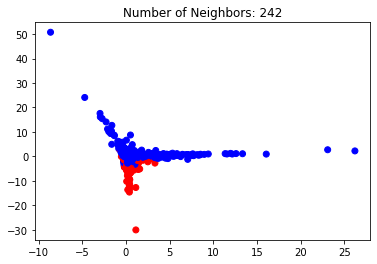

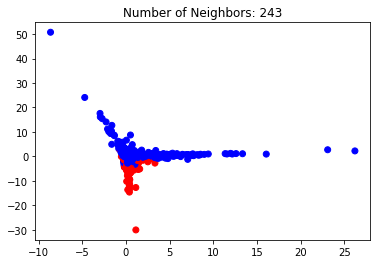

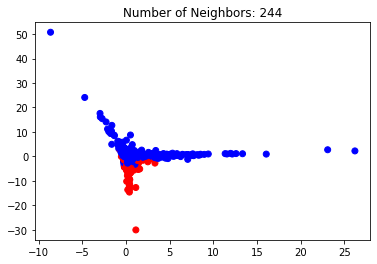

In [74]:
# using Euclidean distances, calculate recall scores of knn models from 1 to n 
lst_recall_scores = []
x = X_test_famd_transformed[0]
y = X_test_famd_transformed[1]

for i in range(1,n+1):
    #calculate/record recall of each KNN model
    knn_cc_trans = KNeighborsClassifier(n_neighbors = i)
    knn_cc_trans.fit(X_train_famd_transformed, y_train)
    y_pred_cc_trans = knn_cc_trans.predict(X_test_famd_transformed)
    y_true_cc_trans = y_test
    recall_cc_trans = recall_score(y_true_cc_trans, y_pred_cc_trans)
    lst_recall_scores.append((i, recall_cc_trans))
    
    # plot KNN model to assess over-fitting/under-fitting (1st 2 FAMD components)
    classes_colors = []
    
    #assign colors to each class
    for pred in y_pred_cc_trans:
        if pred == False:
            classes_colors.append('blue')
        elif pred == True:
            classes_colors.append('red')
    
    plt.scatter(x, y, c = classes_colors)
    plt.title(f'Number of Neighbors: {i}')
    plt.show()
    
# "not fraud": blue
# "fraud": red

Text(0, 0.5, 'Recall Score')

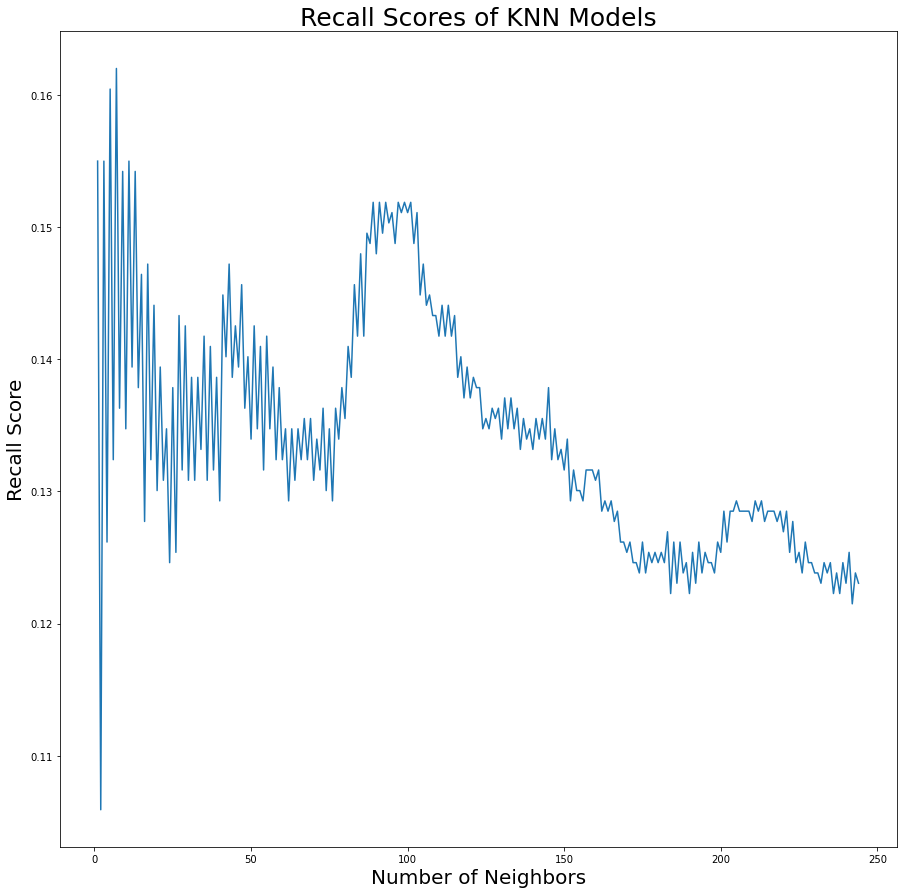

In [75]:
# plot recall for each n_neighbors
num_neighbors = [score[0] for score in lst_recall_scores]
recalls = [score[1] for score in lst_recall_scores]

fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(num_neighbors, recalls)
ax.set_title('Recall Scores of KNN Models', fontsize = 25)
ax.set_xlabel('Number of Neighbors', fontsize = 20)
ax.set_ylabel('Recall Score', fontsize = 20)

In [76]:
max_recall = 0
num_neighbors = 0

for i in range(len(recalls)):
    recall = recalls[i]
    if recall > max_recall:
        max_recall = recall
        num_neighbors = i + 1

In [77]:
print(f'Recall of best KNN model ({num_neighbors} neighbors) on test data is {max_recall * 100:2f}%!')
# 85 neighbors has peak recall of ~16.2% --> not a viable model (toss it) - best model yet though

Recall of best KNN model (7 neighbors) on test data is 16.199377%!


In [88]:
# assess recall of best KNN model on train data
knn_cc_trans = KNeighborsClassifier(n_neighbors = num_neighbors)
knn_cc_trans.fit(X_train_famd_transformed, y_train)
y_pred_train_cc_trans = knn_cc_trans.predict(X_train_famd_transformed)
y_true_cc_trans = y_train

In [89]:
print(f'Recall of best KNN model ({num_neighbors} neighbors) on train data is {(recall_score(y_true_cc_trans, y_pred_train_cc_trans) * 100):2f}%!')

Recall of best KNN model (7 neighbors) on train data is 95.909622%!


In [90]:
# save model
pickle.dump(knn_cc_trans, open('models/knn_cc_trans.pkl', 'wb'))

## Random Forests

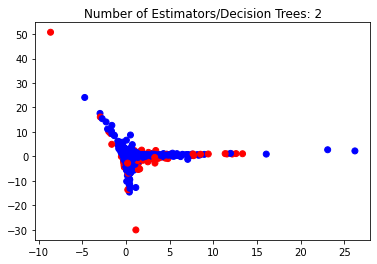

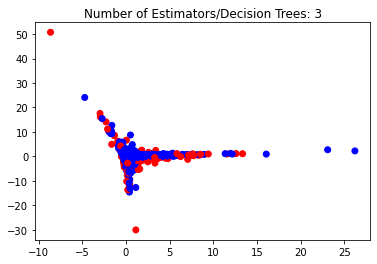

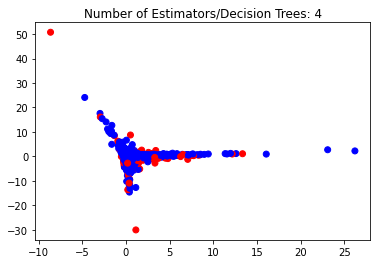

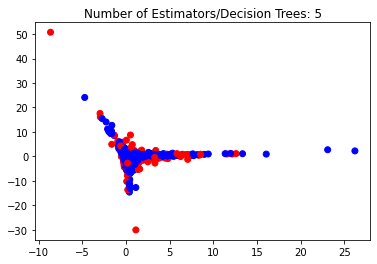

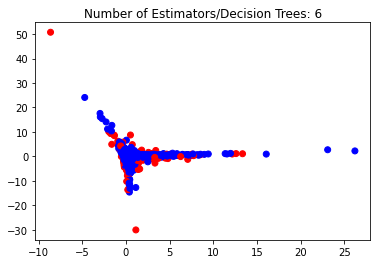

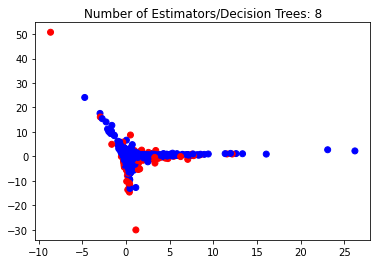

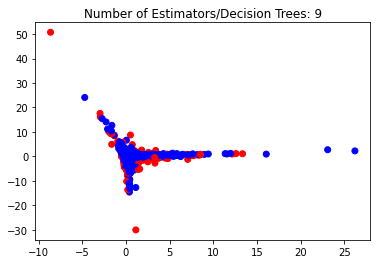

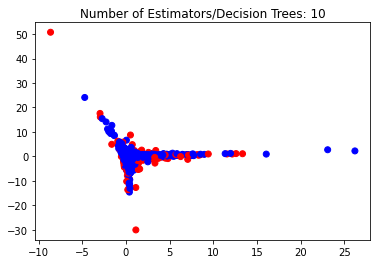

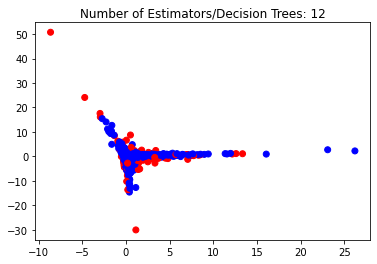

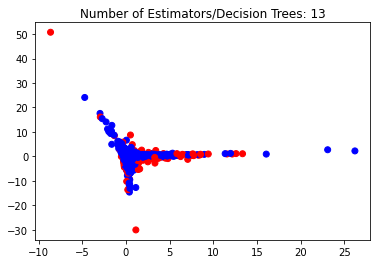

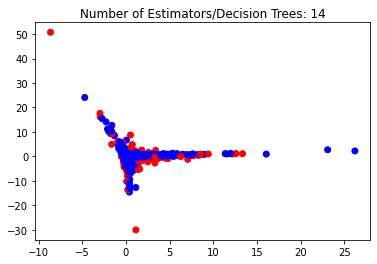

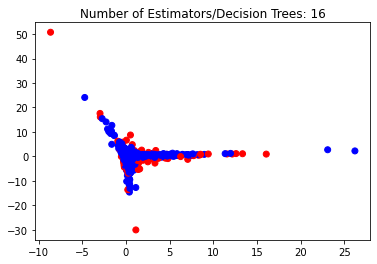

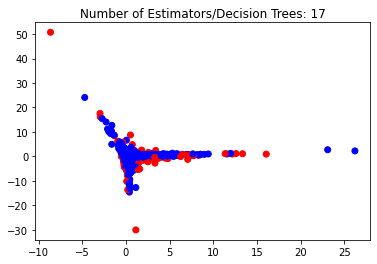

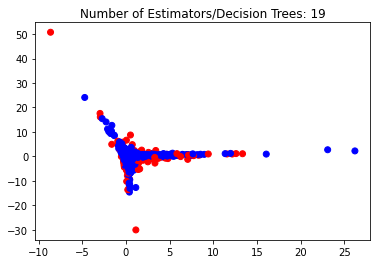

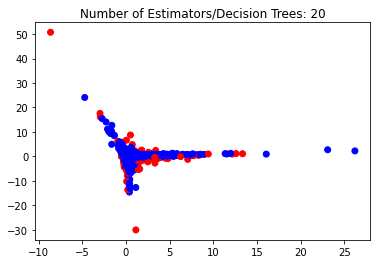

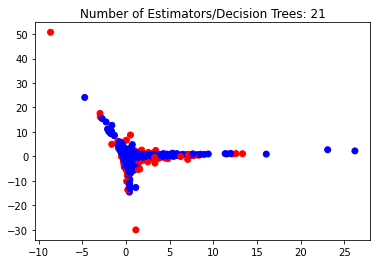

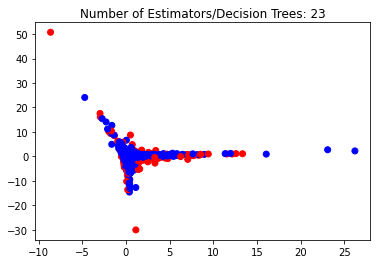

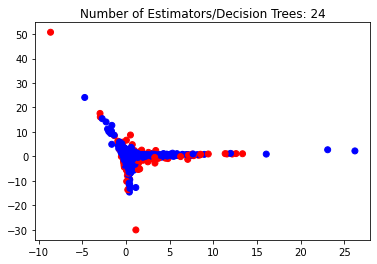

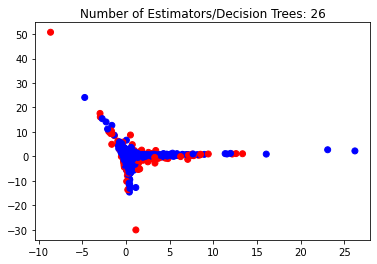

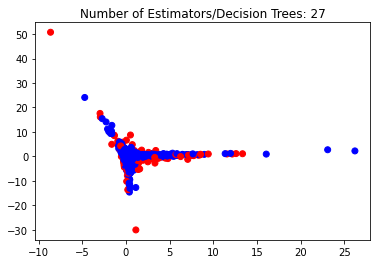

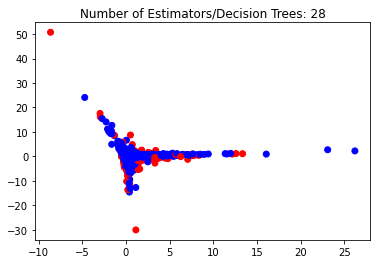

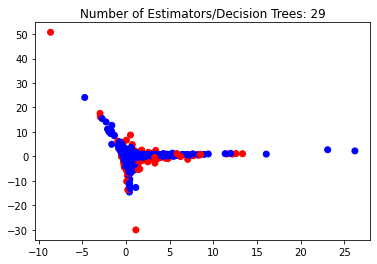

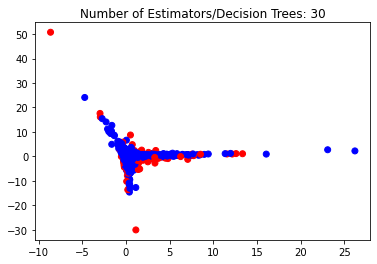

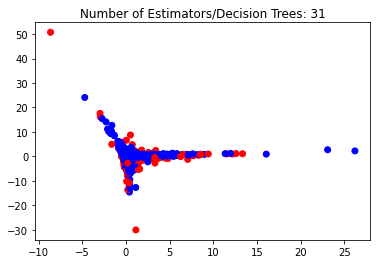

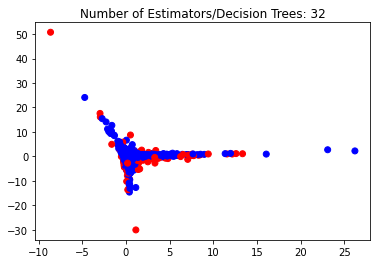

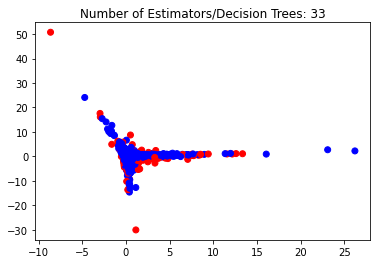

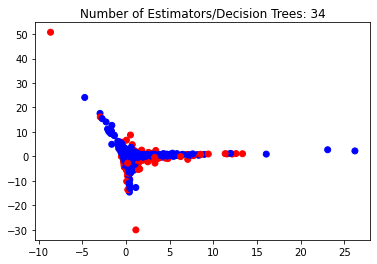

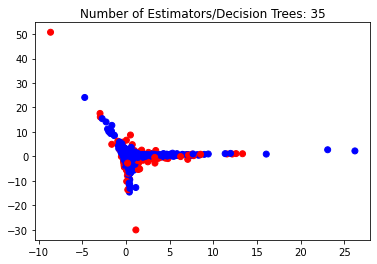

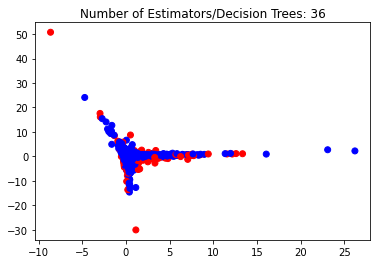

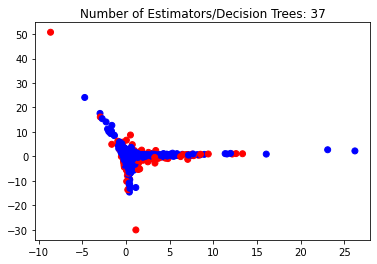

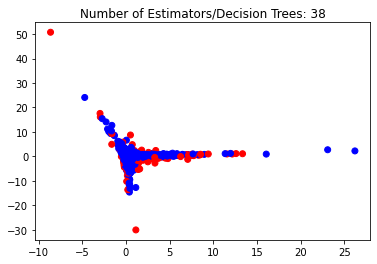

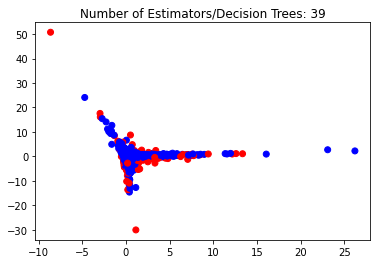

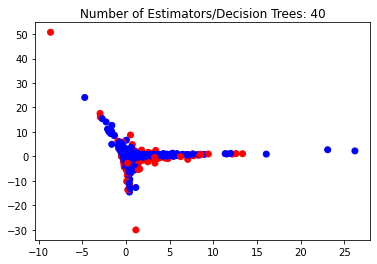

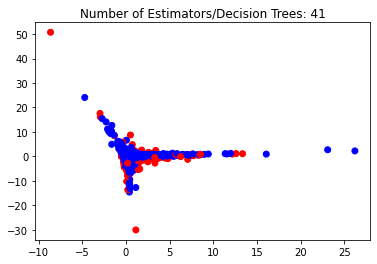

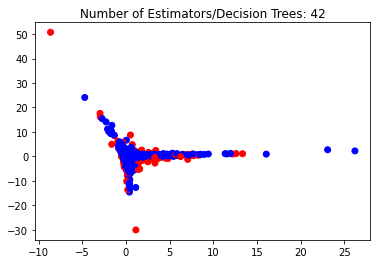

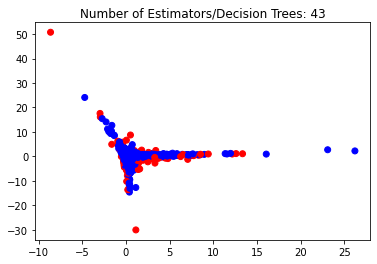

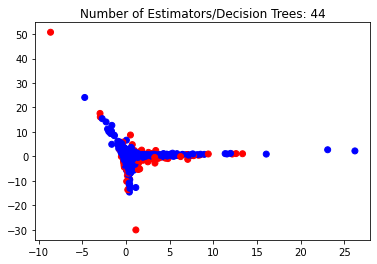

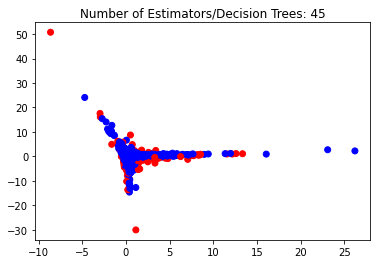

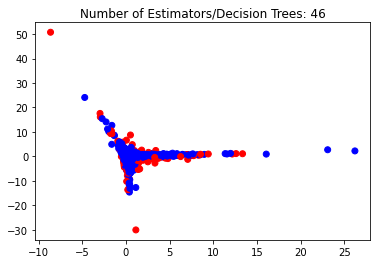

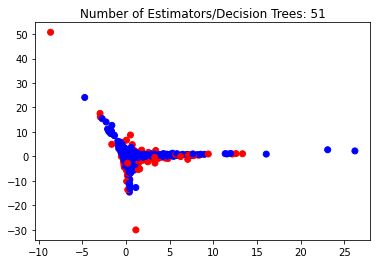

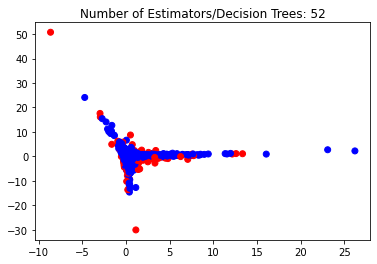

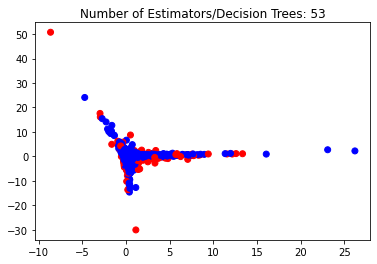

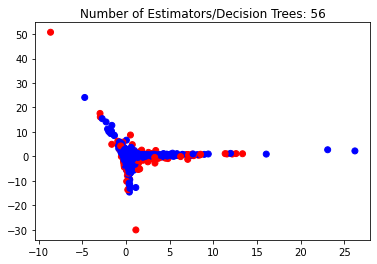

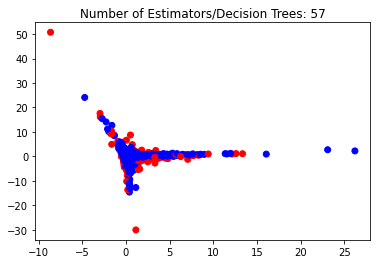

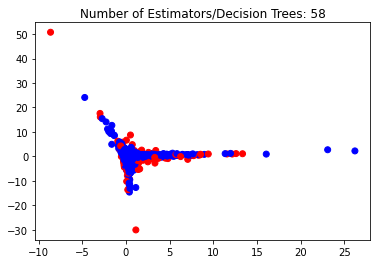

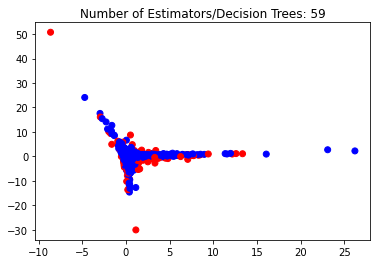

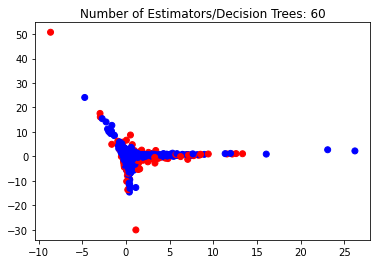

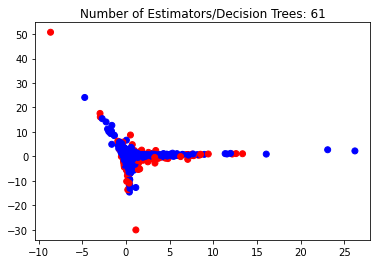

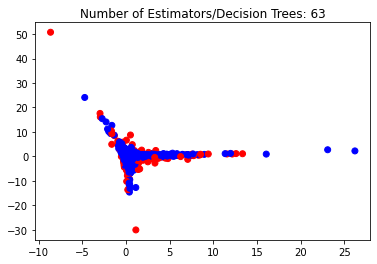

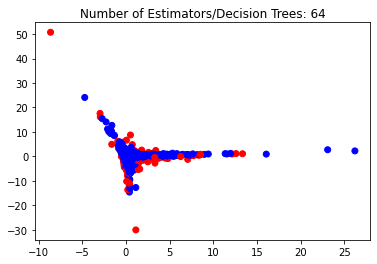

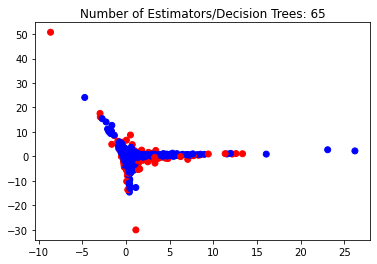

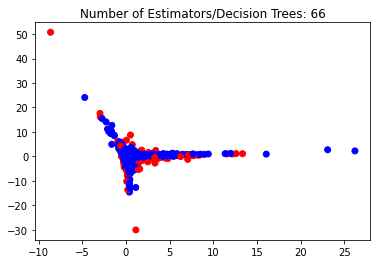

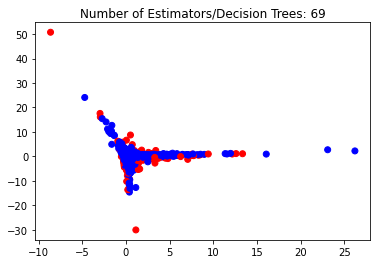

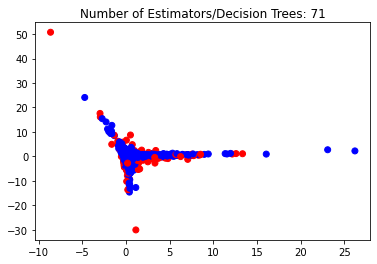

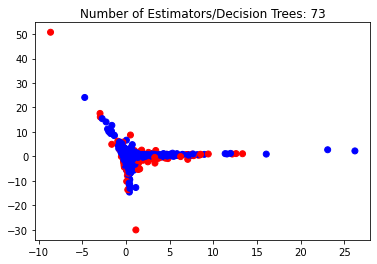

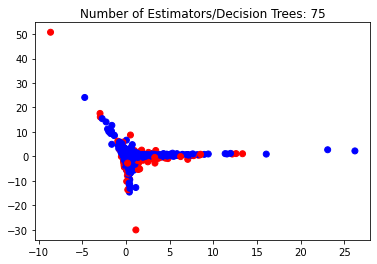

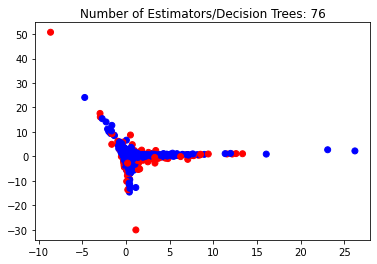

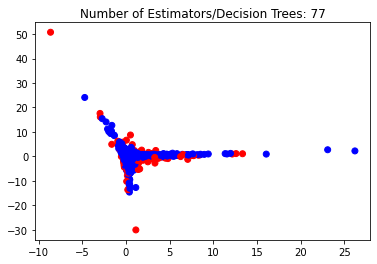

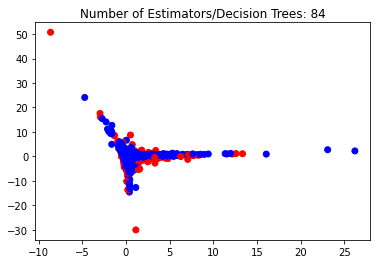

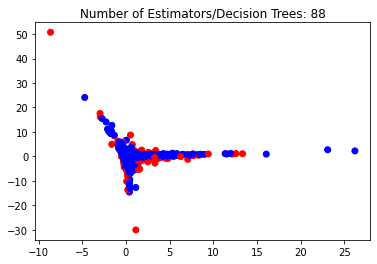

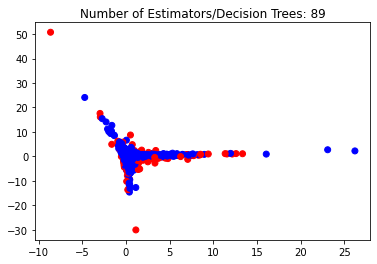

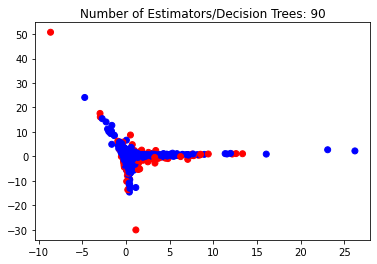

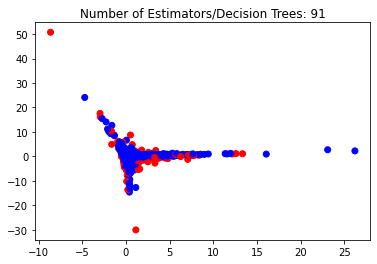

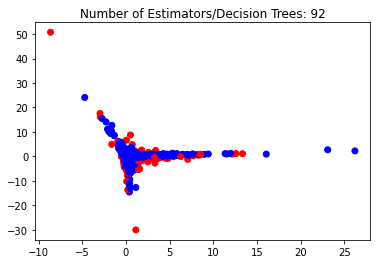

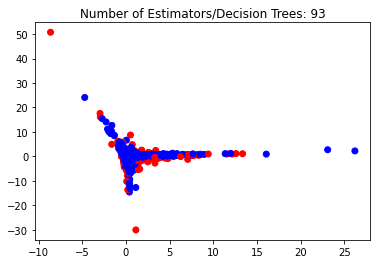

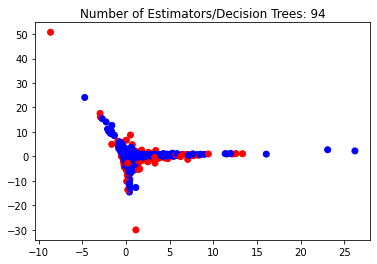

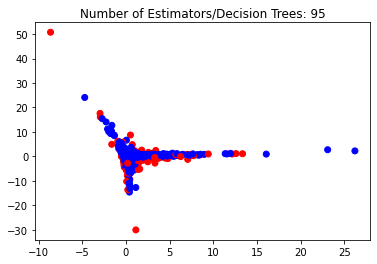

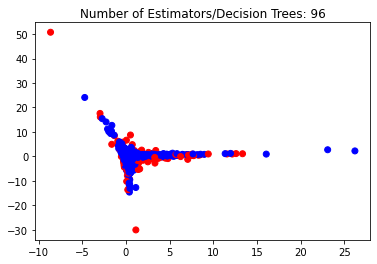

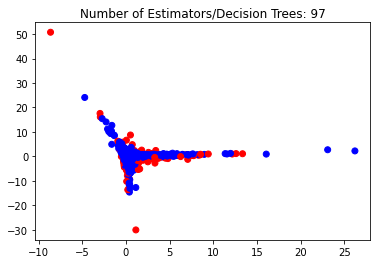

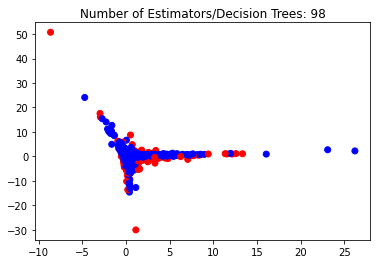

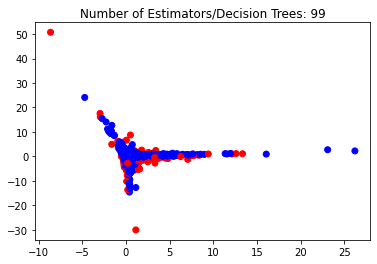

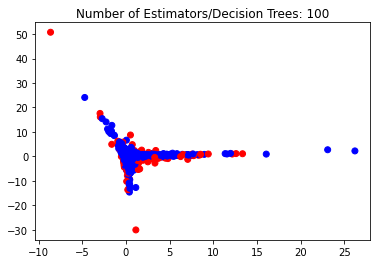

In [81]:
# using random forests, calculate recall scores of RF models from 1 to 100 n_estimators 
lst_recall_scores_rf = []
#x = X_test_famd_transformed[0]
#y = X_test_famd_transformed[1]

for i in range(1,101):
    #calculate/record recall of each RF model
    rf_cc_trans = RandomForestClassifier(n_estimators = i, max_features = None)
    rf_cc_trans.fit(X_train_famd_transformed, y_train)
    y_pred_rf_cc_trans = rf_cc_trans.predict(X_test_famd_transformed)
    y_true_rf_cc_trans = y_test
    recall_rf_cc_trans = recall_score(y_true_rf_cc_trans, y_pred_rf_cc_trans)
    lst_recall_scores_rf.append((i, recall_rf_cc_trans))
    
    # plot RF model to assess over-fitting/under-fitting (1st 2 FAMD components)
    classes_colors = []
    
    #assign colors to each class
    for pred in y_pred_rf_cc_trans:
        if pred == False:
            classes_colors.append('blue')
        elif pred == True:
            classes_colors.append('red')
    
    plt.scatter(x, y, c = classes_colors)
    plt.title(f'Number of Estimators/Decision Trees: {i}')
    plt.show()
    
# "not fraud": blue
# "fraud": red

Text(0, 0.5, 'Recall Score')

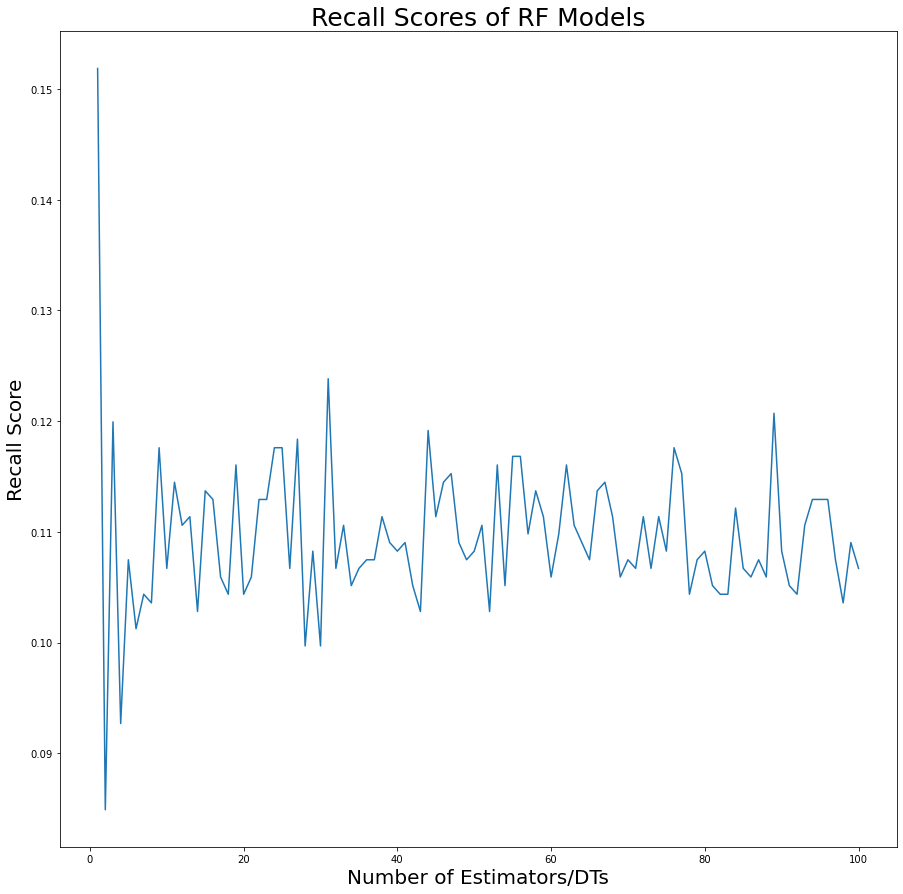

In [82]:
# plot recall for each n_estimators
num_estimators = [score[0] for score in lst_recall_scores_rf]
recalls_rf = [score[1] for score in lst_recall_scores_rf]

fig, ax = plt.subplots(figsize = (15, 15))
plt.plot(num_estimators, recalls_rf)
ax.set_title('Recall Scores of RF Models', fontsize = 25)
ax.set_xlabel('Number of Estimators/DTs', fontsize = 20)
ax.set_ylabel('Recall Score', fontsize = 20)

In [83]:
max_recall_rf = 0
n_estimators = 0

for i in range(len(recalls_rf)):
    recall = recalls_rf[i]
    if recall > max_recall_rf:
        max_recall_rf = recall
        n_estimators = i + 1

In [84]:
print(f'Recall of best RF model ({n_estimators} DTs) on test data is {max_recall_rf * 100:2f}%!')
# 1 estimators/DTs has peak recall of 15.19% --> not a viable model (toss it)

Recall of best RF model (1 DTs) on test data is 15.186916%!


In [91]:
# assess recall of best RF model on train data
rf_cc_trans = RandomForestClassifier(n_estimators = n_estimators, max_features = None)
rf_cc_trans.fit(X_train_famd_transformed, y_train)
y_pred_rf_train_cc_trans = rf_cc_trans.predict(X_train_famd_transformed)
#y_true_cc_trans = y_train

In [92]:
print(f'Recall of best RF model ({n_estimators} DTs) on train data is {(recall_score(y_true_cc_trans, y_pred_rf_train_cc_trans) * 100):2f}%!')

Recall of best RF model (1 DTs) on train data is 95.870666%!


In [93]:
# save model
pickle.dump(rf_cc_trans, open('models/rf_cc_trans.pkl', 'wb'))